In [1]:
import numpy as np
import pandas as pd
import os
from IPython.display import display, HTML
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
import joblib

import seaborn as sns
from importlib import reload
import matplotlib.pyplot as plt
import matplotlib
import warnings
from IPython.display import display, HTML
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import numpy as np
import shap 
import lime# SHAP for explainability
from lime.lime_tabular import LimeTabularExplainer  # LIME for local explanations
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import pandas as pd
import time
import copy
import matplotlib.pyplot as plt
import seaborn as sns
import random
import tensorflow as tf





# Configure Jupyter Notebook
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', 500) 
pd.set_option('display.expand_frame_repr', False)
# pd.set_option('max_colwidth', -1)
display(HTML("<style>div.output_scroll { height: 35em; }</style>"))

reload(plt) #ensures any changes made to matplotlib.pyplot during the session are applied.
%matplotlib inline
%config InlineBackend.figure_format ='retina'

warnings.filterwarnings('ignore')

# configure plotly graph objects
pio.renderers.default = 'iframe'
# pio.renderers.default = 'vscode'

pio.templates["ck_template"] = go.layout.Template(
    layout_colorway = px.colors.sequential.Viridis, 
#     layout_hovermode = 'closest',
#     layout_hoverdistance = -1,
    layout_autosize=False,
    layout_width=800,
    layout_height=600,
    layout_font = dict(family="Calibri Light"),
    layout_title_font = dict(family="Calibri"),
    layout_hoverlabel_font = dict(family="Calibri Light"),
#     plot_bgcolor="white",
)
 
# pio.templates.default = 'seaborn+ck_template+gridon'
pio.templates.default = 'ck_template+gridon'
# pio.templates.default = 'seaborn+gridon'
# pio.templates

c:\Users\tonya\Anaconda3\envs\fl_project_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


label_mapping = {
    "Backdoor": 0,
    "DDoS_HTTP": 1,
    "DDoS_ICMP": 2,
    "DDoS_TCP": 3,
    "DDoS_UDP": 4,
    "Fingerprinting": 5,
    "MITM": 6,
    "Normal": 7,
    "Password": 8,
    "Port_Scanning": 9,
    "Ransomware": 10,
    "SQL_injection": 11,
    "Uploading": 12,
    "Vulnerability_scanner": 13,
    "XSS": 14
}


In [2]:

df0 = pd.read_csv('dataset/client_0_data.csv', low_memory=False)
df1 = pd.read_csv('dataset/client_1_data.csv', low_memory=False)
df2 = pd.read_csv('dataset/client_2_data.csv', low_memory=False)
df3 = pd.read_csv('dataset/client_3_data.csv', low_memory=False)
df4 = pd.read_csv('dataset/client_4_data.csv', low_memory=False)
df5 = pd.read_csv('dataset/client_5_data.csv', low_memory=False)
df6 = pd.read_csv('dataset/client_6_data.csv', low_memory=False)
df7 = pd.read_csv('dataset/client_7_data.csv', low_memory=False)
df8 = pd.read_csv('dataset/client_8_data.csv', low_memory=False)
df9 = pd.read_csv('dataset/client_9_data.csv', low_memory=False)


In [3]:
def drop_single_occurrence_rows(df, column):
    # Find values that occur more than once
    valid_values = df[column].value_counts()[lambda x: x > 1].index
    # Keep only rows with those values
    return df[df[column].isin(valid_values)]

# Example usage:
df0 = drop_single_occurrence_rows(df0, "Attack_type")
df1 = drop_single_occurrence_rows(df1, "Attack_type")
df2 = drop_single_occurrence_rows(df2, "Attack_type")
df3 = drop_single_occurrence_rows(df3, "Attack_type")
df4 = drop_single_occurrence_rows(df4, "Attack_type")
df5 = drop_single_occurrence_rows(df5, "Attack_type")
df6 = drop_single_occurrence_rows(df6, "Attack_type")
df7 = drop_single_occurrence_rows(df7, "Attack_type")
df8 = drop_single_occurrence_rows(df8, "Attack_type")
df9 = drop_single_occurrence_rows(df9, "Attack_type")

In [4]:


from sklearn.model_selection import train_test_split

# Set test size and random state for reproducibility
test_size = 0.2
random_state = 42

# List of all client dataframes
client_data = [df0, df1, df2, df3, df4, df5, df6, df7, df8, df9]  # Assuming df5 to df9 are defined similarly

# Prepare training and testing sets for each client
client_train_data = {}
client_test_data = {}

for i, df in enumerate(client_data):
    print(f"\nProcessing Client {i+1}")
    
    # Separate features and target
    X = df.drop(columns=['Attack_type', 'Attack_label'])  # Features
    y = df['Attack_type']

    # Split each client's data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state,stratify=y)

    # Store the processed data for each client
    client_train_data[i] = (X_train, y_train)
    client_test_data[i] = (X_test, y_test)

    # Print confirmation
    print(f"Completed processing for Client {i+1}")
    print(f"Training set size: {X_train.shape[0]}, Testing set size: {X_test.shape[0]}")



Processing Client 1
Completed processing for Client 1
Training set size: 261541, Testing set size: 65386

Processing Client 2
Completed processing for Client 2
Training set size: 35360, Testing set size: 8841

Processing Client 3
Completed processing for Client 3
Training set size: 188420, Testing set size: 47106

Processing Client 4
Completed processing for Client 4
Training set size: 105336, Testing set size: 26335

Processing Client 5
Completed processing for Client 5
Training set size: 73469, Testing set size: 18368

Processing Client 6
Completed processing for Client 6
Training set size: 62655, Testing set size: 15664

Processing Client 7
Completed processing for Client 7
Training set size: 176903, Testing set size: 44226

Processing Client 8
Completed processing for Client 8
Training set size: 146060, Testing set size: 36515

Processing Client 9
Completed processing for Client 9
Training set size: 97120, Testing set size: 24281

Processing Client 10
Completed processing for Clie

label_mapping

    "Backdoor": 0,
    "DDoS_HTTP": 1,
    "DDoS_ICMP": 2,
    "DDoS_TCP": 3,
    "DDoS_UDP": 4,
    "Fingerprinting": 5,
    "MITM": 6,
    "Normal": 7,
    "Password": 8,
    "Port_Scanning": 9,
    "Ransomware": 10,
    "SQL_injection": 11,
    "Uploading": 12,
    "Vulnerability_scanner": 13,
    "XSS": 14


In [5]:
for i, df in enumerate(client_data):
    print(f"Client {i+1} : {df['Attack_type'].value_counts()}")

Client 1 : Attack_type
7     275323
4      19513
3       8616
1       7046
9       5761
8       4436
11      4413
0        734
13       613
14       230
12        72
5         71
2         58
6         30
10        11
Name: count, dtype: int64
Client 2 : Attack_type
4     16086
2     10697
12     4630
8      4564
3      4216
11     1408
10     1327
14      664
1       413
13       85
5        56
0        46
6         7
9         2
Name: count, dtype: int64
Client 3 : Attack_type
7     215103
8       7798
13      3066
3       2499
2       1655
12      1330
14      1209
11       924
4        526
10       506
0        415
1        207
9        155
5        119
6         14
Name: count, dtype: int64
Client 4 : Attack_type
7     95032
8      8433
4      7488
11     5146
1      4721
14     2891
0      2855
10     2326
2       990
13      739
12      544
9       286
3       121
5        59
6        40
Name: count, dtype: int64
Client 5 : Attack_type
2     22206
3     19677
7     17670
4      

## Modelling and Evaluation

In [6]:
# Initialize an empty DataFrame
model_performance = pd.DataFrame(columns=['Model', 'Accuracy', 'Recall', 'Precision', 'F1-Score', 
                                          'time to train', 'time to predict', 'total time'])

In [7]:
# # Display the shape of each client's training and test sets
# for i in range(4):
#     X_train, y_train = client_train_data[i]
#     X_test, y_test = client_test_data[i]
    
#     print(f"\nClient {i+1} Data Shapes:")
#     print(f"  Training Set - X_train: {X_train.shape}, y_train: {y_train.shape}")
#     print(len(y_train.unique()))
#     print(f"  Test Set - X_test: {X_test.shape}, y_test: {y_test.shape}")
#     print(len(y_test.unique()))



## Neural Network MLP

In [8]:

# Set Random Seed
seed = 42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

# Configuration
num_rounds = 10 # Number of federated learning rounds
# epoch_schedule = [50, 50, 50, 50, 50, 50, 80, 80, 80, 80]  # Epochs per round
# epoch_schedule =[ 5, 5, 5, 5, 5, 2, 2, 2, 2, 1]  # Epochs per round
epoch_schedule =[ 2, 2, 2, 2, 2, 2, 2, 2, 2, 1]  # Epochs per round
hidden_layer_sizes = (20, 20)  # Hidden layer configuration
batch_size = 2000  # Batch size for MLP
learning_rate = 0.001  # Learning rate for MLP

# Global list of all possible classes
all_classes = np.unique(np.concatenate([client_train_data[i][1] for i in range(len(client_train_data))]))



# Initialize global model parameters
global_model = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, 
                             activation='relu', 
                             solver='adam', 
                             batch_size=batch_size, 
                             learning_rate_init=learning_rate, 
                             max_iter=1,  # One iteration per call to `fit`
                             warm_start=True, 
                             verbose=0)

# Perform a dummy fit to initialize the model structure with all classes
X_dummy = np.random.rand(15, client_train_data[0][0].shape[1])  # Random features
y_dummy = np.tile(all_classes, 1)[:15]  # Ensure all classes are present
global_model.fit(X_dummy, y_dummy)  # Dummy fit

# Assign global weights and biases from the initialized model
global_weights = copy.deepcopy(global_model.coefs_)
global_biases = copy.deepcopy(global_model.intercepts_)



# Function to aggregate weights using FedAvg
def fed_avg(weights_list, biases_list):
    avg_weights = [np.mean([w[layer] for w in weights_list], axis=0) for layer in range(len(global_weights))]
    avg_biases = [np.mean([b[layer] for b in biases_list], axis=0) for layer in range(len(global_biases))]
    return avg_weights, avg_biases


# Store performance metrics
round_performance = []
os.makedirs("saved_models", exist_ok=True)
# Federated Learning Rounds


# Initialize tracking variables
client_total_train_time = {f"Client {i}": 0.0 for i in range(len(client_train_data))}
round_times = []

# Federated Learning Rounds
models = {}
for round_num in range(1, num_rounds + 1):
    print(f"\n--- FL Round {round_num} ---")
    
    num_epochs = epoch_schedule[round_num - 1]
    print(f"Number of epochs for this round: {num_epochs}")
    
    round_start_time = time.time()
    client_weights = []
    client_biases = []
    
    # Local Training on Clients
    for i in range(len(client_train_data)):
        print(f"\nTraining model for Client {i}")
        X_train, y_train = client_train_data[i]
        X_test, y_test = client_test_data[i]

        # Add dummy samples if any classes are missing
        missing_classes = set(all_classes) - set(y_train)
        if missing_classes:
            print(f"  Adding dummy samples for missing classes: {missing_classes}")
            dummy_X = np.zeros((len(missing_classes), X_train.shape[1]))
            dummy_y = np.array(list(missing_classes))
            X_train = np.vstack([X_train, dummy_X])
            y_train = np.hstack([y_train, dummy_y])

        # Initialize local model with global weights
        local_model = copy.deepcopy(global_model)
        local_model.coefs_ = copy.deepcopy(global_weights)
        local_model.intercepts_ = copy.deepcopy(global_biases)

        client_start_time = time.time()

        # Train local model for specified epochs
        for epoch in range(num_epochs):
            local_model.fit(X_train, y_train)

        client_train_time = time.time() - client_start_time
        client_total_train_time[f"Client {i}"] += client_train_time

        # Store weights and biases
        client_weights.append(local_model.coefs_)
        client_biases.append(local_model.intercepts_)

        # Evaluate local model
        y_pred = local_model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average="weighted")
        recall = recall_score(y_test, y_pred, average="weighted")
        f1 = f1_score(y_test, y_pred, average="weighted")

        print(f"Client {i} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}, Train Time: {client_train_time:.4f} seconds")

        if round_num == num_rounds:
            models[f'Client {i}'] = local_model

        # Save performance metrics
        round_performance.append({
            "Round": round_num,
            "Client": f"Client {i}",
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1-Score": f1,
            "Train Time": client_train_time,
        })

    # End of round
    round_train_time = time.time() - round_start_time
    round_times.append(round_train_time)
    print(f"Total training time for Round {round_num}: {round_train_time:.4f} seconds")

    # FedAvg aggregation
    global_weights, global_biases = fed_avg(client_weights, client_biases)
    global_model.coefs_ = copy.deepcopy(global_weights)
    global_model.intercepts_ = copy.deepcopy(global_biases)

    if round_num == num_rounds:
        models['global'] = local_model



--- FL Round 1 ---
Number of epochs for this round: 2

Training model for Client 0
Client 0 - Accuracy: 0.9731, Precision: 0.9690, Recall: 0.9731, F1-Score: 0.9695, Train Time: 1.8601 seconds

Training model for Client 1
  Adding dummy samples for missing classes: {np.int64(7)}
Client 1 - Accuracy: 0.3946, Precision: 0.4874, Recall: 0.3946, F1-Score: 0.4178, Train Time: 0.2074 seconds

Training model for Client 2
Client 2 - Accuracy: 0.9743, Precision: 0.9593, Recall: 0.9743, F1-Score: 0.9653, Train Time: 1.2427 seconds

Training model for Client 3
Client 3 - Accuracy: 0.8197, Precision: 0.7467, Recall: 0.8197, F1-Score: 0.7672, Train Time: 0.6820 seconds

Training model for Client 4
Client 4 - Accuracy: 0.7048, Precision: 0.5988, Recall: 0.7048, F1-Score: 0.6288, Train Time: 0.4589 seconds

Training model for Client 5
  Adding dummy samples for missing classes: {np.int64(8)}
Client 5 - Accuracy: 0.7573, Precision: 0.6373, Recall: 0.7573, F1-Score: 0.6806, Train Time: 0.3730 seconds



In [9]:
# Print average training time per client
print("\n=== Average Training Time Per Client ===")
for client, total_time in client_total_train_time.items():
    avg_time = total_time / num_rounds
    print(f"{client}: {avg_time:.4f} seconds")

# Print average training time per round
average_round_time = sum(round_times) / num_rounds
print(f"\n=== Average Training Time Per Round ===")
print(f"{average_round_time:.4f} seconds")


=== Average Training Time Per Client ===
Client 0: 1.6752 seconds
Client 1: 0.1929 seconds
Client 2: 1.1667 seconds
Client 3: 0.6328 seconds
Client 4: 0.4236 seconds
Client 5: 0.3558 seconds
Client 6: 0.7892 seconds
Client 7: 0.8732 seconds
Client 8: 0.5602 seconds
Client 9: 2.4324 seconds

=== Average Training Time Per Round ===
9.6969 seconds


In [27]:
round_performance
round_performance_dff = pd.DataFrame(round_performance[90:102])
round_performance_dff

Round    Client  Accuracy  Precision    Recall  F1-Score  Train Time
0     10  Client 0  0.988178   0.987726  0.988178  0.987633    0.845000
1     10  Client 1  0.896731   0.883865  0.896731  0.883696    0.105334
2     10  Client 2  0.987433   0.984816  0.987433  0.984236    0.618865
3     10  Client 3  0.938599   0.944878  0.938599  0.930137    0.326581
4     10  Client 4  0.909517   0.909327  0.909517  0.906325    0.217614
5     10  Client 5  0.937181   0.938427  0.937181  0.916503    0.181999
6     10  Client 6  0.969385   0.968883  0.969385  0.967907    0.418942
7     10  Client 7  0.972833   0.967737  0.972833  0.965209    0.437999
8     10  Client 8  0.963058   0.964096  0.963058  0.956885    0.281999
9     10  Client 9  0.988521   0.988855  0.988521  0.985128    1.227488

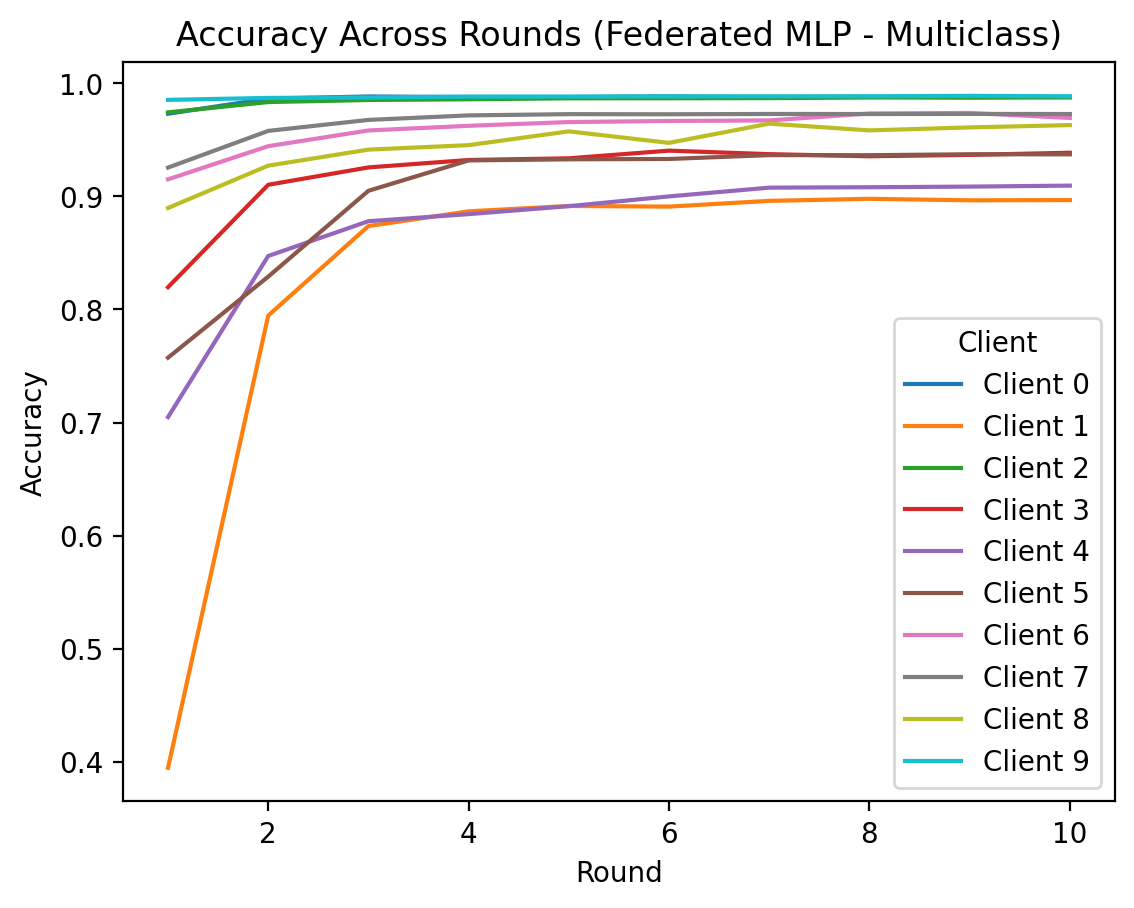

In [23]:

# === Performance Visualization ===
round_performance_df = pd.DataFrame(round_performance)
sns.lineplot(data=round_performance_df, x="Round", y="Accuracy", hue="Client")
plt.title("Accuracy Across Rounds (Federated MLP - Multiclass)")
plt.show()

In [24]:
models

{'Client 0': MLPClassifier(batch_size=2000, hidden_layer_sizes=(20, 20), max_iter=1,
               verbose=0, warm_start=True),
 'Client 1': MLPClassifier(batch_size=2000, hidden_layer_sizes=(20, 20), max_iter=1,
               verbose=0, warm_start=True),
 'Client 2': MLPClassifier(batch_size=2000, hidden_layer_sizes=(20, 20), max_iter=1,
               verbose=0, warm_start=True),
 'Client 3': MLPClassifier(batch_size=2000, hidden_layer_sizes=(20, 20), max_iter=1,
               verbose=0, warm_start=True),
 'Client 4': MLPClassifier(batch_size=2000, hidden_layer_sizes=(20, 20), max_iter=1,
               verbose=0, warm_start=True),
 'Client 5': MLPClassifier(batch_size=2000, hidden_layer_sizes=(20, 20), max_iter=1,
               verbose=0, warm_start=True),
 'Client 6': MLPClassifier(batch_size=2000, hidden_layer_sizes=(20, 20), max_iter=1,
               verbose=0, warm_start=True),
 'Client 7': MLPClassifier(batch_size=2000, hidden_layer_sizes=(20, 20), max_iter=1,
            

In [31]:
# ========== Train & Evaluate for Each Client ==========

X_ext = pd.concat([client_test_data[j][0] for j in range(10)], ignore_index=True)
y_ext = pd.concat([client_test_data[j][1] for j in range(10)], ignore_index=True)

performance_local = []
performance_global = []
for client_idx in range(10):
    # Get this client's test data
    X_test = client_test_data[client_idx][0]
    y_test = client_test_data[client_idx][1]

    
    print(f"\n================ Client {client_idx} ================")
    
    # Initialize model for this client
    model = models[f'Client {client_idx}']

    # -------- Local Test Evaluation --------
    y_pred_local = model.predict(X_test)
    acc_local = accuracy_score(y_test, y_pred_local)
    prec_local = precision_score(y_test, y_pred_local, average="weighted", zero_division=0)
    rec_local = recall_score(y_test, y_pred_local, average="weighted", zero_division=0)
    f1_local = f1_score(y_test, y_pred_local, average="weighted", zero_division=0)

    print("\n--- Local Test Set ---")
    print(f"Accuracy: {acc_local:.4f}, Precision: {prec_local:.4f}, Recall: {rec_local:.4f}, F1: {f1_local:.4f}")
    performance_local.append({
        "Client": f"Client {client_idx}",
        "Accuracy": acc_local,
        "Precision": prec_local,
        "Recall": rec_local,
        "F1-Score": f1_local,
        "Training Time": client_total_train_time[f'Client {client_idx}']
    })
    # -------- Global/External Test Evaluation --------
    y_pred_global = model.predict(X_ext)
    acc_global = accuracy_score(y_ext, y_pred_global)
    prec_global = precision_score(y_ext, y_pred_global, average="weighted", zero_division=0)
    rec_global = recall_score(y_ext, y_pred_global, average="weighted", zero_division=0)
    f1_global = f1_score(y_ext, y_pred_global, average="weighted", zero_division=0)
    performance_global.append({
            "Client": f"Client {client_idx}",
            "Accuracy": acc_global,
            "Precision": prec_global,
            "Recall": rec_global,
            "F1-Score": f1_global,
            "Training Time": client_total_train_time[f'Client {client_idx}']
        })
    
    print("\n--- Global Test Set (other clients) ---")
    print(f"Accuracy: {acc_global:.4f}, Precision: {prec_global:.4f}, Recall: {rec_global:.4f}, F1: {f1_global:.4f}")
    print(f"Avg Training time: {client_total_train_time[f'Client {client_idx}']:.2f} seconds")


================ Client 0 ================

--- Local Test Set ---
Accuracy: 0.9882, Precision: 0.9877, Recall: 0.9882, F1: 0.9876

--- Global Test Set (other clients) ---
Accuracy: 0.9454, Precision: 0.9543, Recall: 0.9454, F1: 0.9382
Avg Training time: 16.75 seconds

================ Client 1 ================

--- Local Test Set ---
Accuracy: 0.8967, Precision: 0.8839, Recall: 0.8967, F1: 0.8837

--- Global Test Set (other clients) ---
Accuracy: 0.9301, Precision: 0.9514, Recall: 0.9301, F1: 0.9223
Avg Training time: 1.93 seconds

================ Client 2 ================

--- Local Test Set ---
Accuracy: 0.9874, Precision: 0.9848, Recall: 0.9874, F1: 0.9842

--- Global Test Set (other clients) ---
Accuracy: 0.9326, Precision: 0.9538, Recall: 0.9326, F1: 0.9240
Avg Training time: 11.67 seconds

================ Client 3 ================

--- Local Test Set ---
Accuracy: 0.9386, Precision: 0.9449, Recall: 0.9386, F1: 0.9301

--- Global Test Set (other clients) ---
Accuracy: 0.9450, 

In [32]:
performance_local_df = pd.DataFrame(performance_local)
performance_global_df = pd.DataFrame(performance_global)


In [33]:

# Example: suffixes for clarity
comparison = performance_local_df.merge(performance_global_df, on="Client", suffixes=("_Local", "_Global"))
print(comparison)


     Client  Accuracy_Local  Precision_Local  Recall_Local  F1-Score_Local  Training Time_Local  Accuracy_Global  Precision_Global  Recall_Global  F1-Score_Global  Training Time_Global
0  Client 0        0.988178         0.987726      0.988178        0.987633            16.751969         0.945410          0.954290       0.945410         0.938216             16.751969
1  Client 1        0.896731         0.883865      0.896731        0.883696             1.928856         0.930091          0.951391       0.930091         0.922307              1.928856
2  Client 2        0.987433         0.984816      0.987433        0.984236            11.667206         0.932618          0.953788       0.932618         0.924039             11.667206
3  Client 3        0.938599         0.944878      0.938599        0.930137             6.327911         0.944978          0.961032       0.944978         0.940491              6.327911
4  Client 4        0.909517         0.909327      0.909517        0.906325 

In [35]:
for col in ["Accuracy", "Precision", "Recall", "F1-Score", "Training Time"]:
    comparison[f"{col}_Diff"] = comparison[f"{col}_Local"] - comparison[f"{col}_Global"]
    print(f"Difference in {col}: {comparison[f'{col}_Diff'].mean():.4f}")


Difference in Accuracy: 0.0170
Difference in Precision: 0.0025
Difference in Recall: 0.0170
Difference in F1-Score: 0.0190
Difference in Training Time: 0.0000


In [37]:
summary1 = performance_local_df.mean(numeric_only=True)
summary2 = performance_global_df.mean(numeric_only=True)

print("Model 1 averages:\n", summary1)
print("Model 2 averages:\n", summary2)


Model 1 averages:
 Accuracy         0.955143
Precision        0.953861
Recall           0.955143
F1-Score         0.948366
Training Time    9.102068
dtype: float64
Model 2 averages:
 Accuracy         0.938122
Precision        0.951348
Recall           0.938122
F1-Score         0.929395
Training Time    9.102068
dtype: float64



Confusion Matrix for Global Model:
[[   854      0      0      0      0      0      0      0      0     33
       1      0      0      0      0]
 [     0   3071      0      0      0      0      0      0      0      0
       0      0      0     63    309]
 [     1      0   7117      0      0      4      0      0      0      0
       0      0      0      0      0]
 [     0      0      0   7025      0      0      0      0      0      0
       0      0      0      0      0]
 [     0      0      0      0   9810      0      0      0      0      0
       0      0      0      0      0]
 [    12      0     18      0      0     32      0      0      0     14
       0      0      0      0      0]
 [     0      0      0      0      0      3     20      0      0      0
       0      0      0      0      0]
 [     0      0      0      0      3      0      0 120624      0      0
       0      0      0      0      0]
 [     0      0      0      0      0      0      0      0   2275      0
       0   3

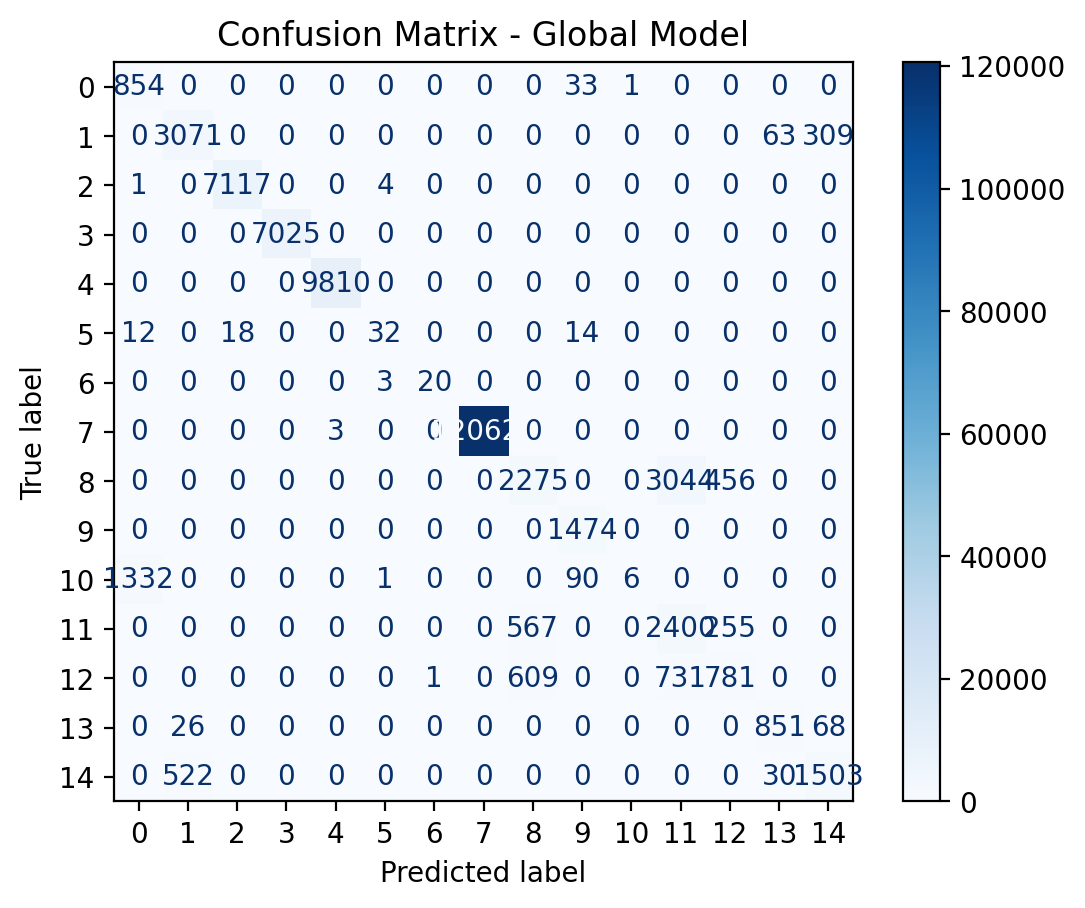

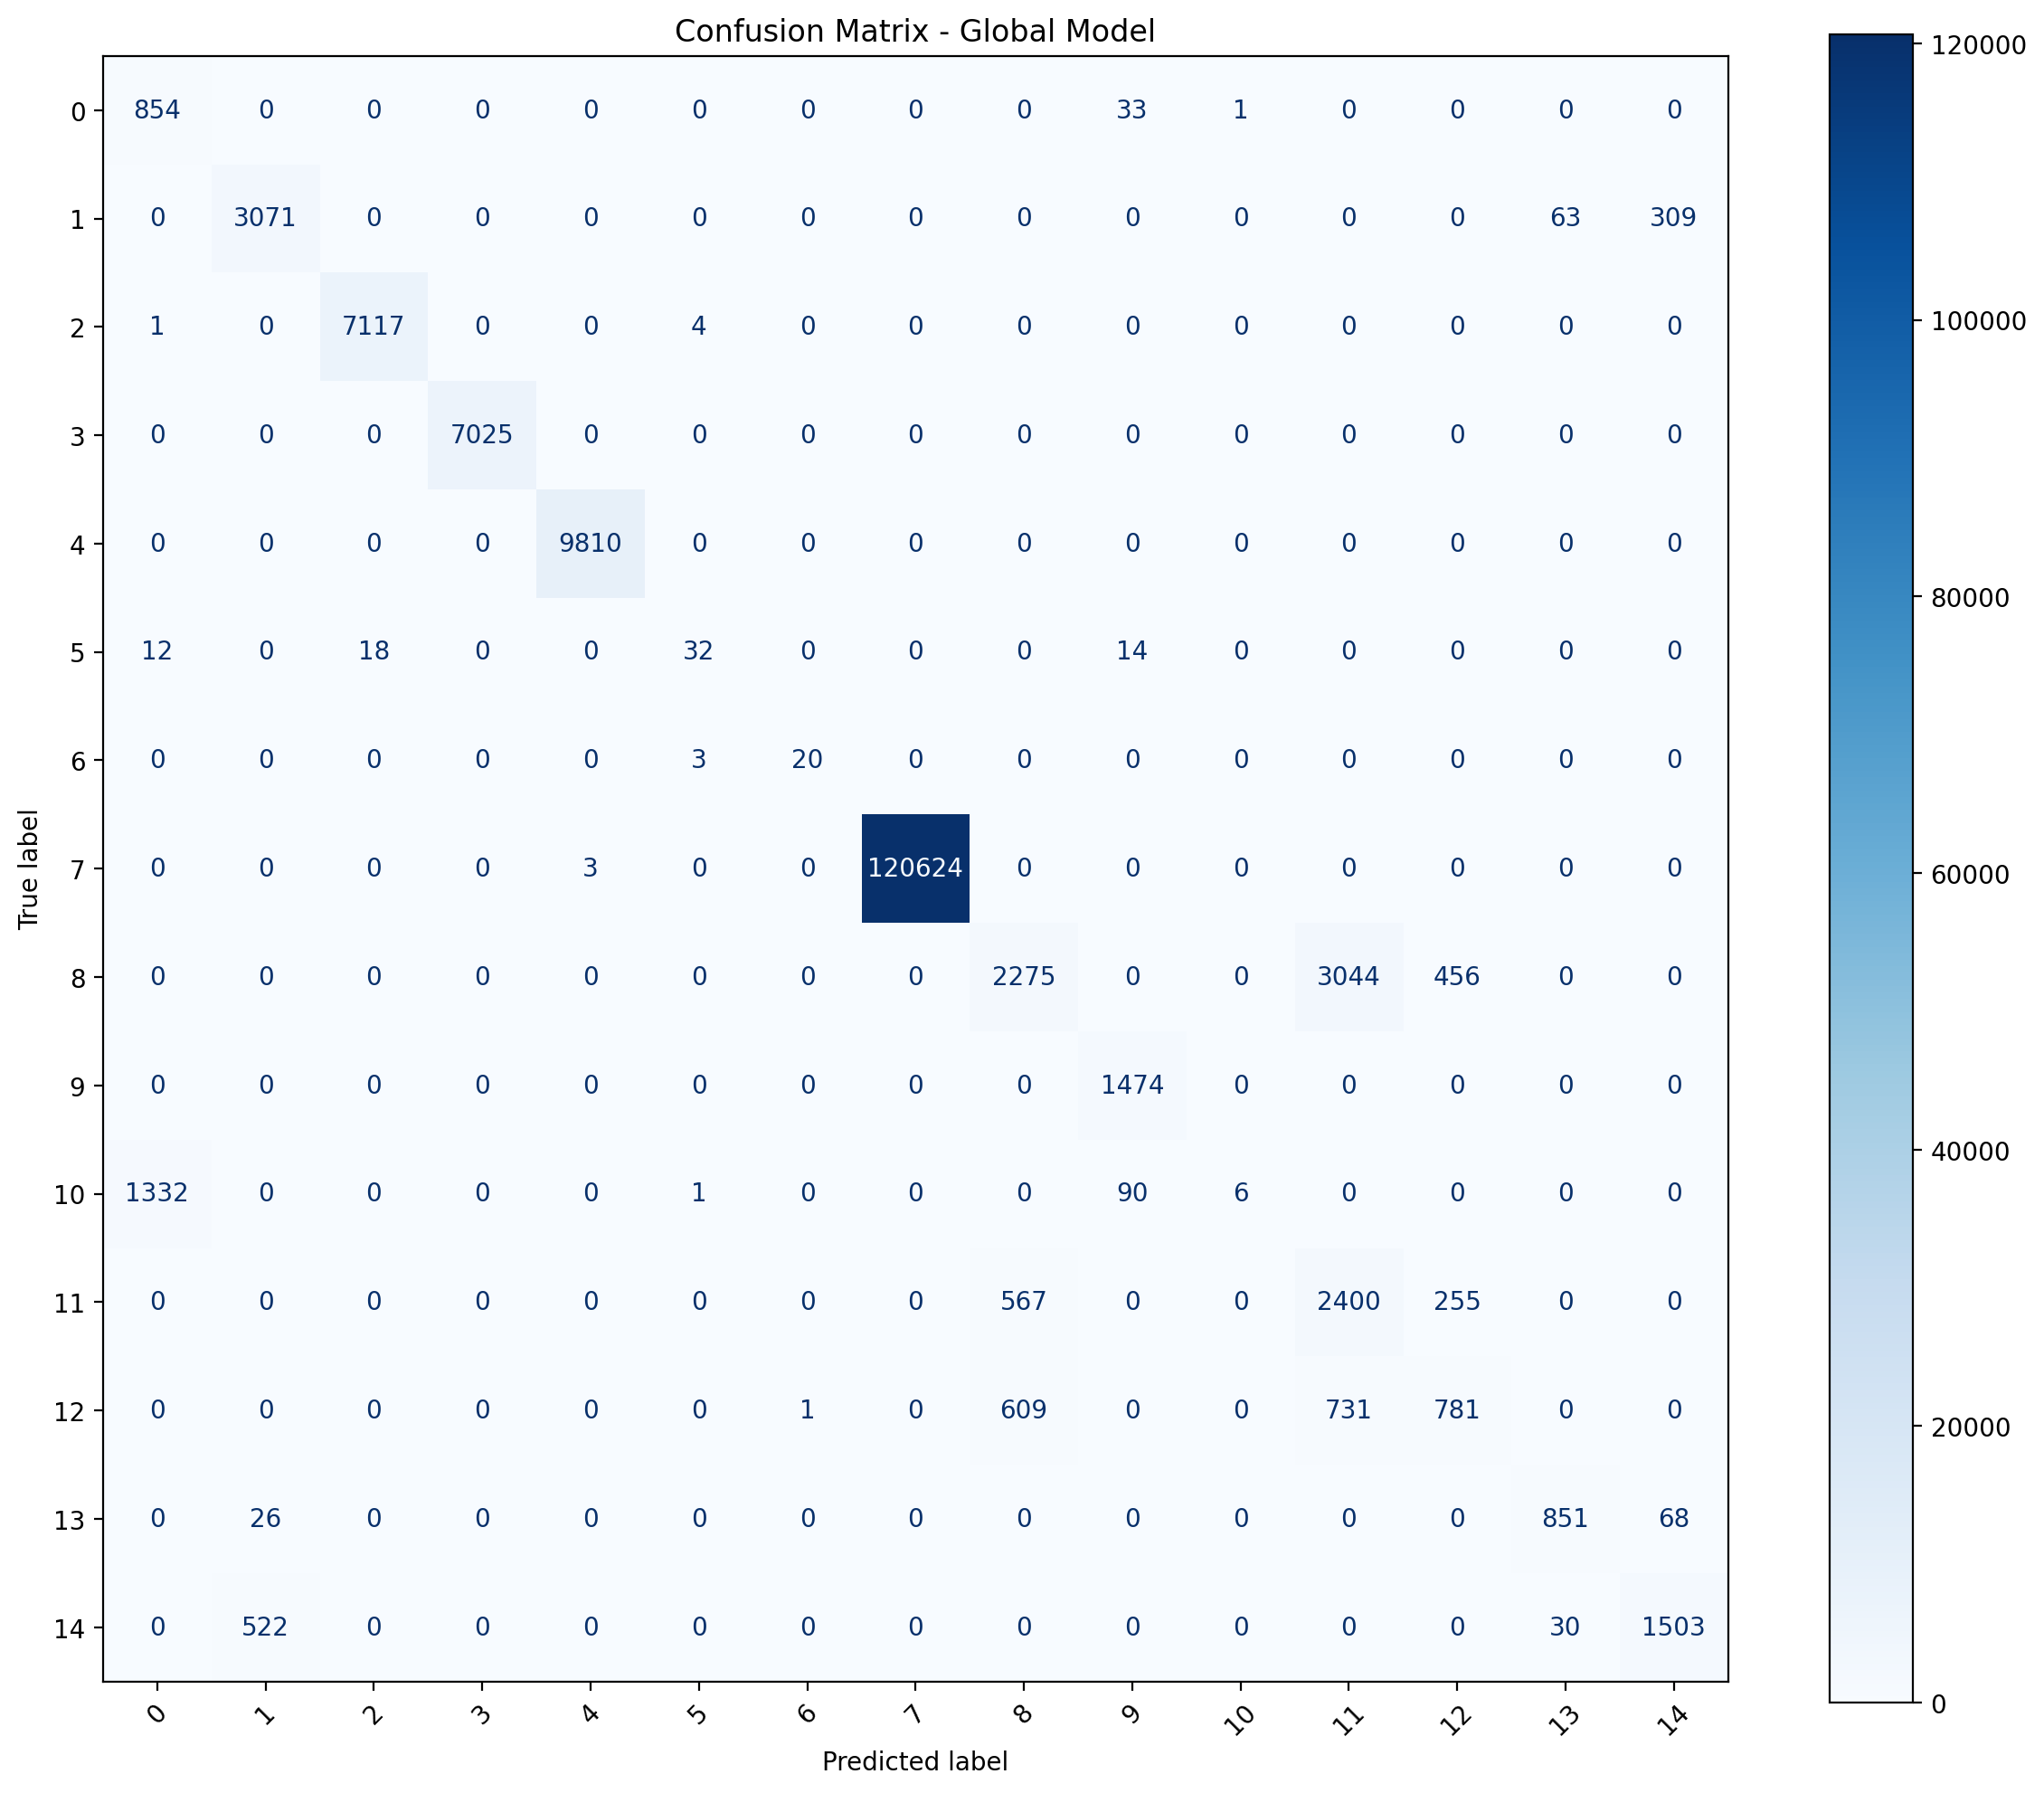

In [40]:
X_test = pd.concat([client_test_data[j][0] for j in range(5)], ignore_index=True)
y_test = pd.concat([client_test_data[j][1] for j in range(5)], ignore_index=True)


import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# After all federated learning rounds have completed

# Set final global model weights
global_model.coefs_ = global_weights
global_model.intercepts_ = global_biases


# Predict with the global model and measure prediction time
start_time = time.time()
y_pred_global = global_model.predict(X_test)
end_time = time.time()
prediction_time = end_time - start_time

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred_global)
precision = precision_score(y_test, y_pred_global, average='macro', zero_division=0)
recall = recall_score(y_test, y_pred_global, average='macro', zero_division=0)
f1 = f1_score(y_test, y_pred_global, average='macro', zero_division=0)

cm_global = confusion_matrix(y_test, y_pred_global, labels=all_classes)

# Print metrics
print(f"\nConfusion Matrix for Global Model:\n{cm_global}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (macro): {precision:.4f}")
print(f"Recall (macro): {recall:.4f}")
print(f"F1 Score (macro): {f1:.4f}")
print(f"Prediction Time: {prediction_time:.4f} seconds")

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_global, display_labels=all_classes)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Global Model")
plt.show()



disp = ConfusionMatrixDisplay(confusion_matrix=cm_global, display_labels=all_classes)
fig, ax = plt.subplots(figsize=(12, 10))  # enlarge plot
disp.plot(cmap="Blues", ax=ax, values_format=".0f")  # ".0f" = no decimals
plt.title("Confusion Matrix - Global Model")
plt.xticks(rotation=45)  # rotate labels if long
plt.tight_layout()
plt.show()





Generating SHAP explanations for the final local models...


100%|██████████| 100/100 [00:28<00:00,  3.56it/s]


SHAP values shape: (100, 67, 15)
X_explainer shape: (100, 67)
Number of classes: 15

2. Calculating feature importance percentages...
Mean absolute SHAP shape after processing: (67,)
Number of features: 67
Number of feature names: 67

Top 10 Features by Importance:
udp.stream                    : 11.57%
encoder__dns.qry.name.len_0   : 11.39%
encoder__mqtt.conack.flags_0  : 10.92%
encoder__mqtt.topic_0         : 10.86%
encoder__mqtt.protoname_0     : 9.32%
encoder__http.request.method_0.0: 3.86%
encoder__dns.qry.name.len_0.0 : 2.98%
encoder__http.request.version_0.0: 2.94%
encoder__http.referer_0       : 2.78%
encoder__http.request.method_0: 2.69%
tcp.ack                       : 2.42%
tcp.connection.rst            : 2.34%
tcp.ack_raw                   : 2.28%
encoder__http.referer_0.0     : 2.21%
encoder__mqtt.protoname_0.0   : 2.19%

5 Least Important Features:
encoder__dns.qry.name.len_0.debian.pool.ntp.org: 0.00%
encoder__dns.qry.name.len_3.debian.pool.ntp.org: 0.00%
encoder__dns.qry

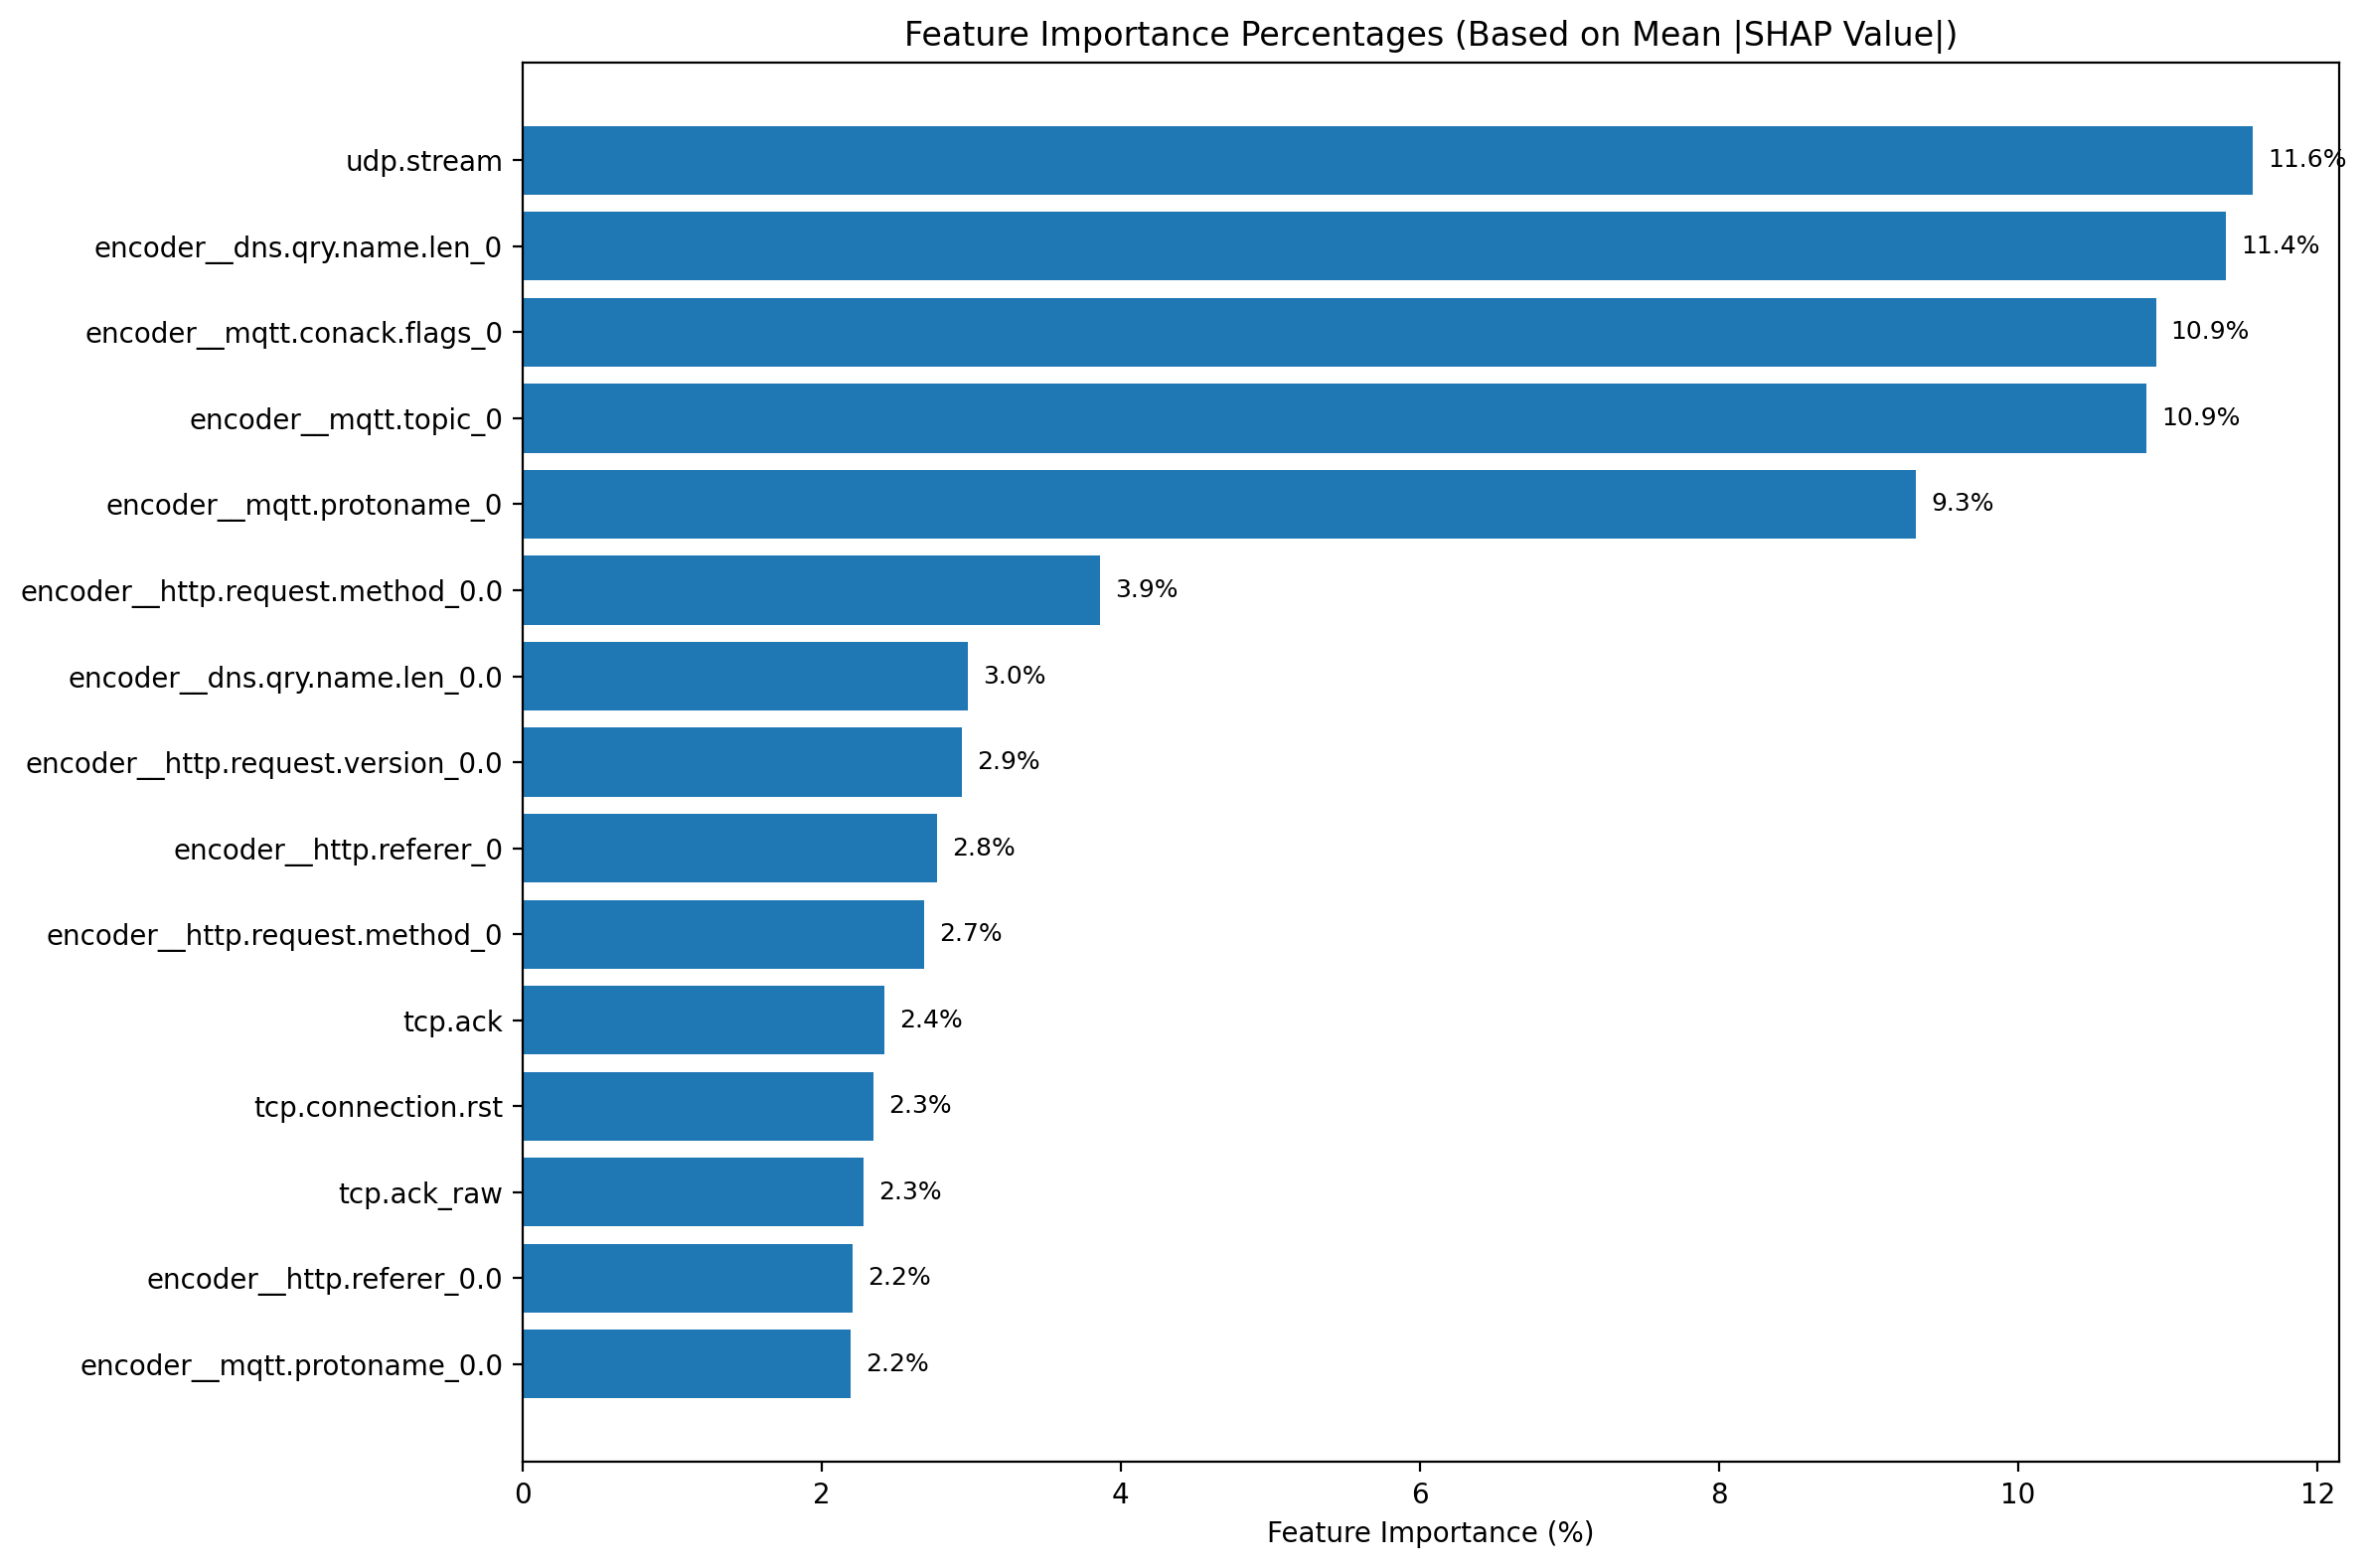

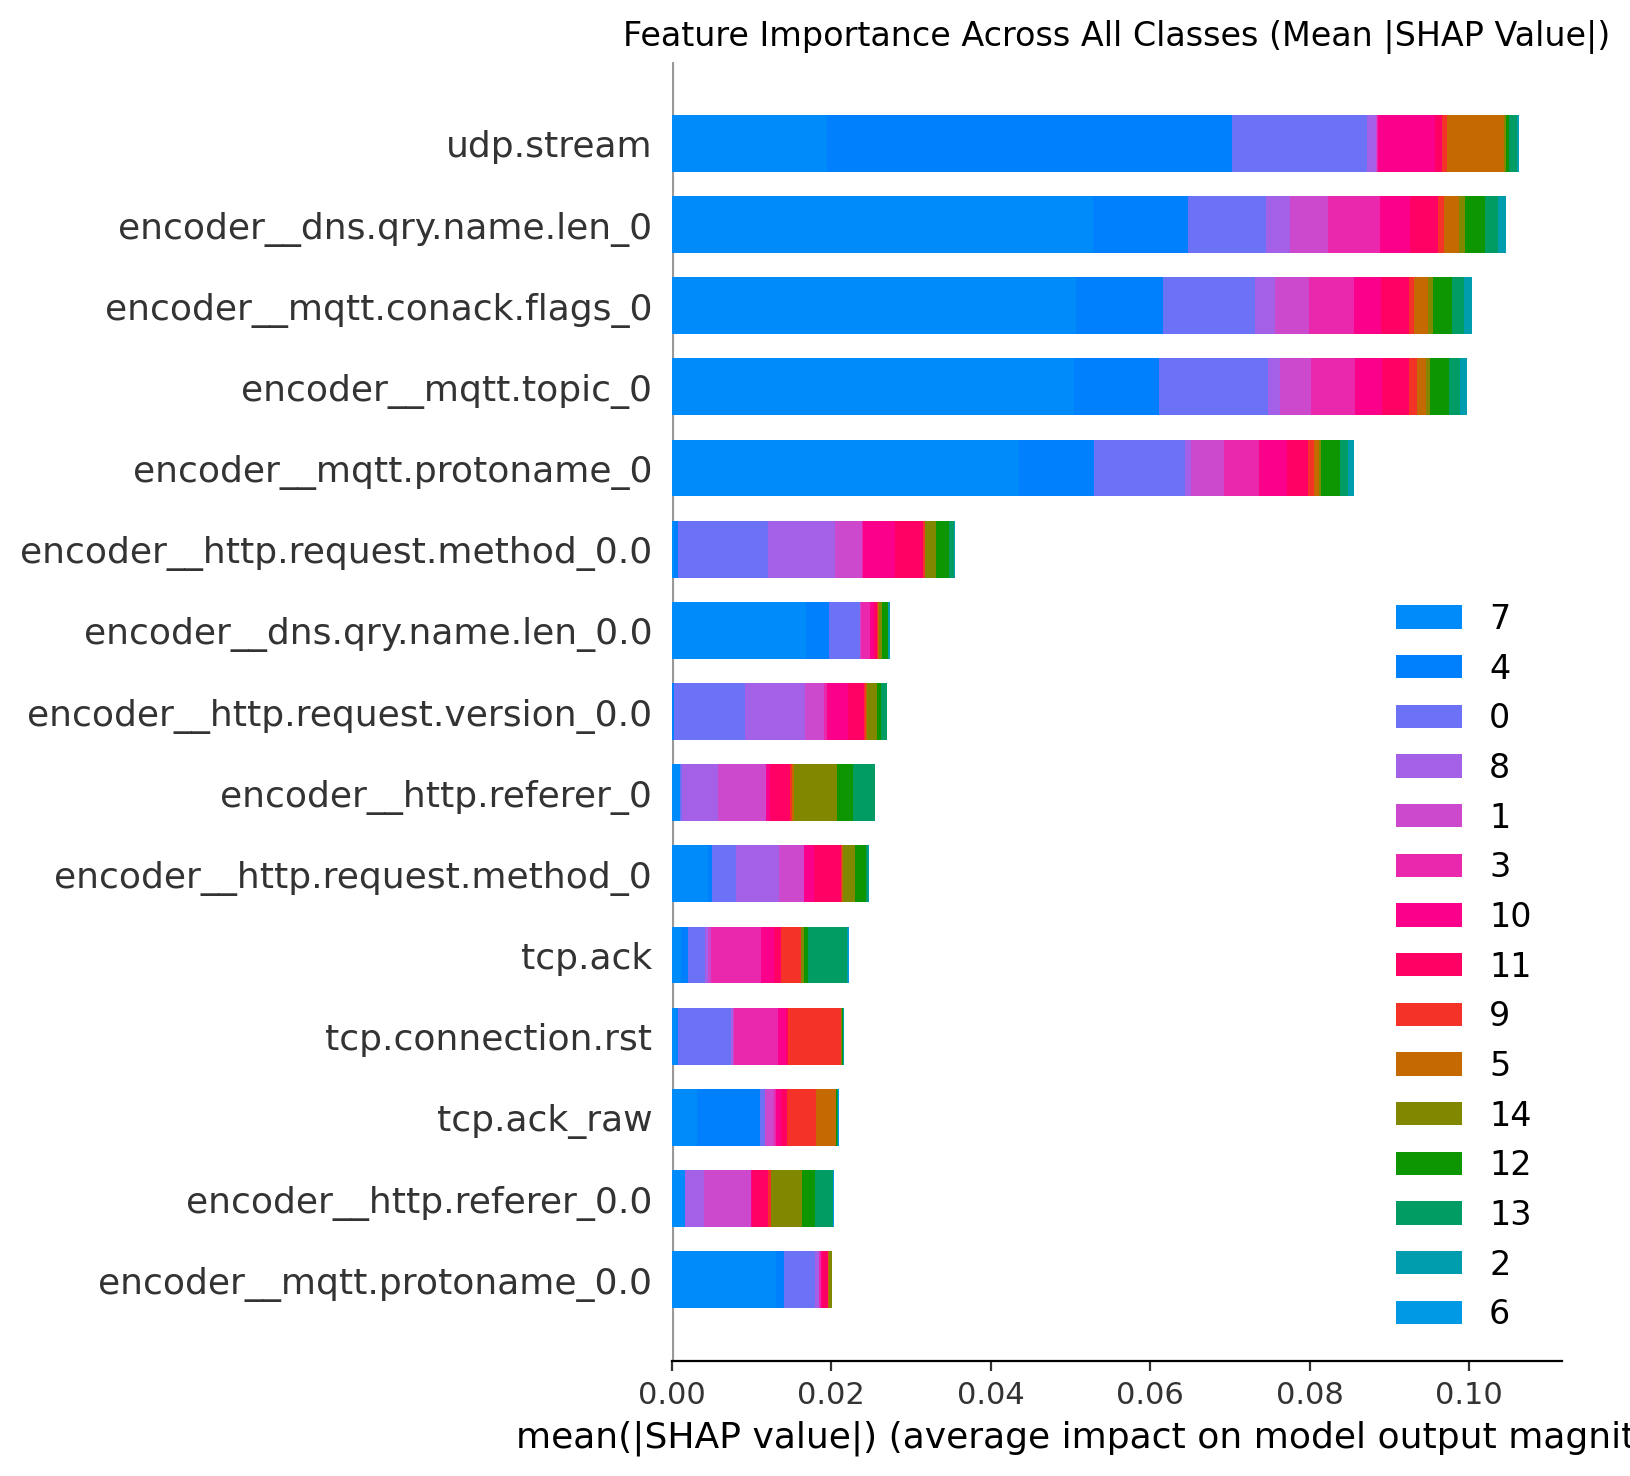


Summary:
Total features: 67
Top 5 features account for: 54.0% of total importance
Top 10 features account for: 69.3% of total importance
Bottom 5 features account for: 0.0% of total importance
Most important feature: udp.stream (11.57%)
Least important feature: encoder__mqtt.conack.flags_- (0.00%)


In [41]:
X_train = pd.concat([client_train_data[j][0] for j in range(5)], ignore_index=True)
y_train = pd.concat([client_train_data[j][1] for j in range(5)], ignore_index=True)
X_test = pd.concat([client_test_data[j][0] for j in range(5)], ignore_index=True)
y_test = pd.concat([client_test_data[j][1] for j in range(5)], ignore_index=True)

model  = global_model
print(f"\nGenerating SHAP explanations for the final local models...")

X_explainer = X_test.values[:100]
# X_explainer = X_test.values[:50]  # Subset of test data

# Select a representative background set (e.g., 100 samples)
background = shap.sample(X_train, 100) if len(X_train) > 100 else X_train

# Initialize the SHAP KernelExplainer
explainer = shap.KernelExplainer(model.predict_proba, background)

# Compute SHAP values for the explanation set
shap_values = explainer.shap_values(X_explainer)

print(f"SHAP values shape: {[sv.shape for sv in shap_values] if isinstance(shap_values, list) else shap_values.shape}")
print(f"X_explainer shape: {X_explainer.shape}")
print(f"Number of classes: {len(model.classes_)}")

# # 1. Multi-class summary plot (shows all classes together)
# print("\n1. Generating multi-class summary plot...")
# shap.summary_plot(shap_values, X_explainer, feature_names=X_test.columns, 
#                   class_names=model.classes_)

# 2. Calculate feature importance percentages
print("\n2. Calculating feature importance percentages...")

# Handle SHAP values based on their structure
if isinstance(shap_values, list):
    # Multi-class case: shap_values is a list of arrays, one per class
    # Each array has shape (n_samples, n_features)
    mean_abs_shap = np.mean([np.abs(sv).mean(axis=0) for sv in shap_values], axis=0)
elif len(shap_values.shape) == 3:
    # Multi-class case: shap_values has shape (n_samples, n_features, n_classes)
    # Average across samples (axis=0) and classes (axis=2)
    mean_abs_shap = np.abs(shap_values).mean(axis=(0, 2))
else:
    # Binary classification case: shape (n_samples, n_features)
    mean_abs_shap = np.abs(shap_values).mean(axis=0)

print(f"Mean absolute SHAP shape after processing: {mean_abs_shap.shape}")

# Calculate percentages
total_importance = np.sum(mean_abs_shap)
feature_importance_pct = (mean_abs_shap / total_importance) * 100

# Get feature names - use the actual column names from X_test
feature_names = list(X_test.columns)
n_features = len(mean_abs_shap)

print(f"Number of features: {n_features}")
print(f"Number of feature names: {len(feature_names)}")

# Ensure feature names match the number of features
if len(feature_names) != n_features:
    print(f"Error: Feature names length ({len(feature_names)}) doesn't match SHAP values length ({n_features})")
    # Use available feature names or create generic ones
    if len(feature_names) > n_features:
        feature_names = feature_names[:n_features]
    else:
        feature_names.extend([f'feature_{i}' for i in range(len(feature_names), n_features)])

# Create DataFrame for easier handling
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': mean_abs_shap,
    'percentage': feature_importance_pct
}).sort_values('importance', ascending=False)

# Display top features with percentages
print("\nTop 10 Features by Importance:")
print("=" * 50)
dict = {}
for idx, row in importance_df.head(15).iterrows():
    dict[row['feature']]= round(row['percentage'], 2)
    print(f"{row['feature']:<30}: {row['percentage']:.2f}%")
# Display least important features
print("\n5 Least Important Features:")
print("=" * 50)
for idx, row in importance_df.tail(5).iterrows():
    print(f"{row['feature']:<30}: {row['percentage']:.2f}%")

# 3. Bar plot with percentages
print("\n3. Generating feature importance bar plot with percentages...")
plt.figure(figsize=(12, 8))

# Get top 15 features for plotting
top_features = importance_df.head(15)

# Create horizontal bar plot
bars = plt.barh(range(len(top_features)), top_features['percentage'])
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Feature Importance (%)')
plt.title('Feature Importance Percentages (Based on Mean |SHAP Value|)')

# Add percentage labels on bars
for i, (bar, pct) in enumerate(zip(bars, top_features['percentage'])):
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2, 
            f'{pct:.1f}%', va='center', fontsize=9)

plt.gca().invert_yaxis()  # Highest importance at top
plt.tight_layout()
# plt.show()

# 4. Alternative: Use SHAP's built-in bar plot but create custom percentage display
print("\n4. Generating SHAP bar plot...")
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_explainer, plot_type="bar",
                feature_names=feature_names, class_names=model.classes_,
                max_display=15, show=False)
plt.title("Feature Importance Across All Classes (Mean |SHAP Value|)")

# Add percentage text to the current plot
ax = plt.gca()
bars = ax.patches
if len(bars) > 0:
    # Get the importance values from the bars
    bar_values = [bar.get_width() for bar in bars]
    total_bar_value = sum(bar_values)
    
#     # Add percentage labels
#     for bar in bars:
#         width = bar.get_width()
#         percentage = (width / total_bar_value) * 100
#         ax.text(width + max(bar_values) * 0.01, bar.get_y() + bar.get_height()/2,
#                 f'{percentage:.1f}%', va='center', fontsize=8)

plt.tight_layout()
plt.show()

# 5. Print summary statistics
print(f"\nSummary:")
print(f"Total features: {len(importance_df)}")
print(f"Top 5 features account for: {importance_df.head(5)['percentage'].sum():.1f}% of total importance")
print(f"Top 10 features account for: {importance_df.head(10)['percentage'].sum():.1f}% of total importance")
print(f"Bottom 5 features account for: {importance_df.tail(5)['percentage'].sum():.1f}% of total importance")
print(f"Most important feature: {importance_df.iloc[0]['feature']} ({importance_df.iloc[0]['percentage']:.2f}%)")
print(f"Least important feature: {importance_df.iloc[-1]['feature']} ({importance_df.iloc[-1]['percentage']:.2f}%)")

In [39]:
dict
# save to json
import json
with open('fl.json', 'w') as f:
    json.dump(dict, f, indent=4)


================================ Client 0 Model Summary ================================

Generating SHAP explanations for the final local models...


100%|██████████| 100/100 [00:27<00:00,  3.58it/s]


SHAP values shape: (100, 67, 15)
X_explainer shape: (100, 67)
Number of classes: 15

2. Calculating feature importance percentages...
Mean absolute SHAP shape after processing: (67,)
Number of features: 67
Number of feature names: 67

Top 10 Features by Importance:
udp.stream                    : 16.03%
encoder__dns.qry.name.len_0   : 11.64%
encoder__mqtt.conack.flags_0  : 11.31%
encoder__mqtt.topic_0         : 10.79%
encoder__mqtt.protoname_0     : 9.61%
tcp.ack_raw                   : 3.62%
encoder__dns.qry.name.len_0.0 : 3.04%
tcp.ack                       : 2.76%
tcp.len                       : 2.28%
encoder__http.referer_0       : 2.27%
tcp.checksum                  : 2.23%
encoder__mqtt.conack.flags_0.0: 2.14%
encoder__http.request.method_0.0: 2.07%
encoder__http.referer_0.0     : 1.95%
encoder__http.request.method_0: 1.80%

5 Least Important Features:
encoder__dns.qry.name.len_0.debian.pool.ntp.org: 0.00%
encoder__dns.qry.name.len_3.debian.pool.ntp.org: 0.00%
encoder__dns.qry.na

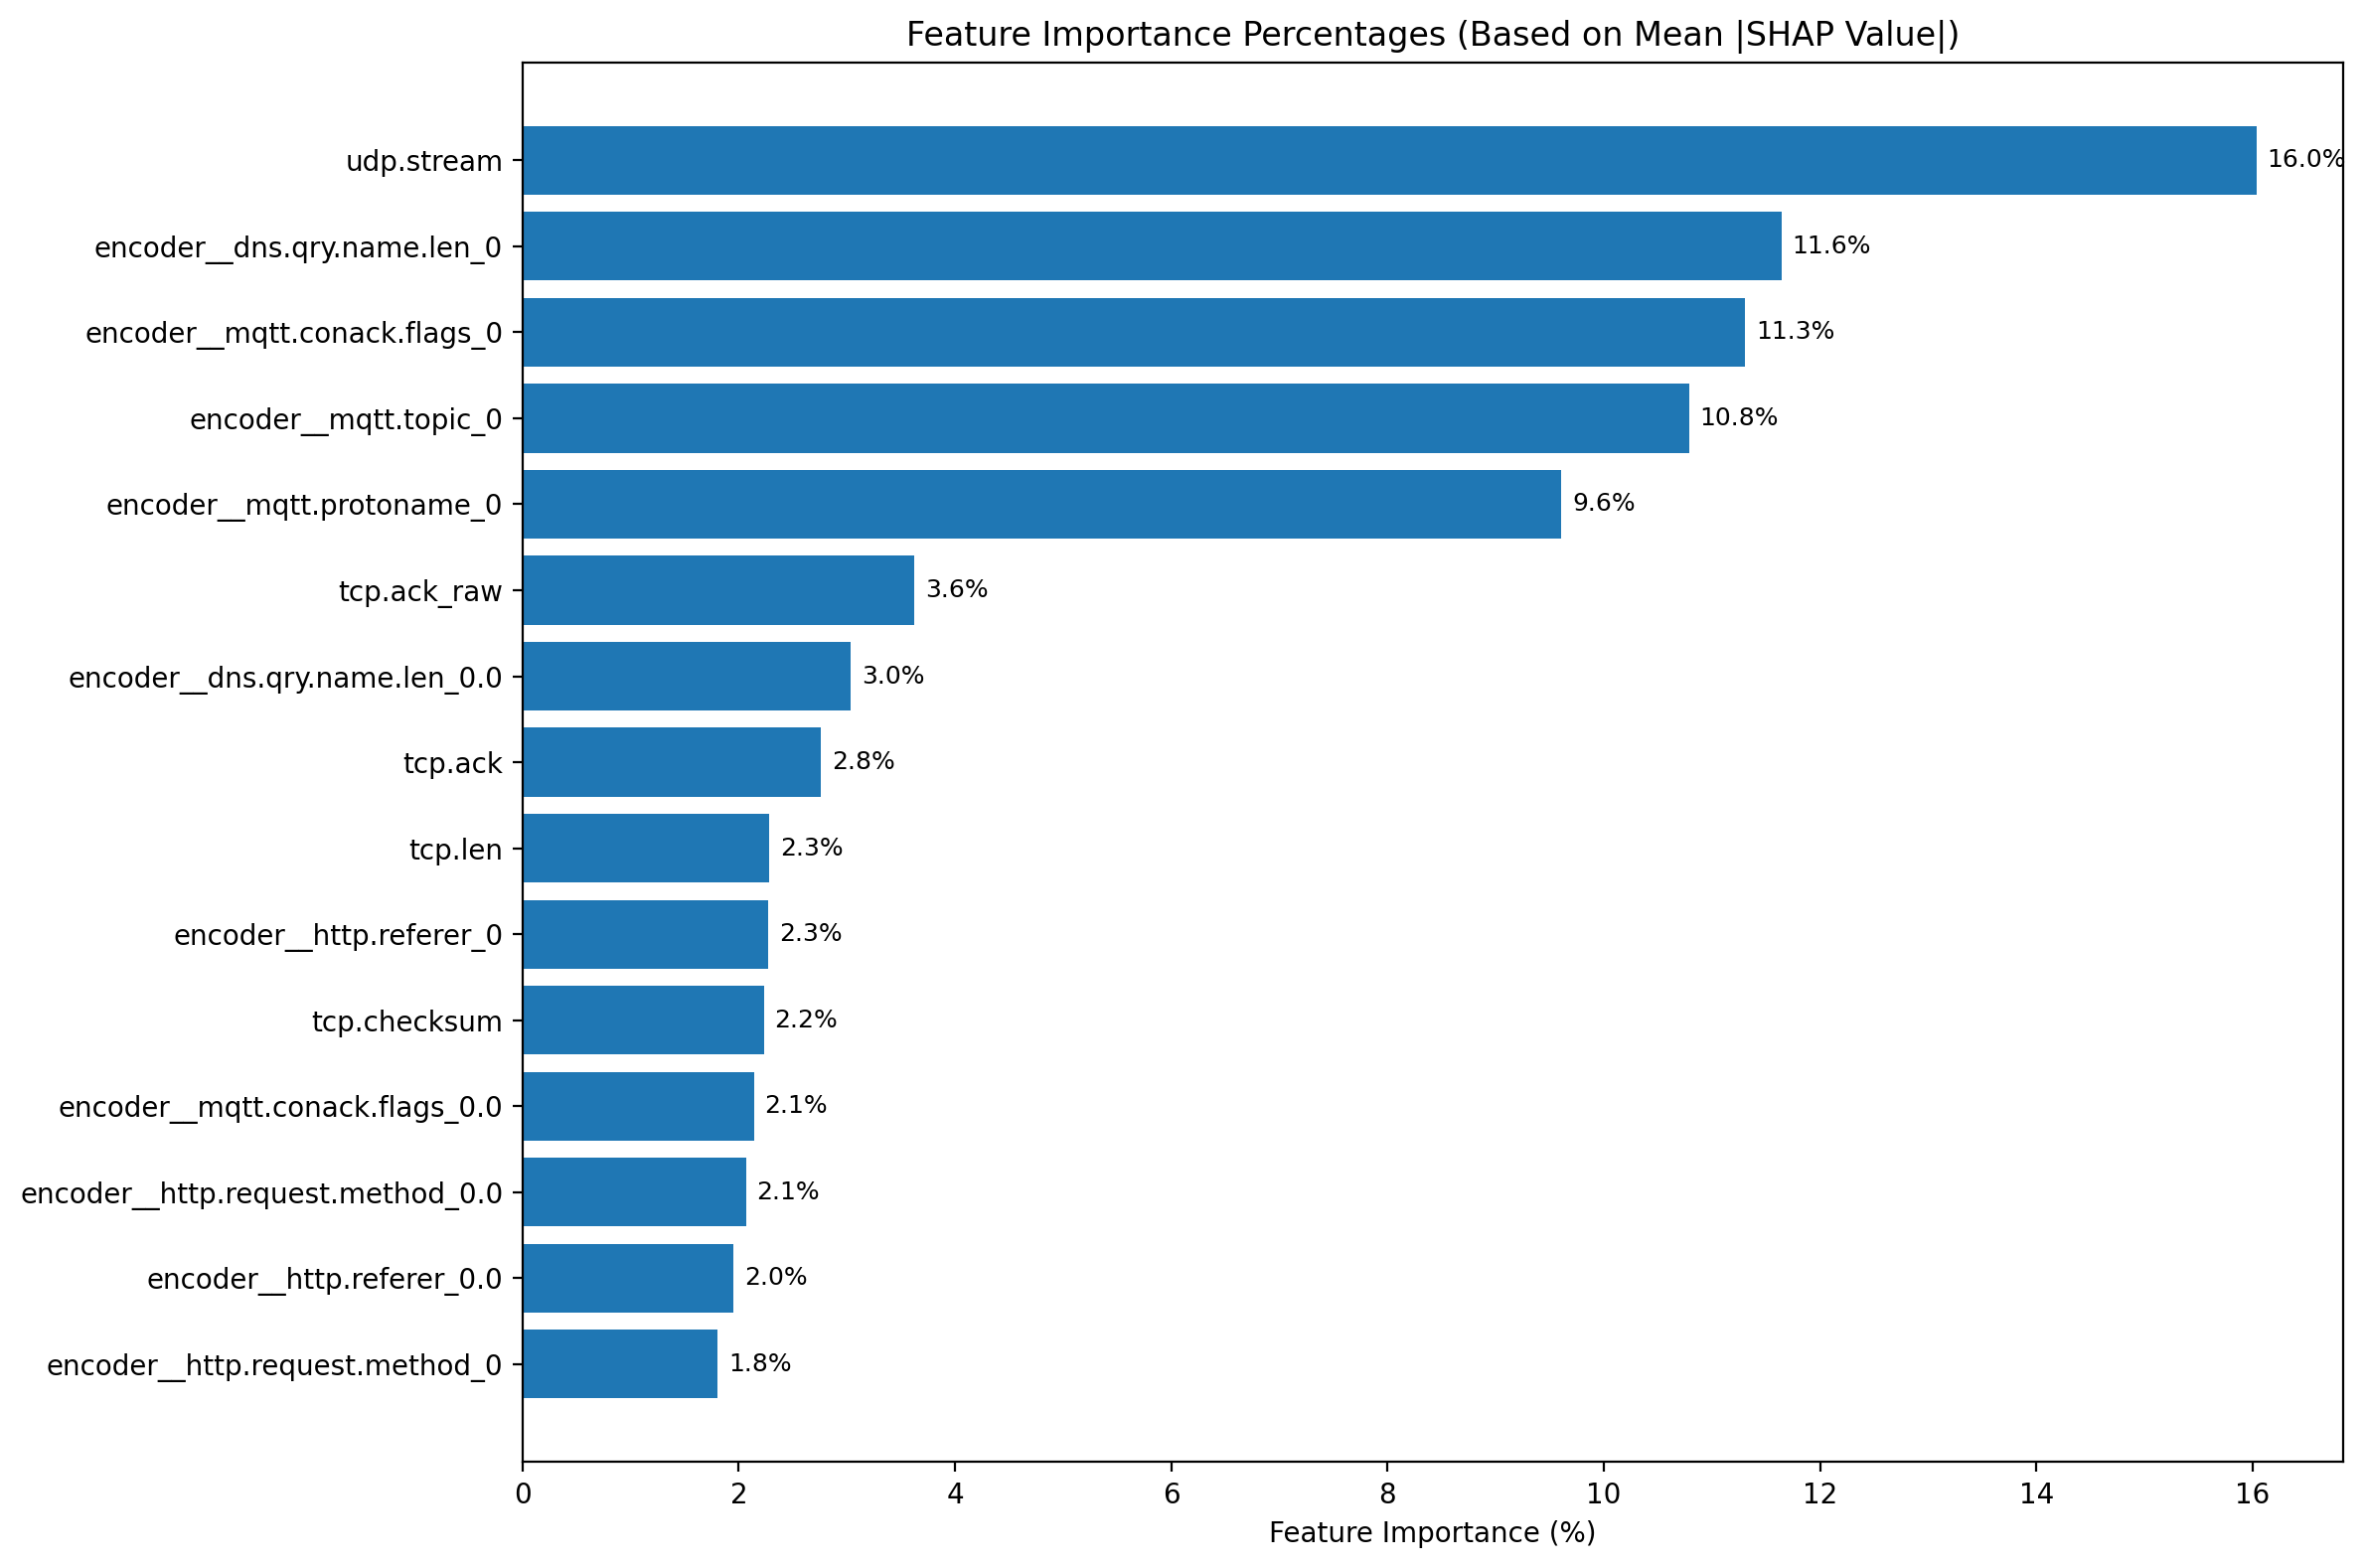

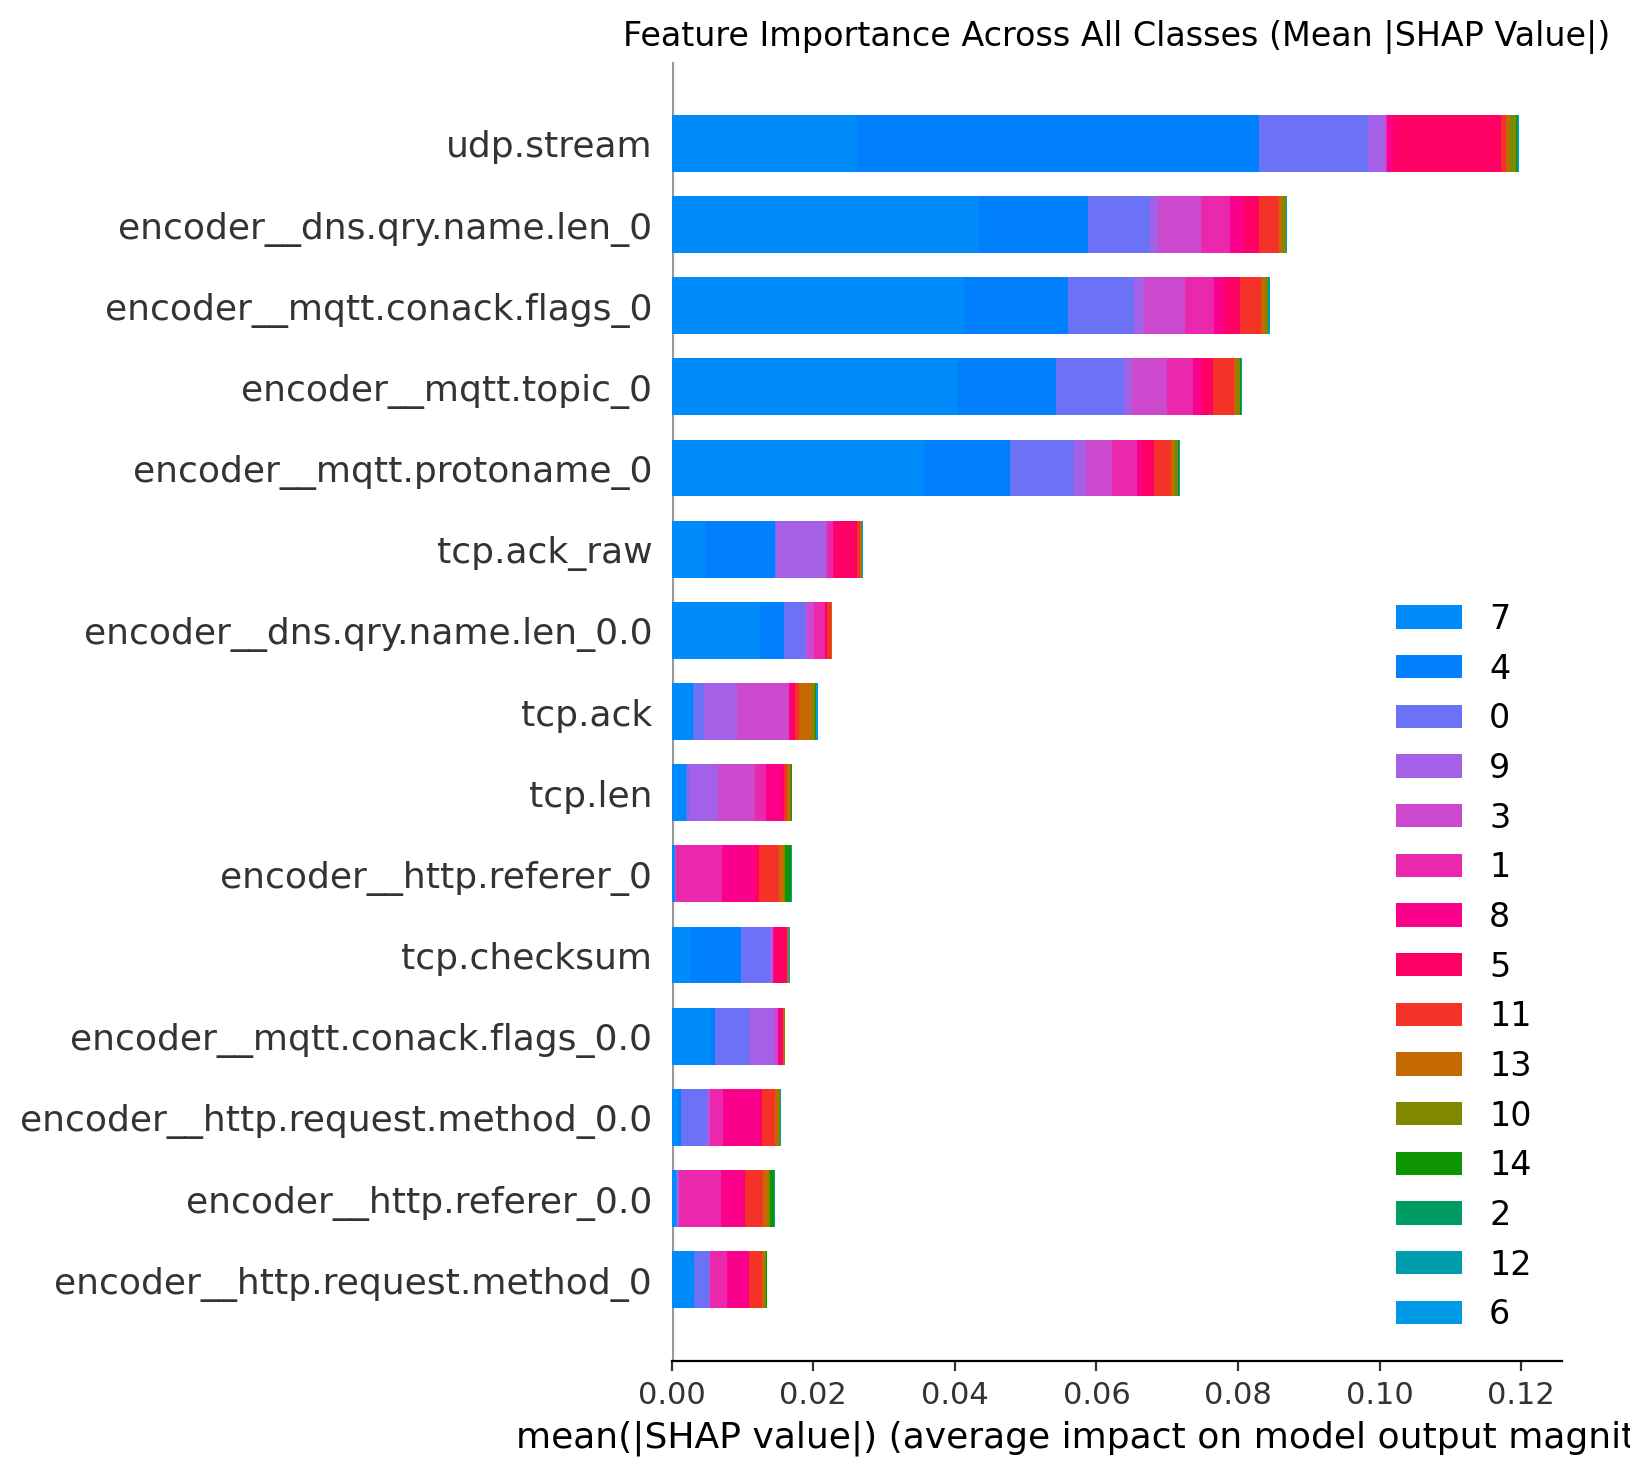


Summary:
Total features: 67
Top 5 features account for: 59.4% of total importance
Top 10 features account for: 73.4% of total importance
Bottom 5 features account for: 0.0% of total importance
Most important feature: udp.stream (16.03%)
Least important feature: encoder__mqtt.conack.flags_- (0.00%)

================================ Client 1 Model Summary ================================

Generating SHAP explanations for the final local models...


100%|██████████| 100/100 [00:24<00:00,  4.11it/s]


SHAP values shape: (100, 67, 15)
X_explainer shape: (100, 67)
Number of classes: 15

2. Calculating feature importance percentages...
Mean absolute SHAP shape after processing: (67,)
Number of features: 67
Number of feature names: 67

Top 10 Features by Importance:
udp.stream                    : 25.57%
icmp.seq_le                   : 20.83%
tcp.ack                       : 9.21%
icmp.checksum                 : 8.33%
encoder__http.request.method_0.0: 4.70%
encoder__http.request.method_0: 3.89%
tcp.len                       : 3.59%
encoder__http.request.version_0.0: 3.36%
tcp.checksum                  : 3.06%
tcp.ack_raw                   : 2.61%
tcp.connection.rst            : 2.43%
tcp.connection.syn            : 2.03%
encoder__http.request.version_0: 1.88%
tcp.flags.ack                 : 1.68%
tcp.flags                     : 1.55%

5 Least Important Features:
encoder__mqtt.protoname_0.0   : 0.00%
encoder__mqtt.protoname_MQTT  : 0.00%
encoder__mqtt.topic_0         : 0.00%
encoder__mqtt

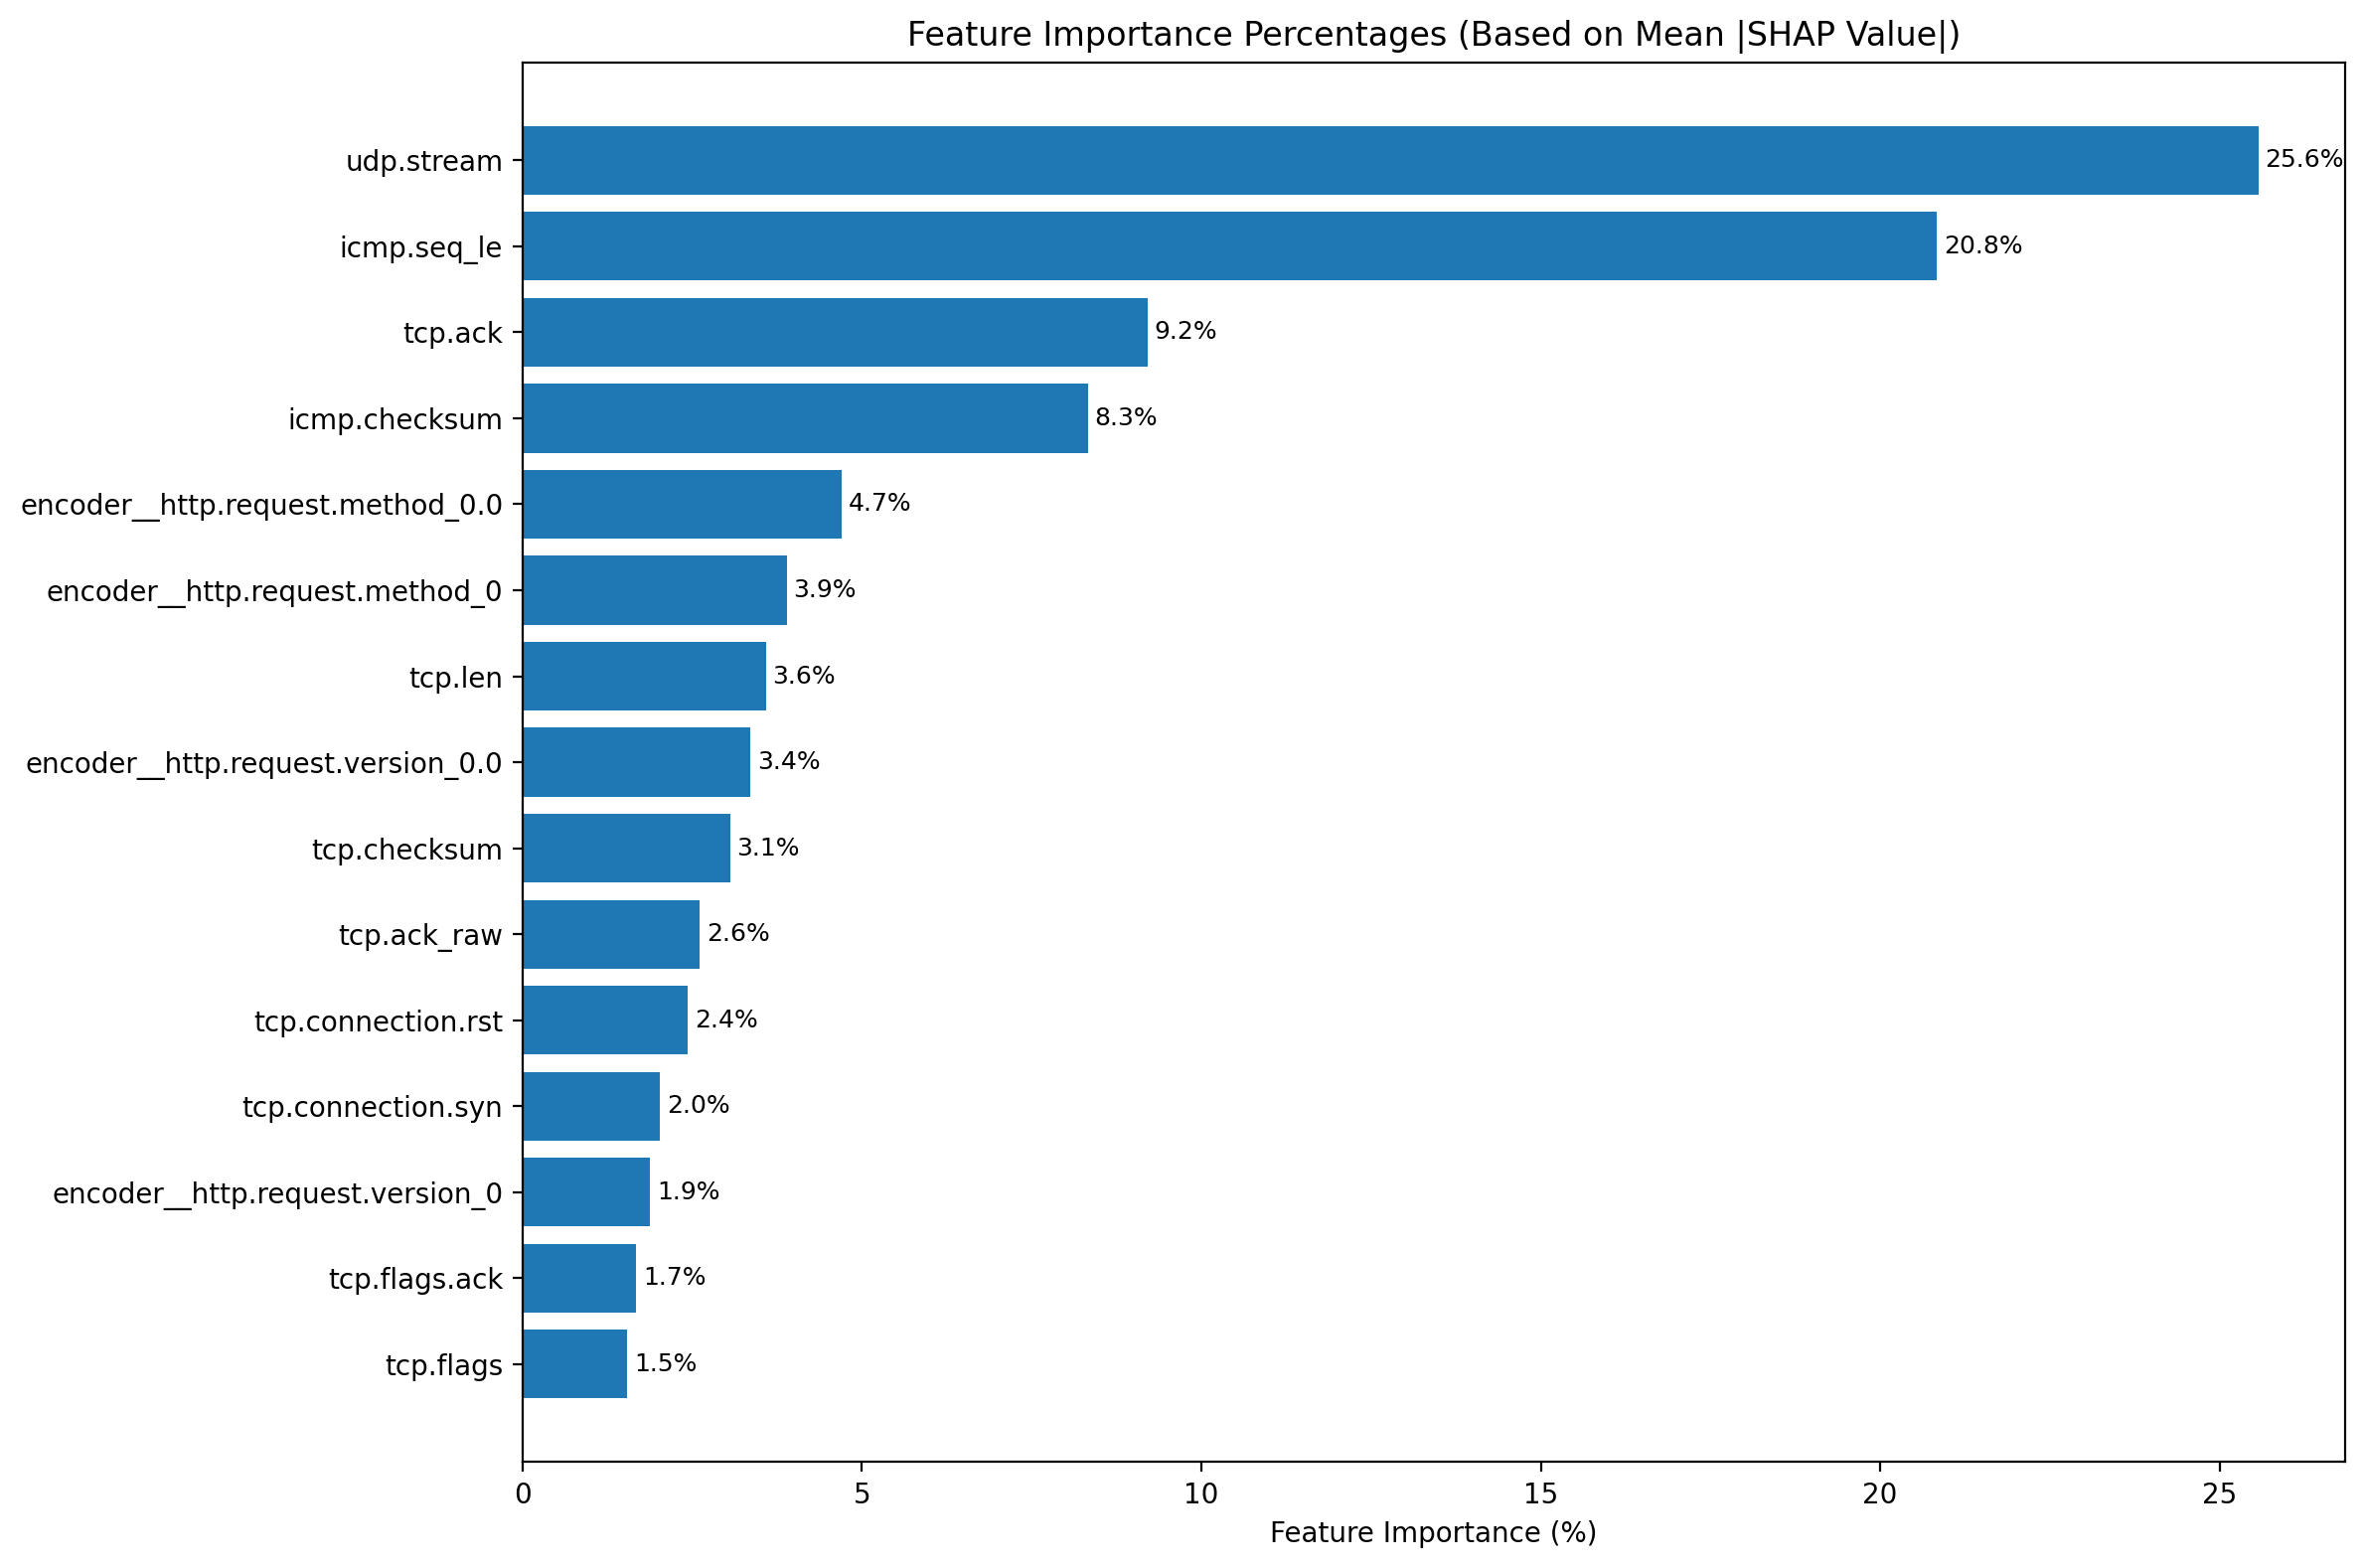

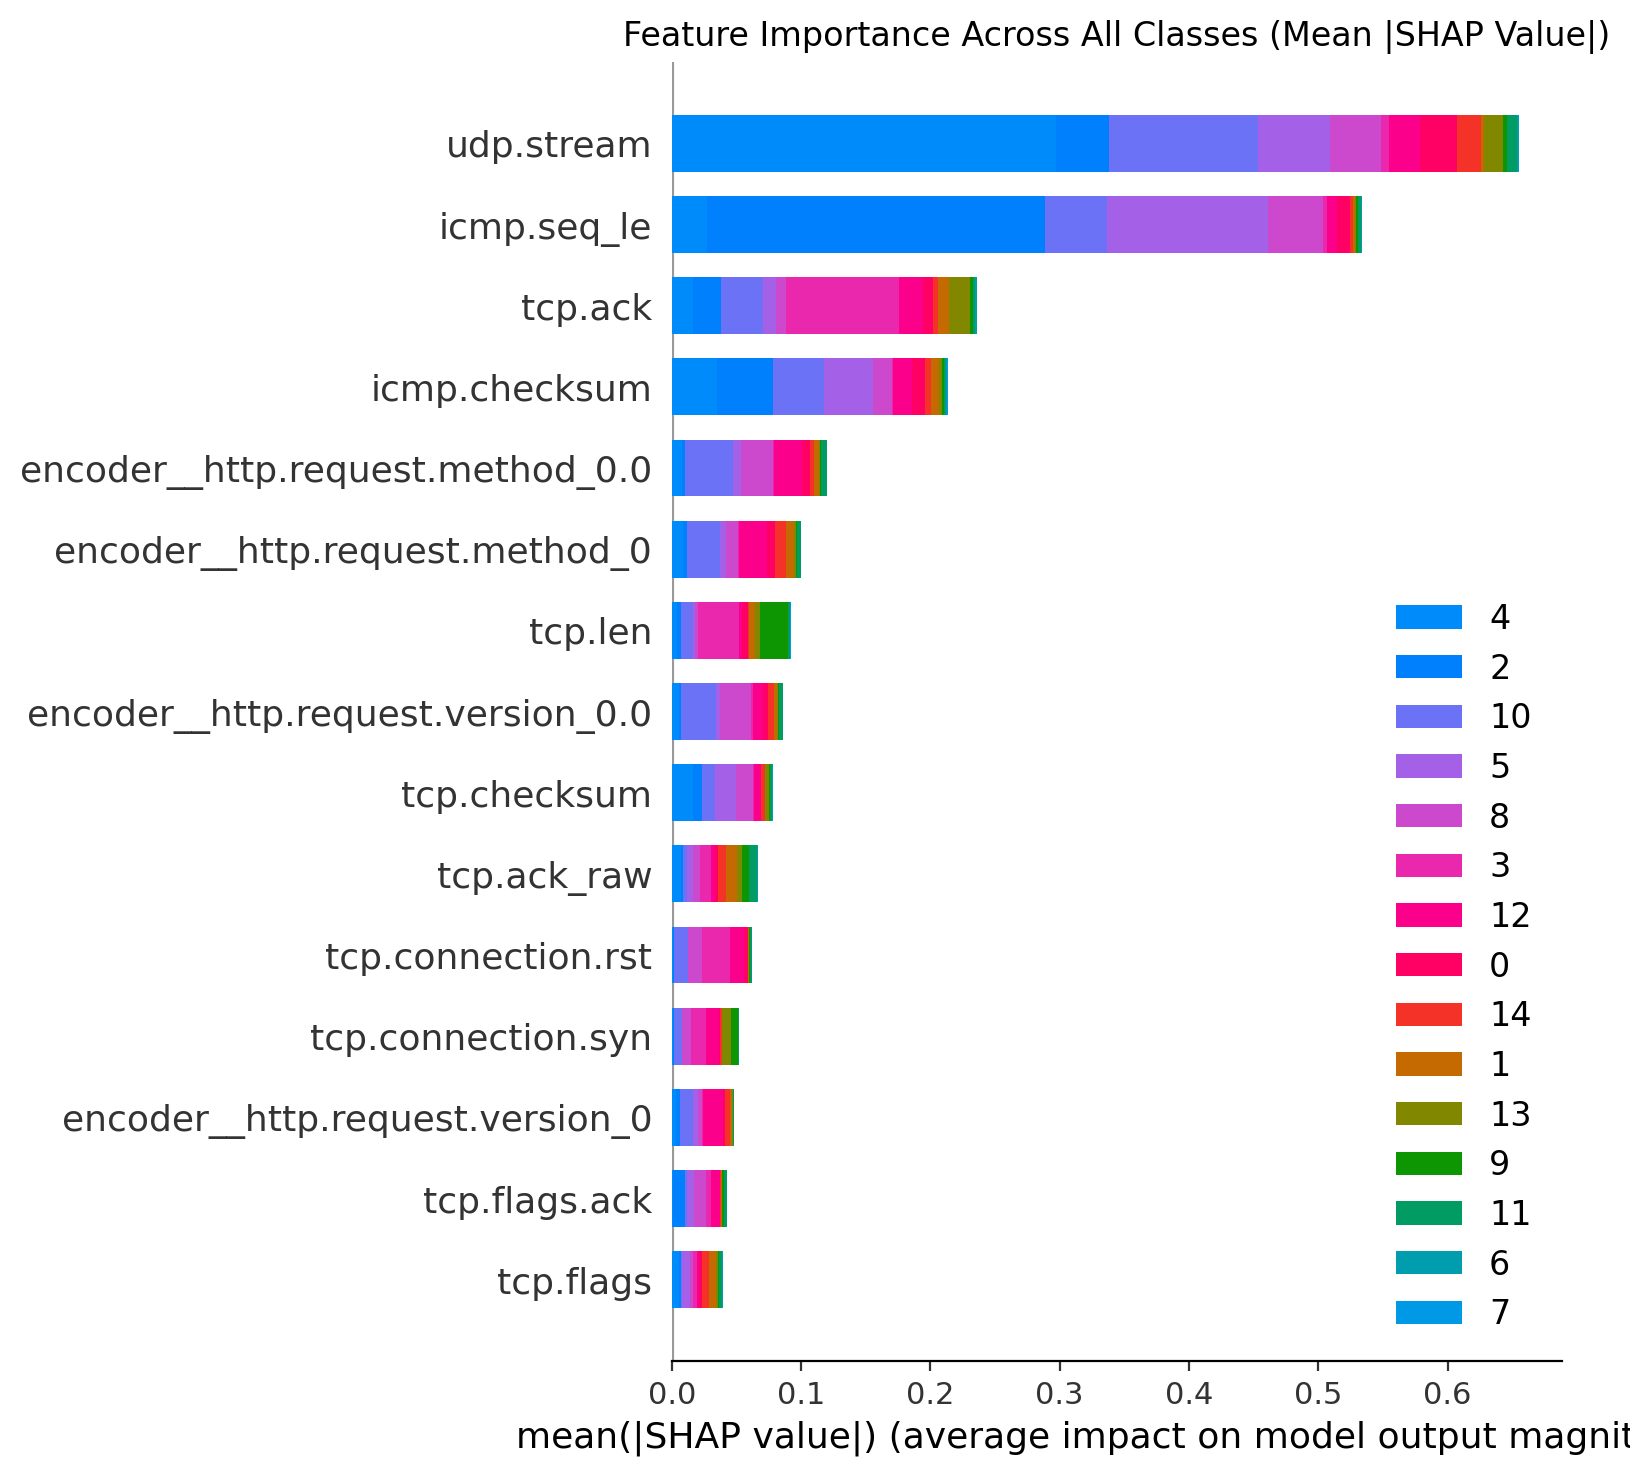


Summary:
Total features: 67
Top 5 features account for: 68.6% of total importance
Top 10 features account for: 85.1% of total importance
Bottom 5 features account for: 0.0% of total importance
Most important feature: udp.stream (25.57%)
Least important feature: encoder__mqtt.topic_Temperature_and_Humidity (0.00%)

================================ Client 2 Model Summary ================================

Generating SHAP explanations for the final local models...


100%|██████████| 100/100 [00:27<00:00,  3.62it/s]


SHAP values shape: (100, 67, 15)
X_explainer shape: (100, 67)
Number of classes: 15

2. Calculating feature importance percentages...
Mean absolute SHAP shape after processing: (67,)
Number of features: 67
Number of feature names: 67

Top 10 Features by Importance:
encoder__dns.qry.name.len_0   : 12.96%
encoder__mqtt.conack.flags_0  : 12.74%
encoder__mqtt.topic_0         : 12.24%
encoder__mqtt.protoname_0     : 10.43%
encoder__http.request.method_0.0: 5.08%
tcp.connection.rst            : 4.65%
encoder__http.request.version_0.0: 3.69%
encoder__http.request.method_0: 3.40%
tcp.ack                       : 3.33%
encoder__dns.qry.name.len_0.0 : 3.12%
tcp.len                       : 2.71%
encoder__http.request.version_0: 2.29%
encoder__mqtt.conack.flags_0.0: 2.23%
encoder__mqtt.protoname_0.0   : 2.23%
icmp.seq_le                   : 1.91%

5 Least Important Features:
encoder__http.request.method_-: 0.00%
encoder__dns.qry.name.len_3.debian.pool.ntp.org: 0.00%
encoder__dns.qry.name.len_0.debi

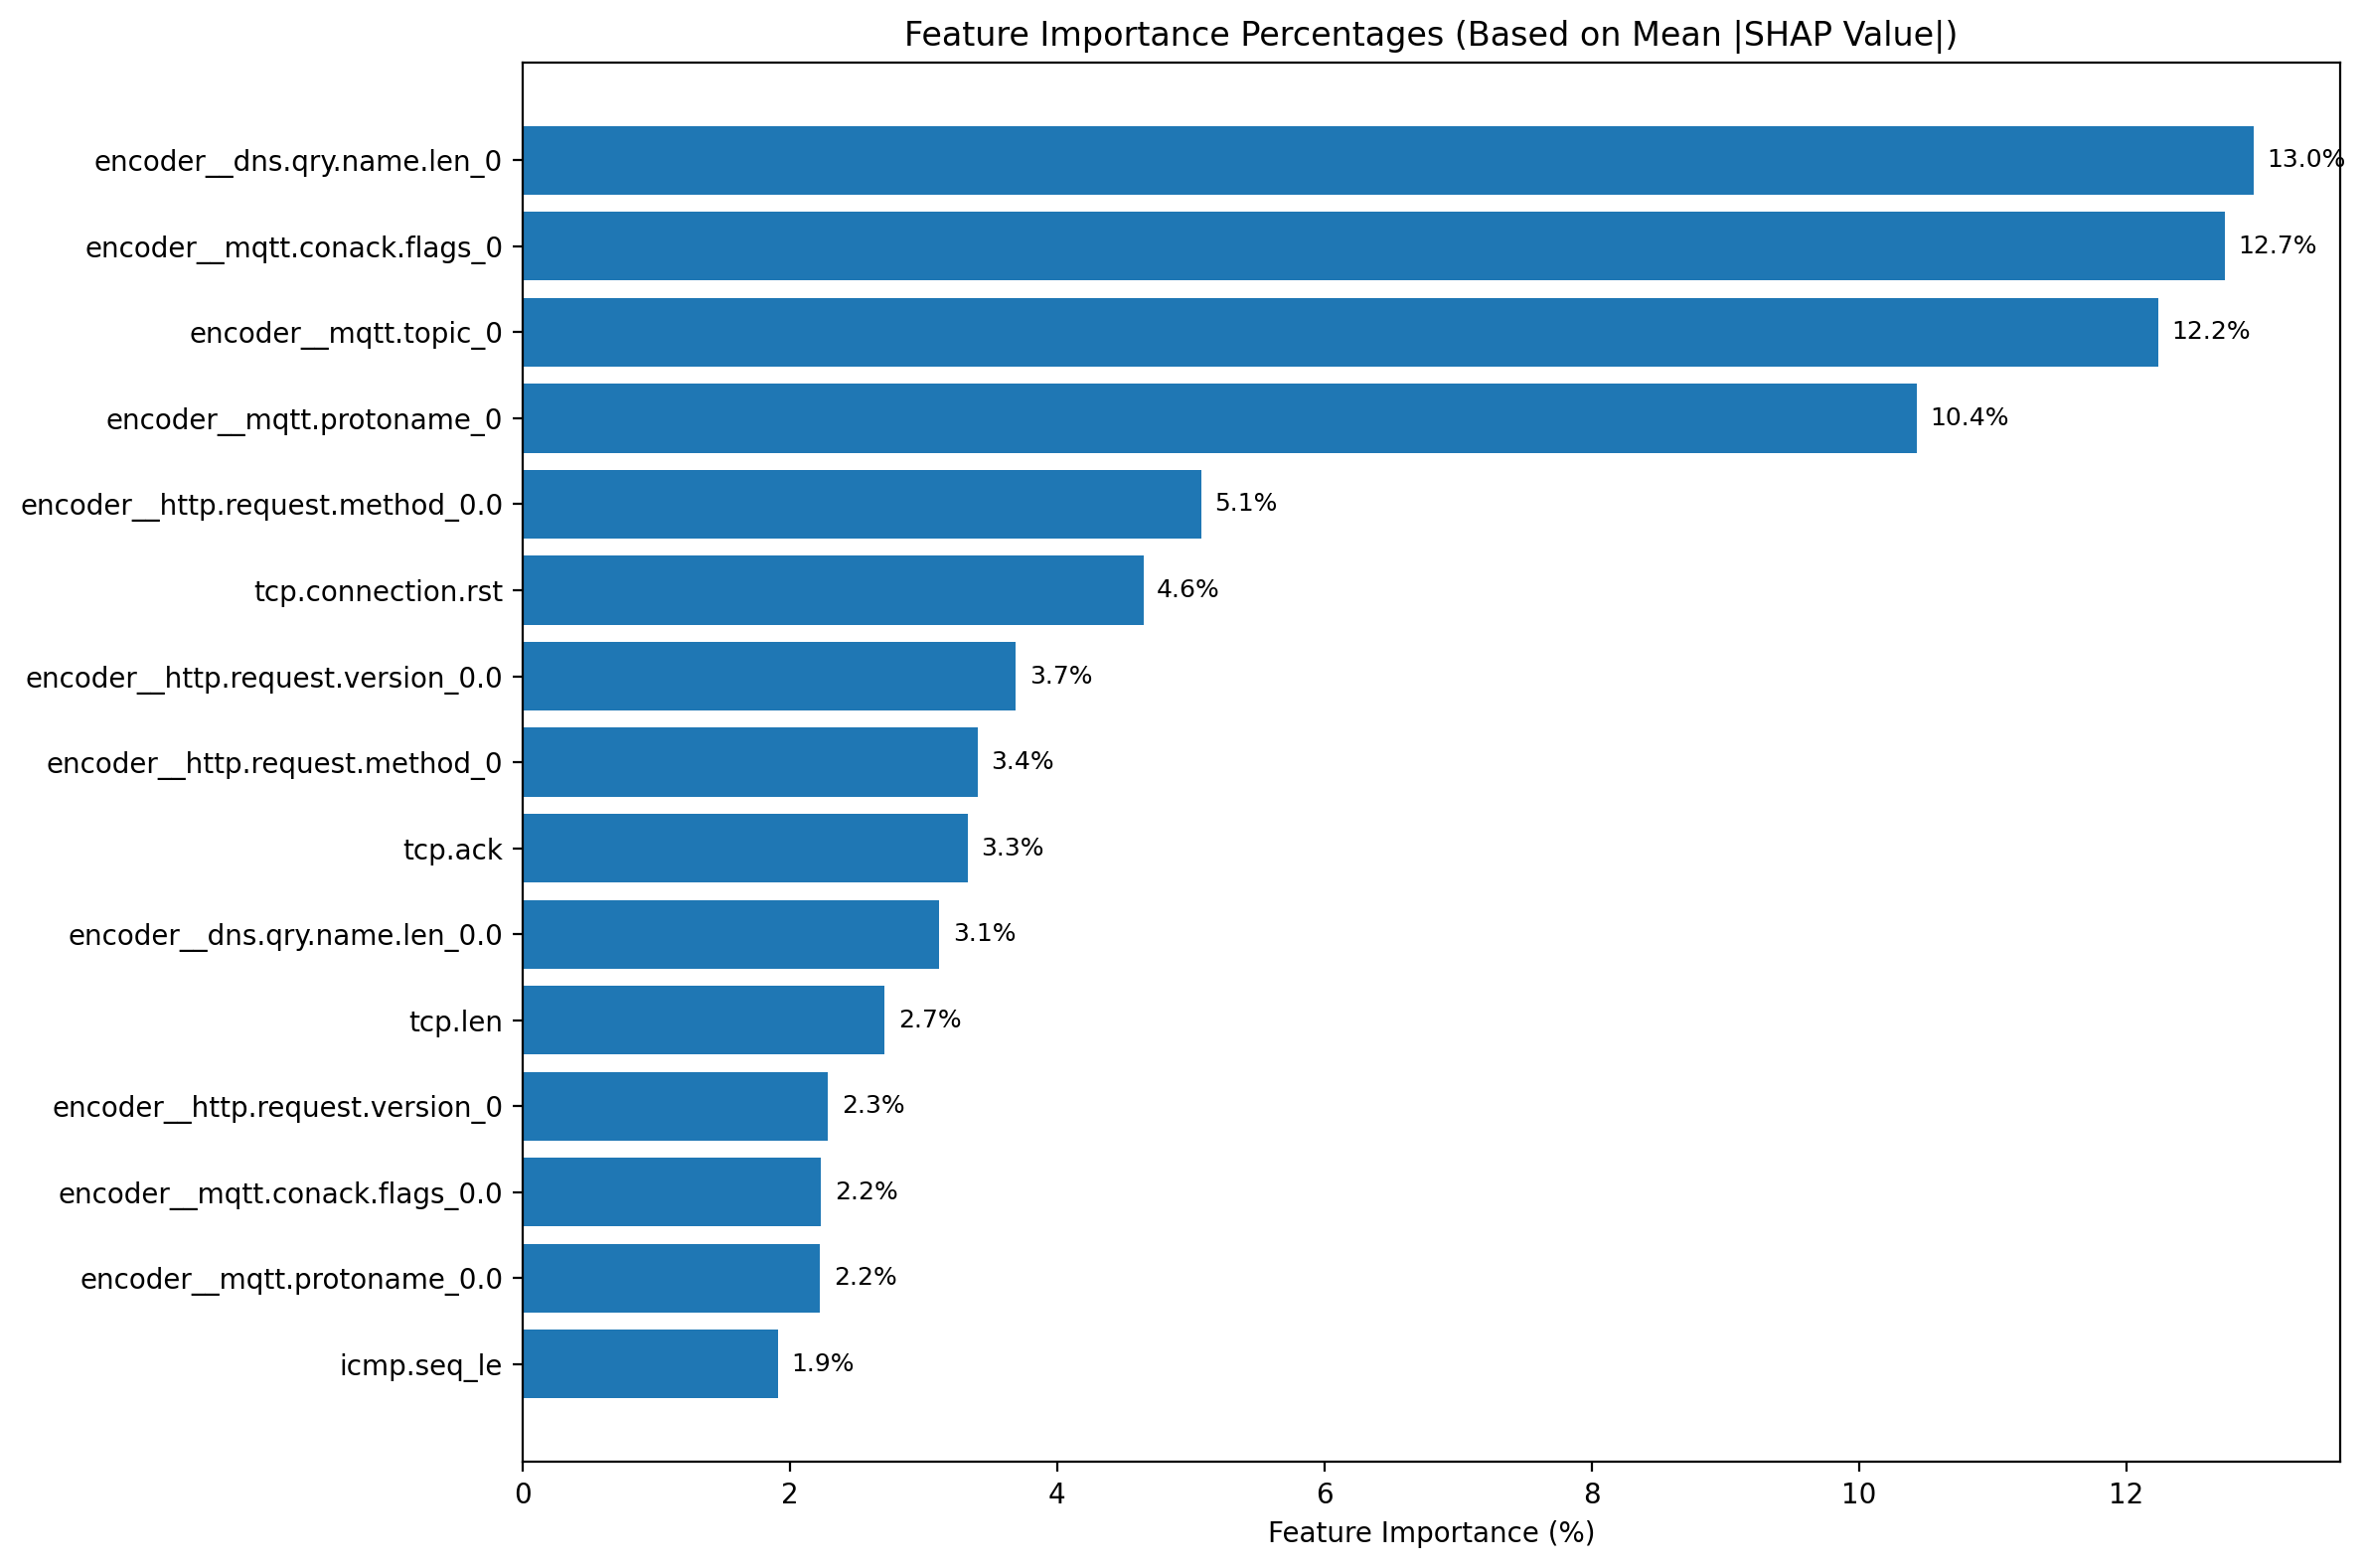

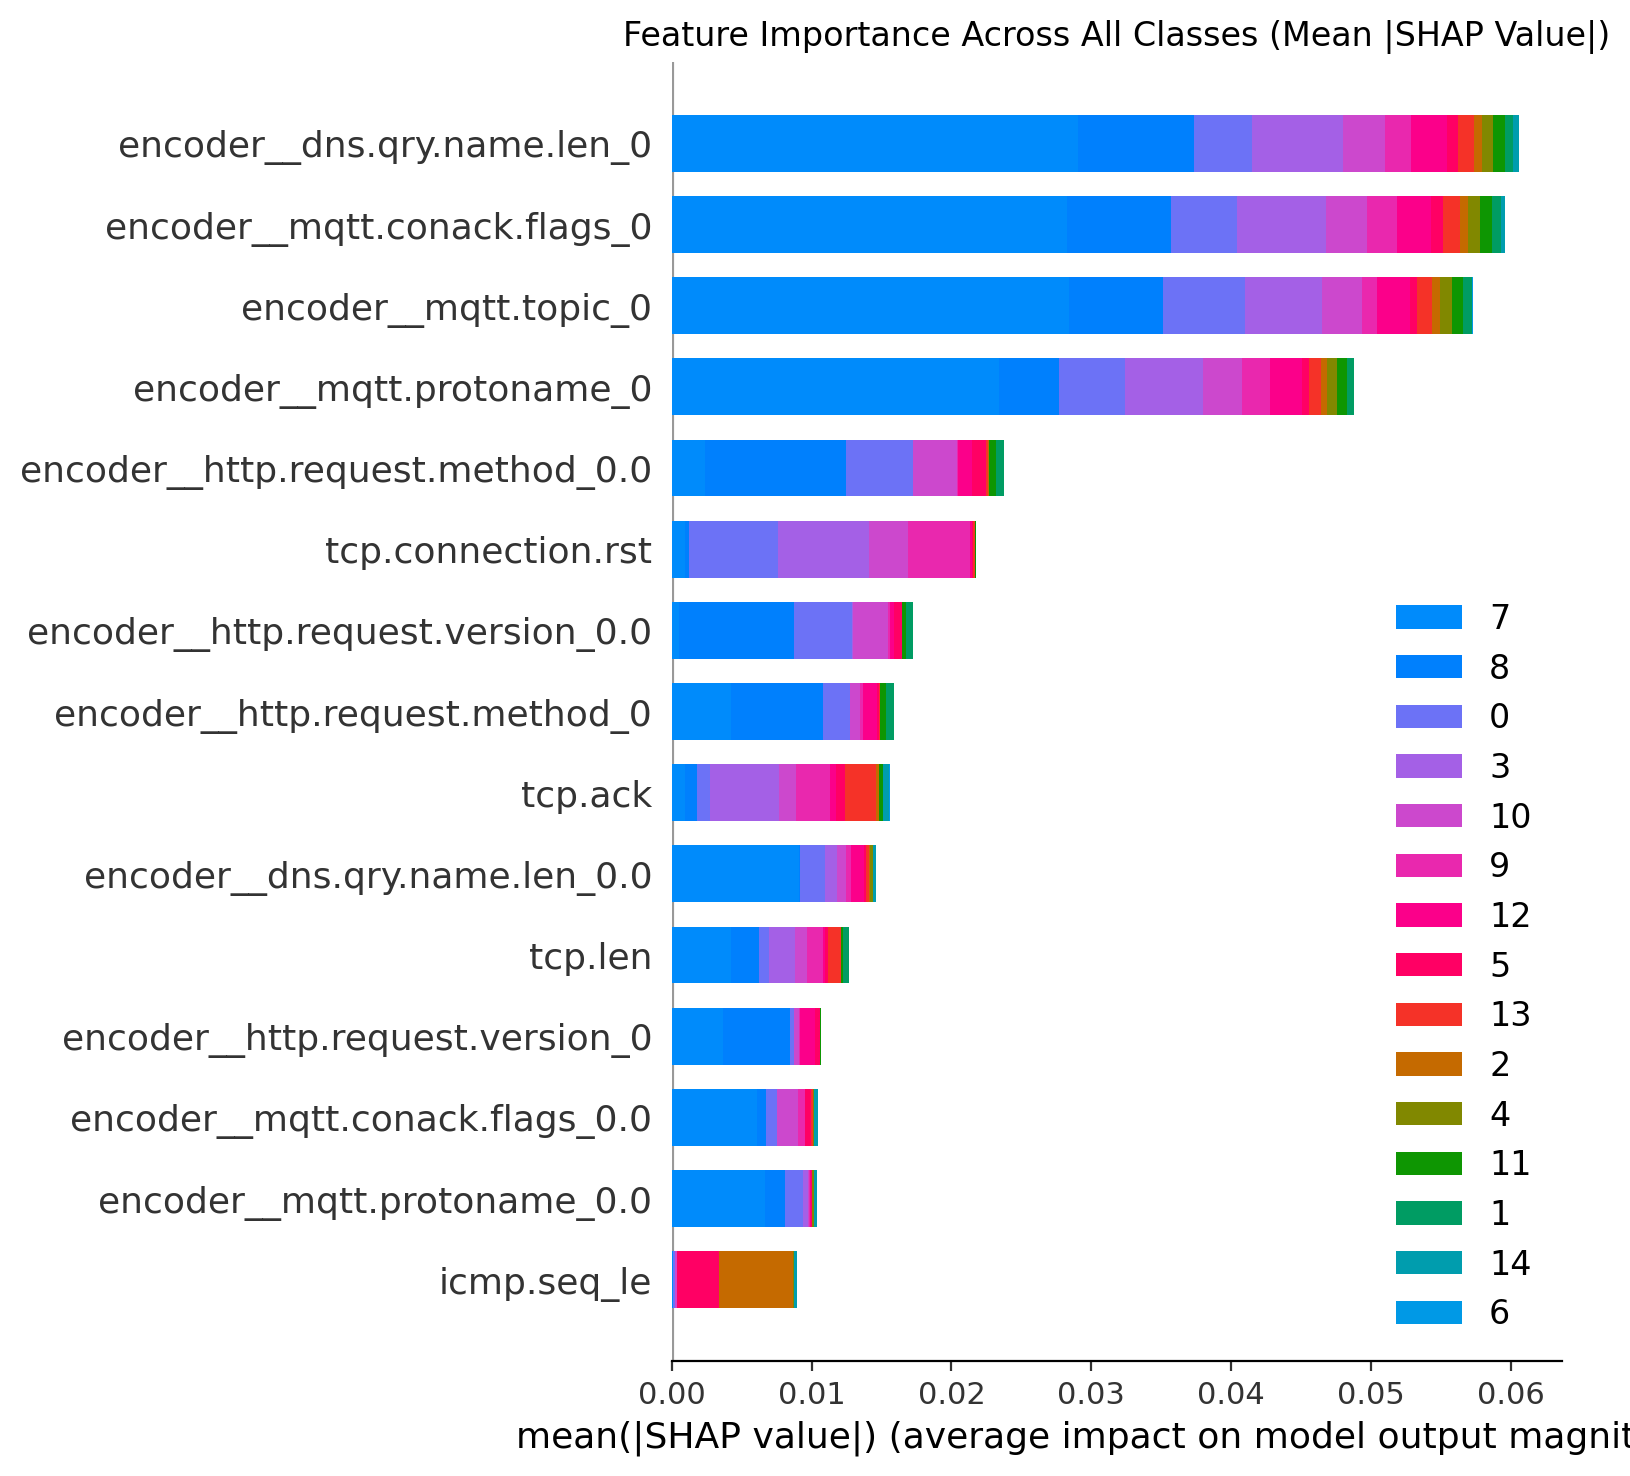


Summary:
Total features: 67
Top 5 features account for: 53.5% of total importance
Top 10 features account for: 71.6% of total importance
Bottom 5 features account for: 0.0% of total importance
Most important feature: encoder__dns.qry.name.len_0 (12.96%)
Least important feature: encoder__mqtt.conack.flags_- (0.00%)

================================ Client 3 Model Summary ================================

Generating SHAP explanations for the final local models...


100%|██████████| 100/100 [00:27<00:00,  3.69it/s]


SHAP values shape: (100, 67, 15)
X_explainer shape: (100, 67)
Number of classes: 15

2. Calculating feature importance percentages...
Mean absolute SHAP shape after processing: (67,)
Number of features: 67
Number of feature names: 67

Top 10 Features by Importance:
encoder__dns.qry.name.len_0   : 11.32%
encoder__mqtt.conack.flags_0  : 10.96%
encoder__mqtt.topic_0         : 10.40%
encoder__mqtt.protoname_0     : 9.59%
udp.stream                    : 7.48%
encoder__http.request.method_0.0: 6.07%
encoder__http.request.version_0.0: 4.70%
encoder__http.request.method_0: 4.19%
encoder__dns.qry.name.len_0.0 : 3.26%
encoder__http.referer_0       : 3.15%
encoder__http.referer_0.0     : 2.34%
tcp.ack_raw                   : 2.26%
tcp.seq                       : 2.20%
tcp.len                       : 2.08%
encoder__mqtt.protoname_0.0   : 2.08%

5 Least Important Features:
encoder__dns.qry.name.len_0.debian.pool.ntp.org: 0.00%
encoder__dns.qry.name.len_3.debian.pool.ntp.org: 0.00%
encoder__dns.qry.

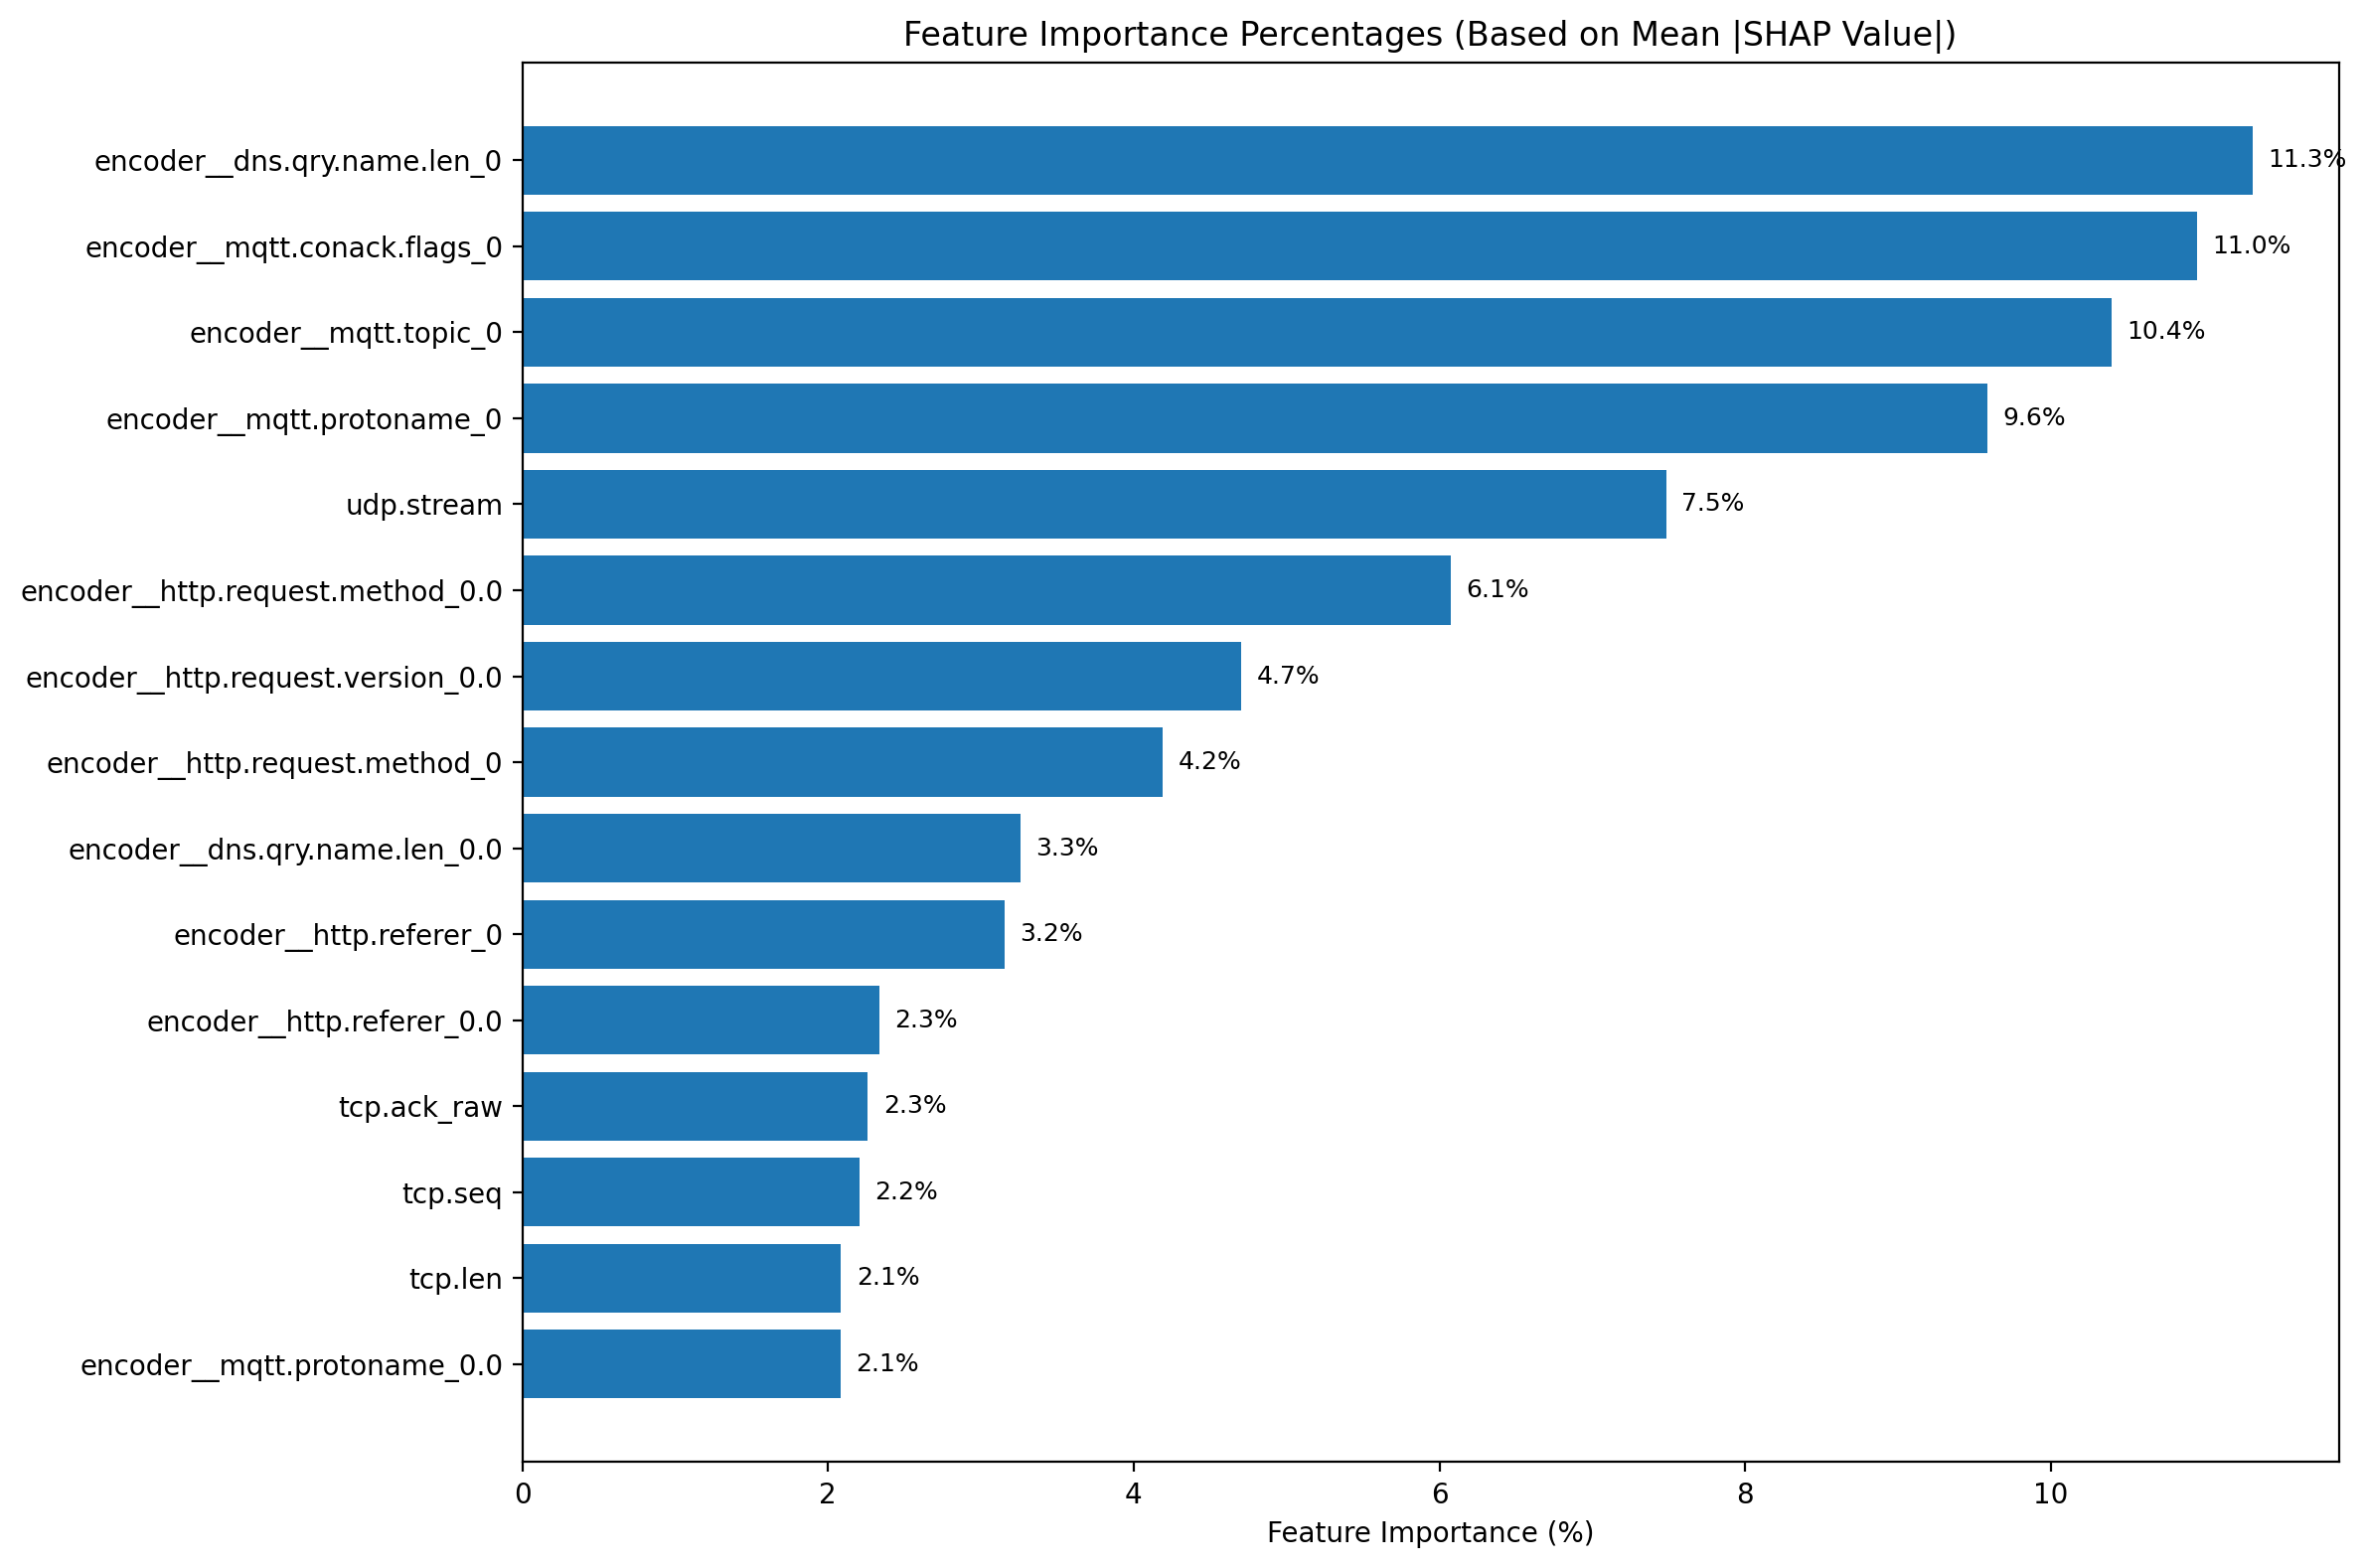

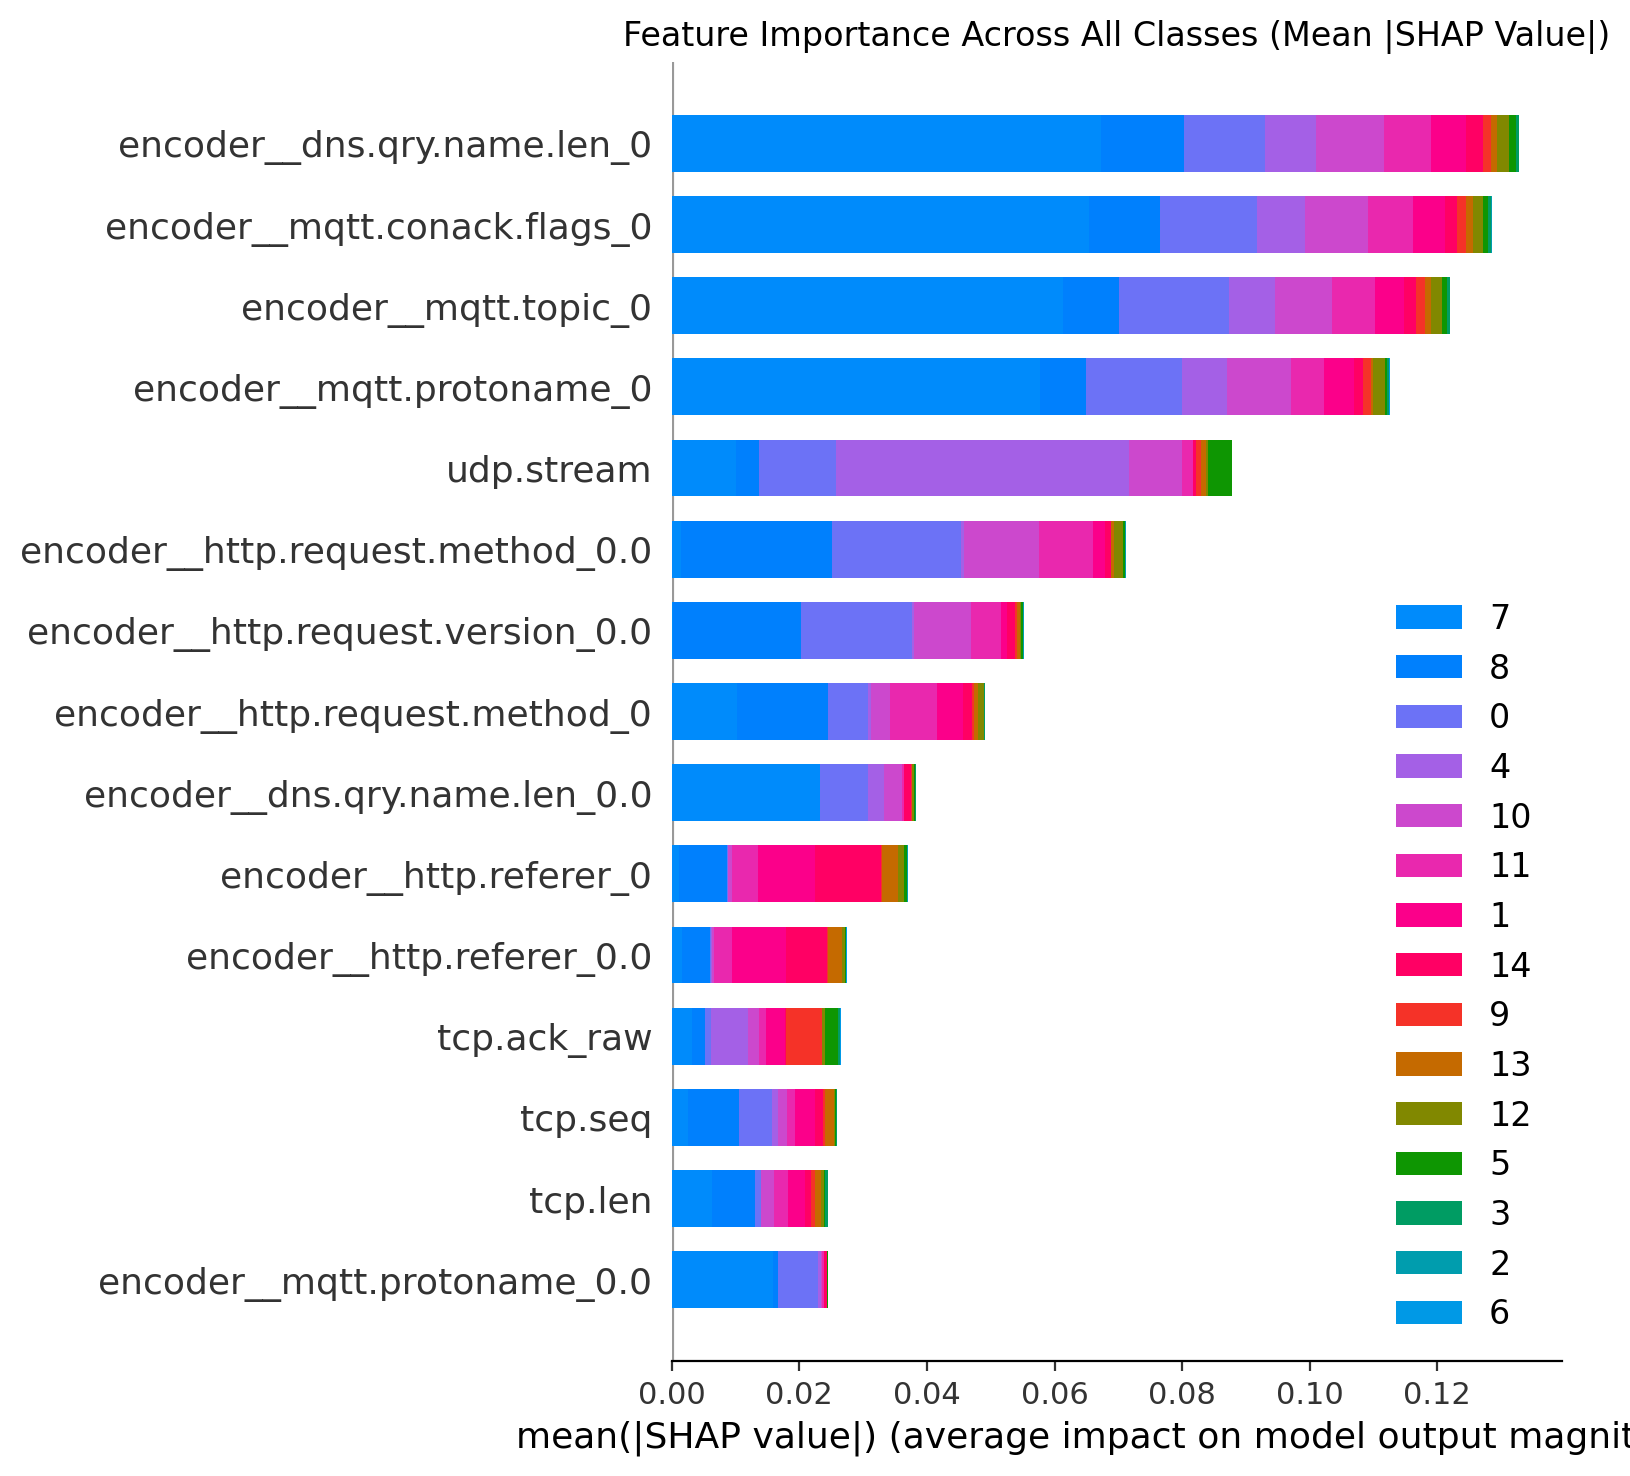


Summary:
Total features: 67
Top 5 features account for: 49.7% of total importance
Top 10 features account for: 71.1% of total importance
Bottom 5 features account for: 0.0% of total importance
Most important feature: encoder__dns.qry.name.len_0 (11.32%)
Least important feature: encoder__mqtt.conack.flags_- (0.00%)

================================ Client 4 Model Summary ================================

Generating SHAP explanations for the final local models...


100%|██████████| 100/100 [00:27<00:00,  3.65it/s]


SHAP values shape: (100, 67, 15)
X_explainer shape: (100, 67)
Number of classes: 15

2. Calculating feature importance percentages...
Mean absolute SHAP shape after processing: (67,)
Number of features: 67
Number of feature names: 67

Top 10 Features by Importance:
icmp.seq_le                   : 17.78%
tcp.ack                       : 11.19%
icmp.checksum                 : 7.44%
tcp.len                       : 5.39%
tcp.connection.rst            : 4.82%
encoder__http.referer_0       : 4.38%
udp.stream                    : 4.38%
encoder__mqtt.conack.flags_0  : 4.16%
encoder__dns.qry.name.len_0   : 3.85%
encoder__mqtt.topic_0         : 3.84%
encoder__http.referer_0.0     : 3.34%
encoder__http.request.method_0.0: 3.34%
encoder__mqtt.protoname_0     : 2.98%
encoder__http.request.method_0: 2.70%
tcp.connection.syn            : 2.63%

5 Least Important Features:
encoder__dns.qry.name.len_0.debian.pool.ntp.org: 0.00%
encoder__dns.qry.name.len_3.debian.pool.ntp.org: 0.00%
encoder__dns.qry.name

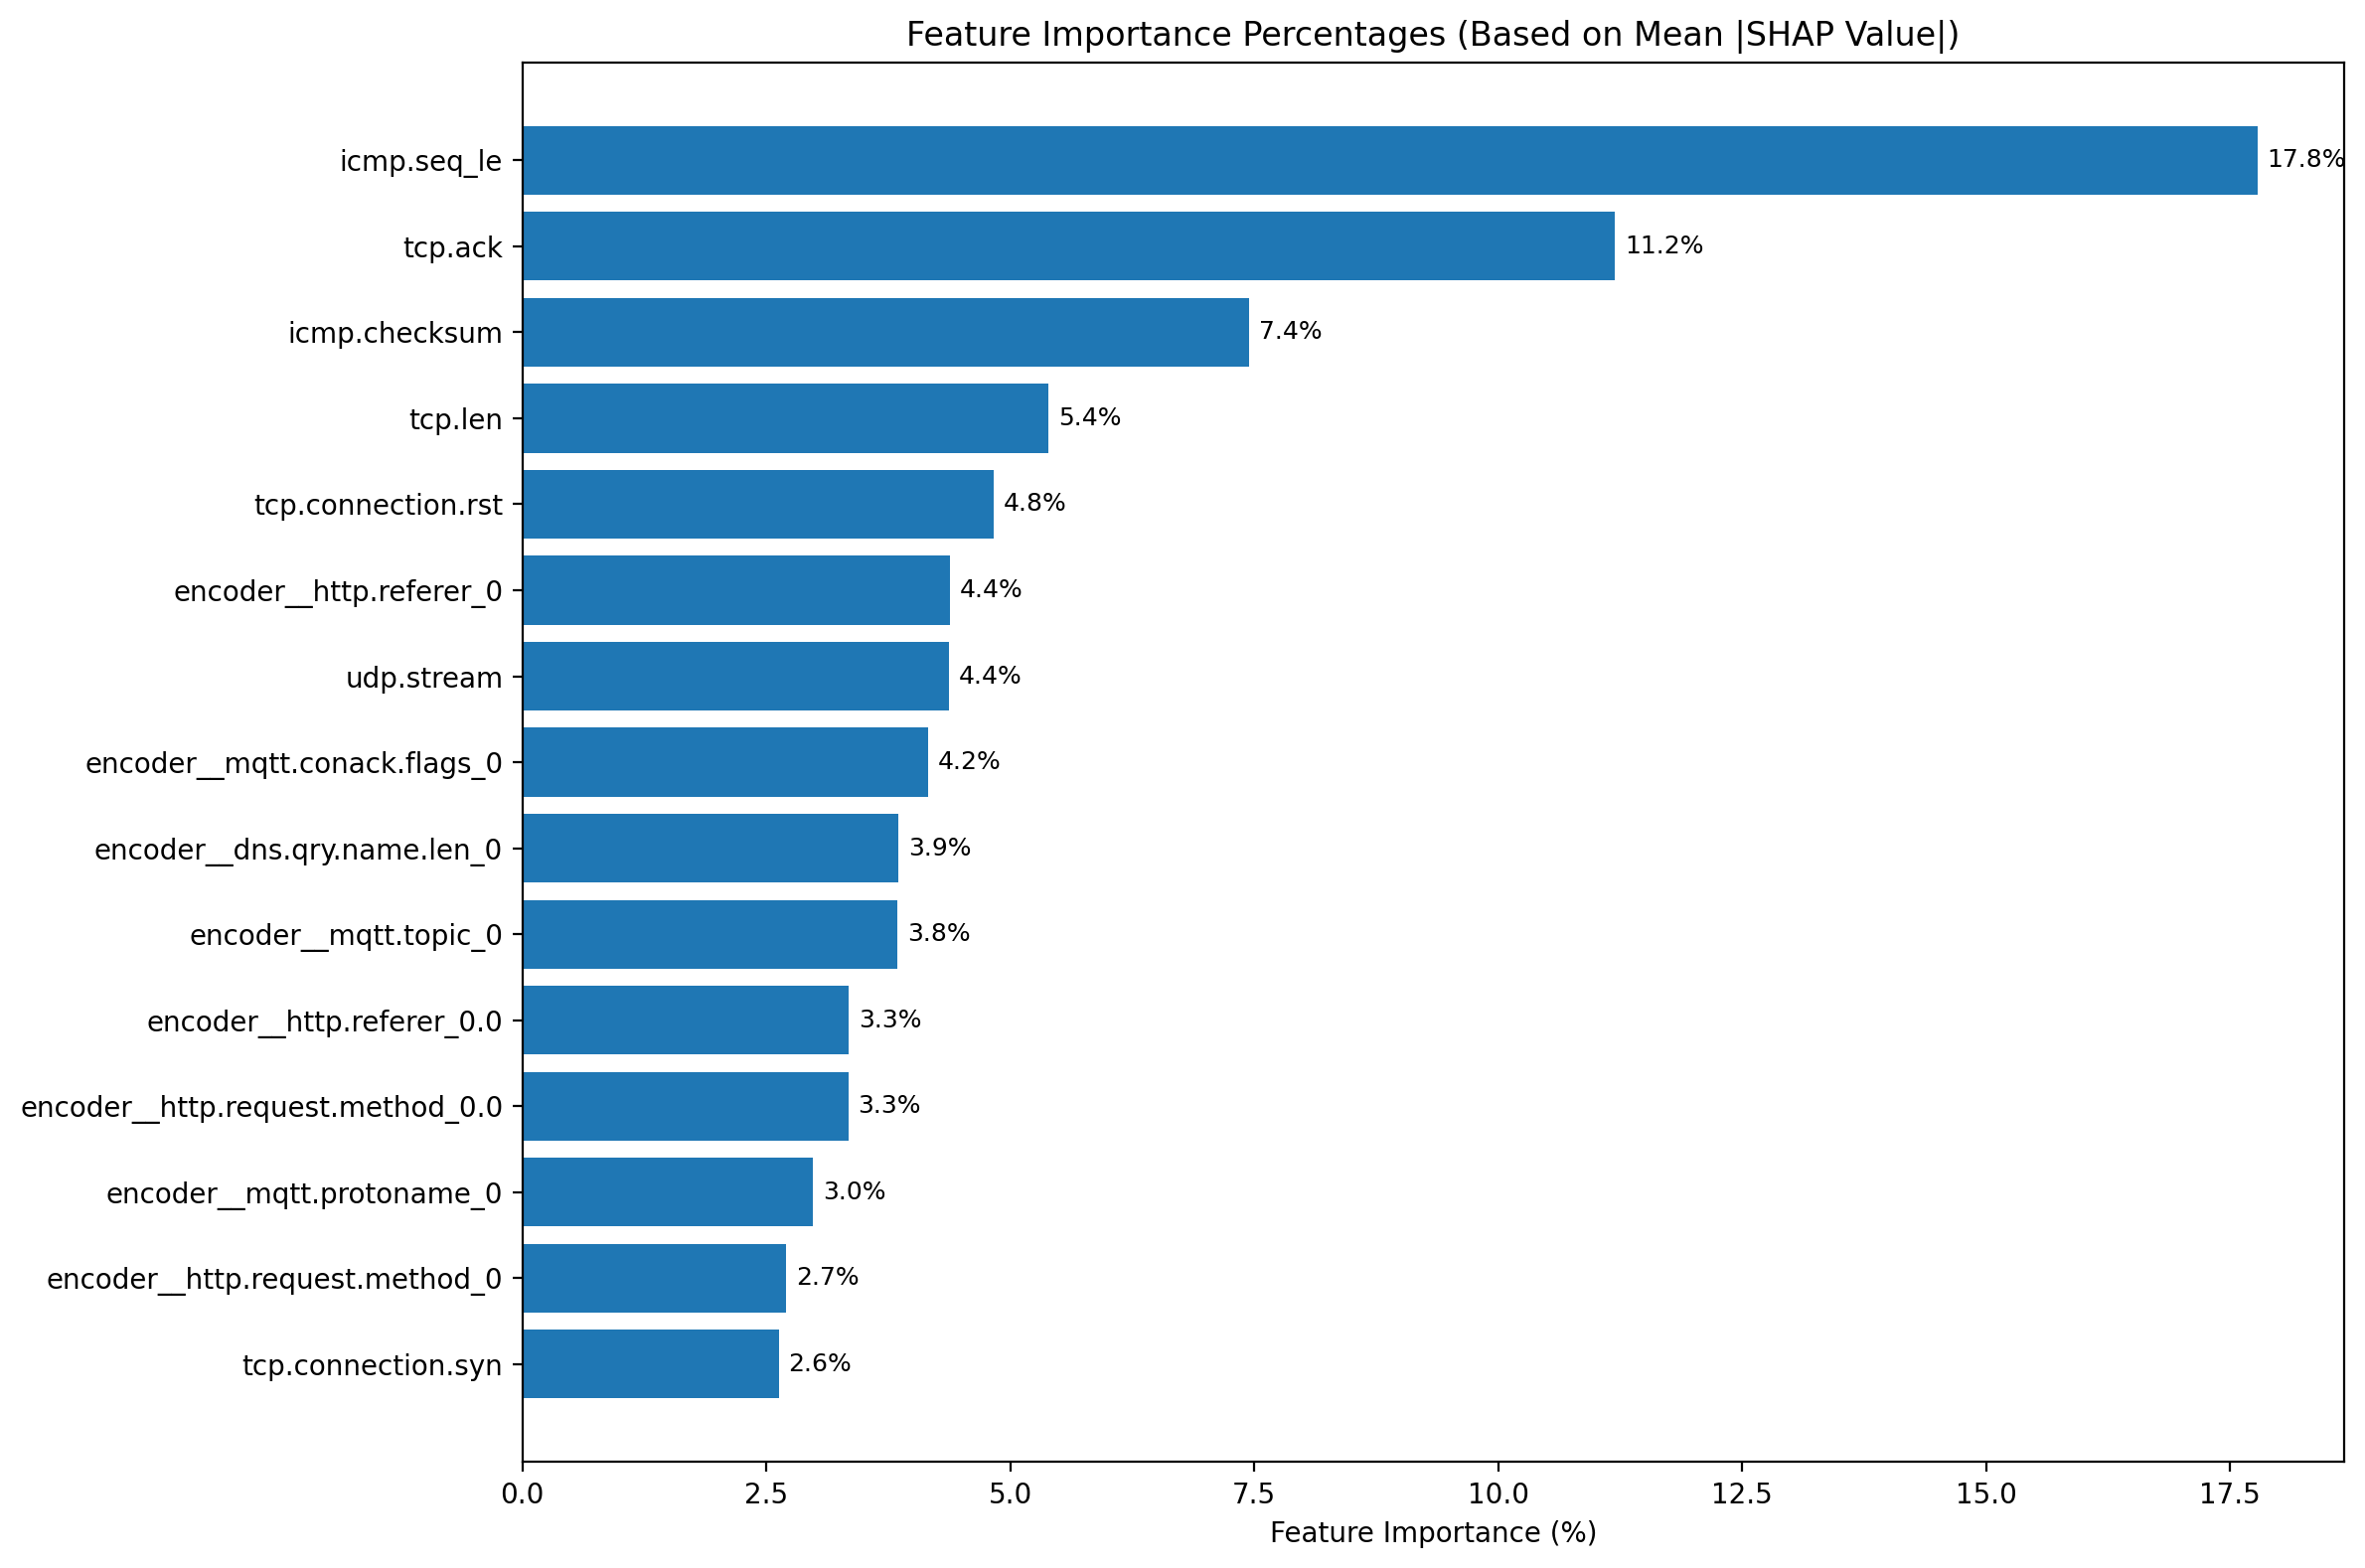

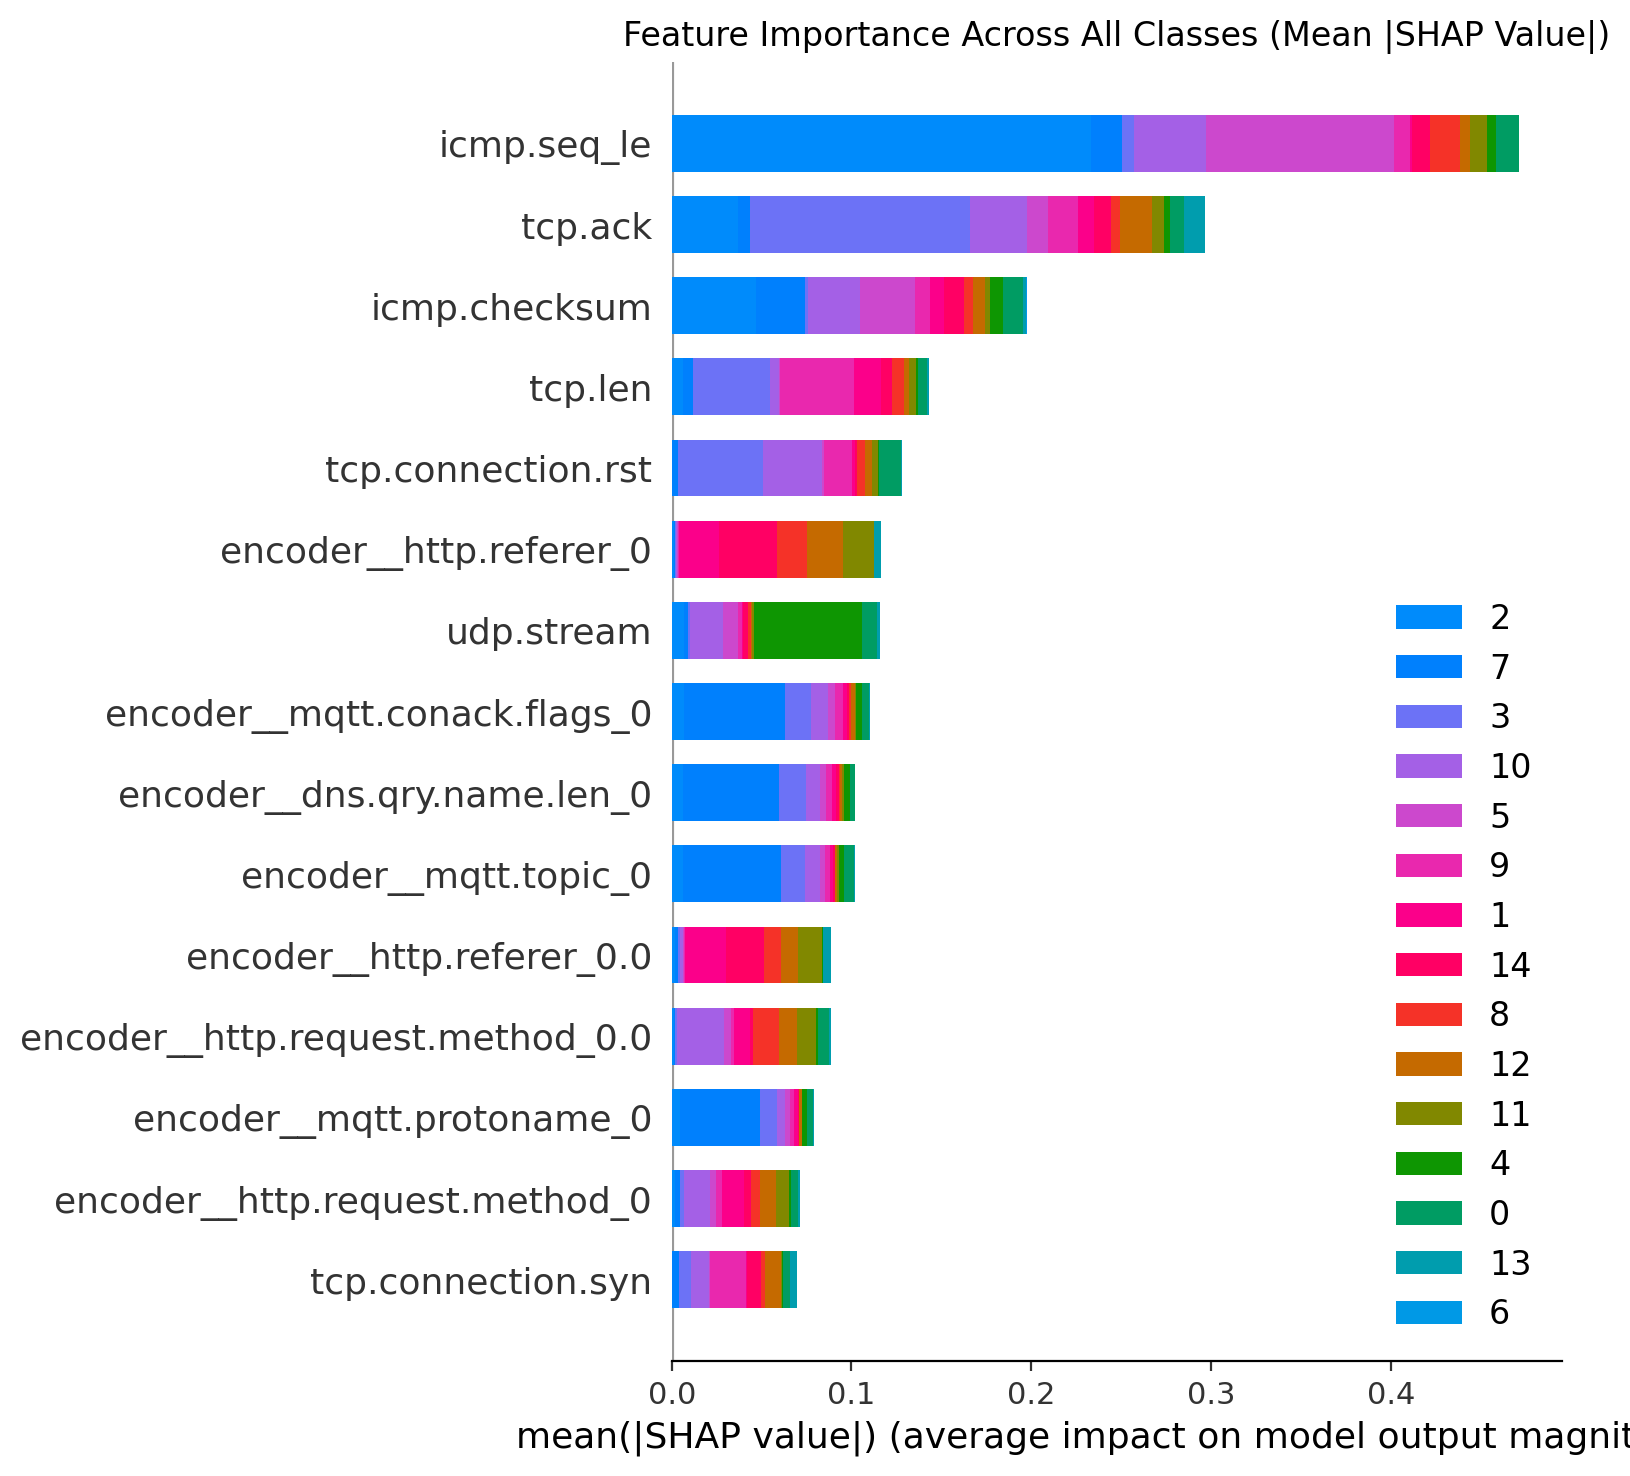


Summary:
Total features: 67
Top 5 features account for: 46.6% of total importance
Top 10 features account for: 67.2% of total importance
Bottom 5 features account for: 0.0% of total importance
Most important feature: icmp.seq_le (17.78%)
Least important feature: encoder__mqtt.conack.flags_- (0.00%)

================================ Client 5 Model Summary ================================

Generating SHAP explanations for the final local models...


100%|██████████| 100/100 [00:27<00:00,  3.70it/s]


SHAP values shape: (100, 67, 15)
X_explainer shape: (100, 67)
Number of classes: 15

2. Calculating feature importance percentages...
Mean absolute SHAP shape after processing: (67,)
Number of features: 67
Number of feature names: 67

Top 10 Features by Importance:
udp.stream                    : 11.33%
icmp.seq_le                   : 10.87%
encoder__http.referer_0       : 9.07%
encoder__http.referer_0.0     : 8.78%
tcp.ack                       : 5.24%
encoder__http.request.method_0.0: 4.97%
encoder__http.request.method_0: 4.66%
tcp.len                       : 4.60%
tcp.connection.rst            : 3.85%
icmp.checksum                 : 3.48%
tcp.ack_raw                   : 3.44%
encoder__http.request.version_0.0: 3.43%
tcp.flags                     : 2.59%
tcp.seq                       : 2.53%
encoder__http.request.version_0: 2.29%

5 Least Important Features:
encoder__dns.qry.name.len_0.debian.pool.ntp.org: 0.00%
encoder__dns.qry.name.len_3.debian.pool.ntp.org: 0.00%
encoder__dns.qry.

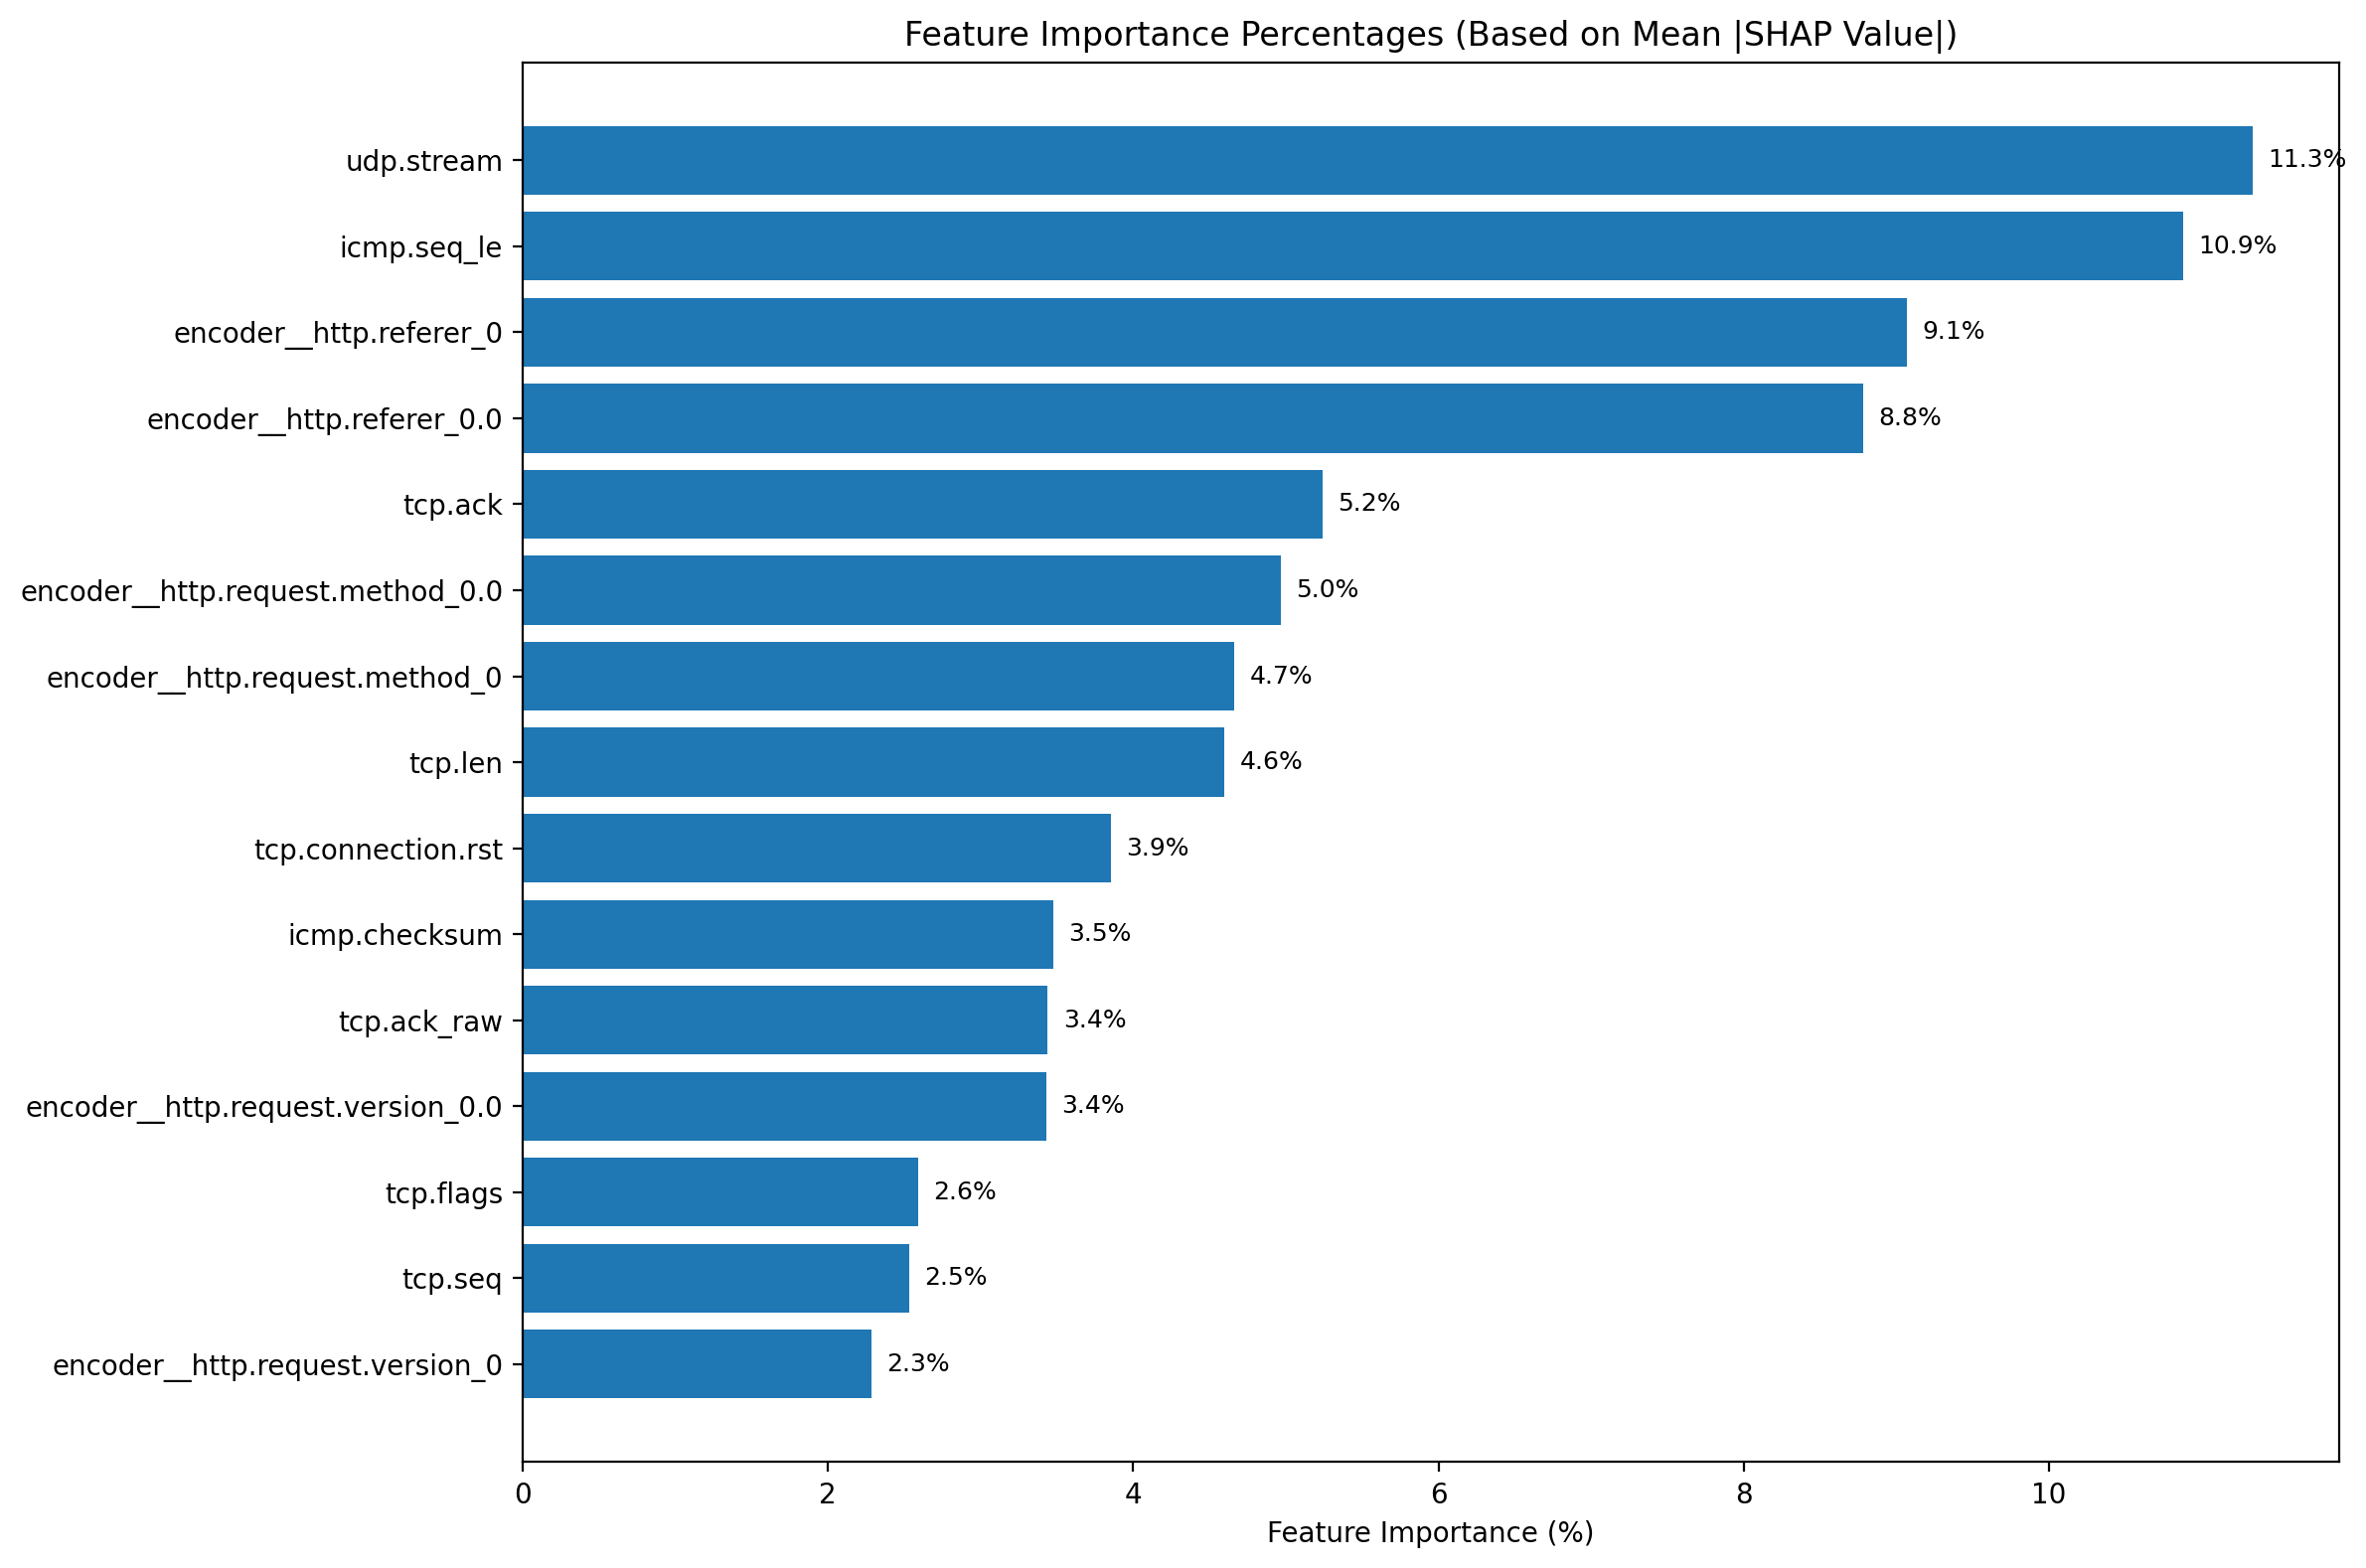

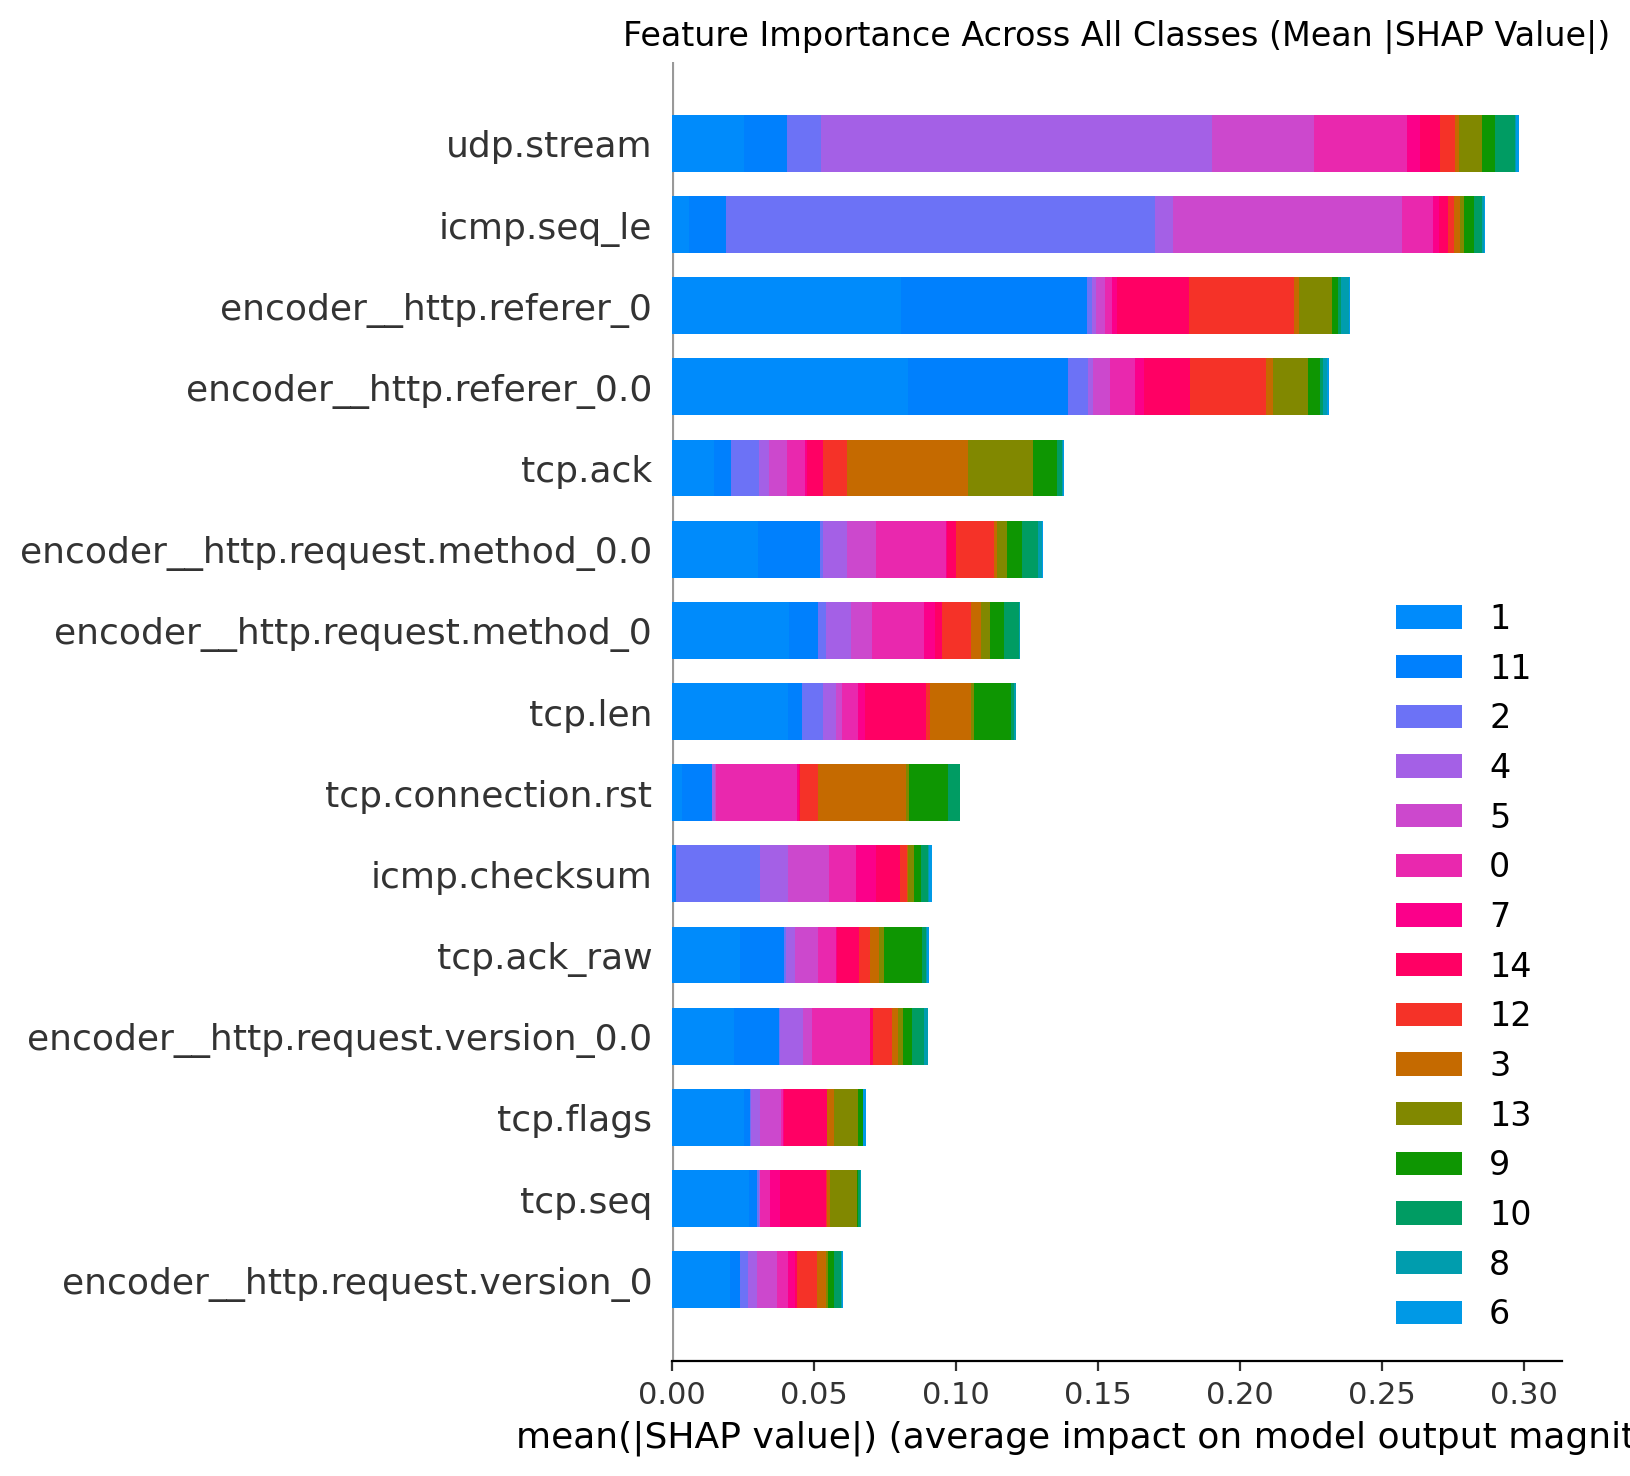


Summary:
Total features: 67
Top 5 features account for: 45.3% of total importance
Top 10 features account for: 66.9% of total importance
Bottom 5 features account for: 0.0% of total importance
Most important feature: udp.stream (11.33%)
Least important feature: encoder__mqtt.conack.flags_- (0.00%)

================================ Client 6 Model Summary ================================

Generating SHAP explanations for the final local models...


100%|██████████| 100/100 [00:29<00:00,  3.42it/s]


SHAP values shape: (100, 67, 15)
X_explainer shape: (100, 67)
Number of classes: 15

2. Calculating feature importance percentages...
Mean absolute SHAP shape after processing: (67,)
Number of features: 67
Number of feature names: 67

Top 10 Features by Importance:
encoder__mqtt.conack.flags_0  : 10.61%
encoder__mqtt.topic_0         : 10.58%
encoder__dns.qry.name.len_0   : 10.54%
encoder__mqtt.protoname_0     : 8.83%
tcp.connection.rst            : 6.81%
icmp.seq_le                   : 6.56%
tcp.ack                       : 5.02%
encoder__http.request.method_0.0: 3.75%
icmp.checksum                 : 3.51%
encoder__dns.qry.name.len_0.0 : 2.87%
encoder__http.request.method_0: 2.75%
encoder__http.request.version_0.0: 2.63%
tcp.len                       : 2.59%
udp.stream                    : 2.18%
tcp.seq                       : 2.14%

5 Least Important Features:
encoder__http.request.method_-: 0.00%
encoder__dns.qry.name.len_3.debian.pool.ntp.org: 0.00%
encoder__dns.qry.name.len_2.debian

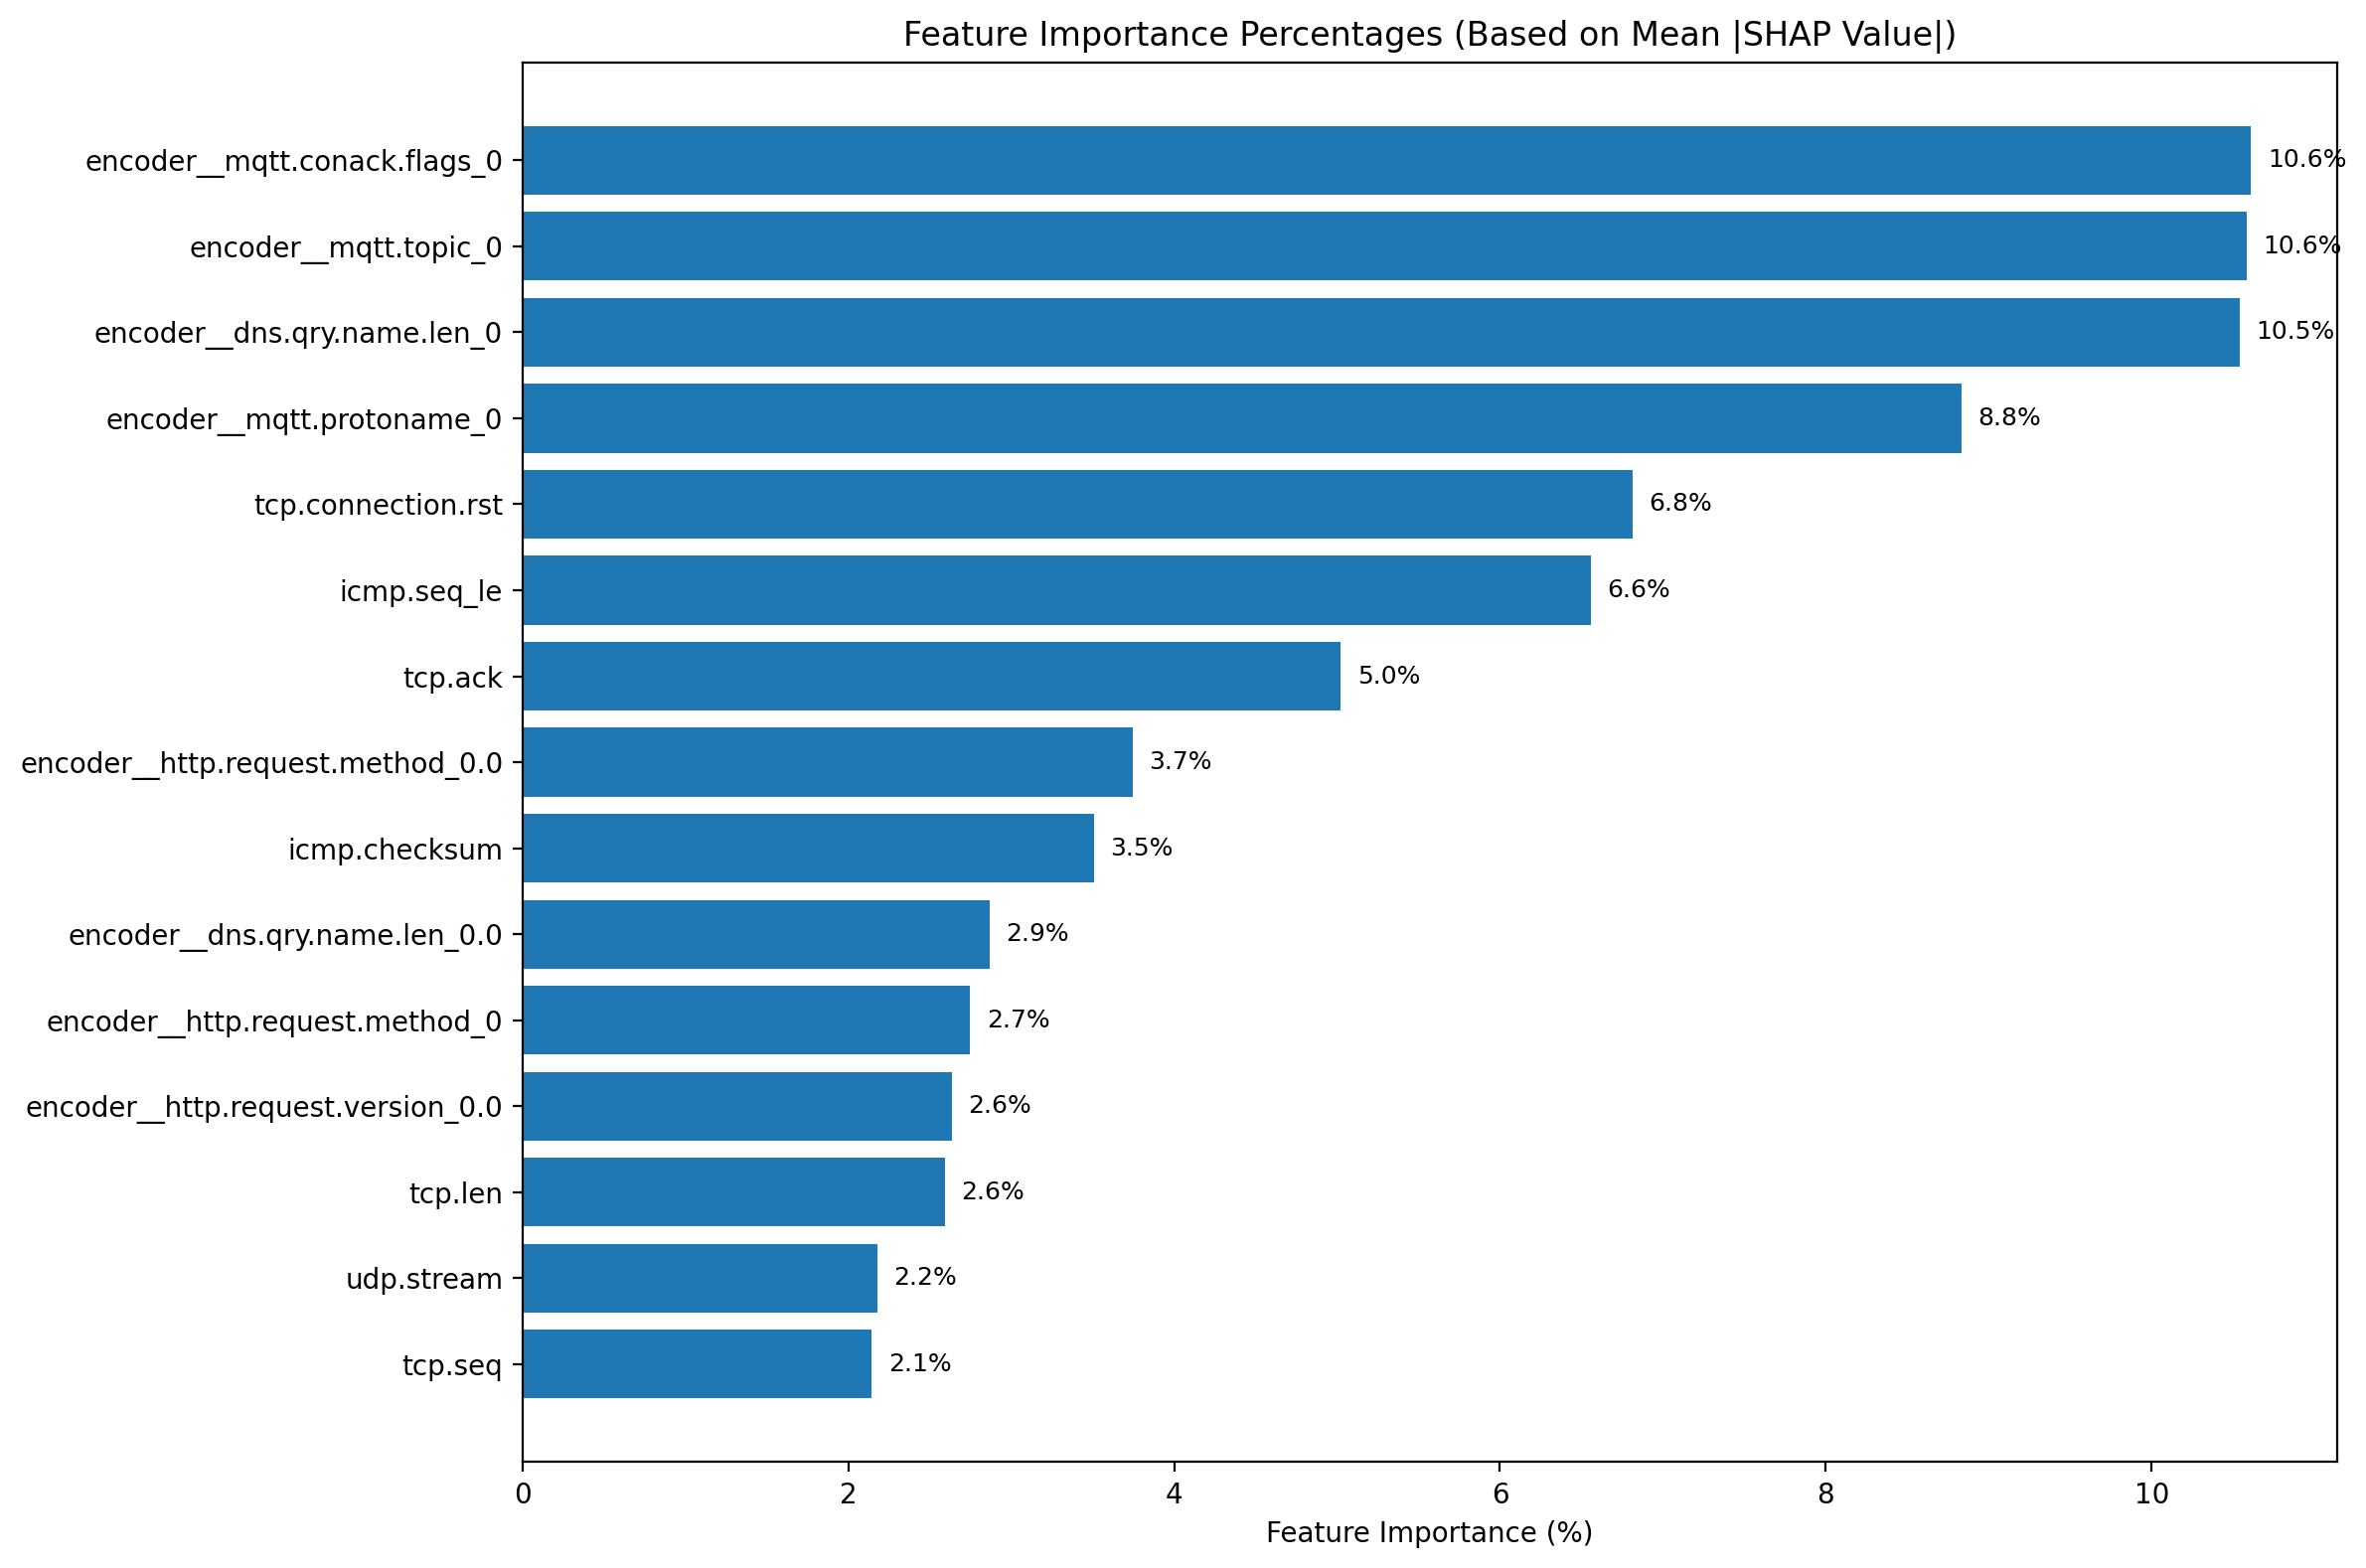

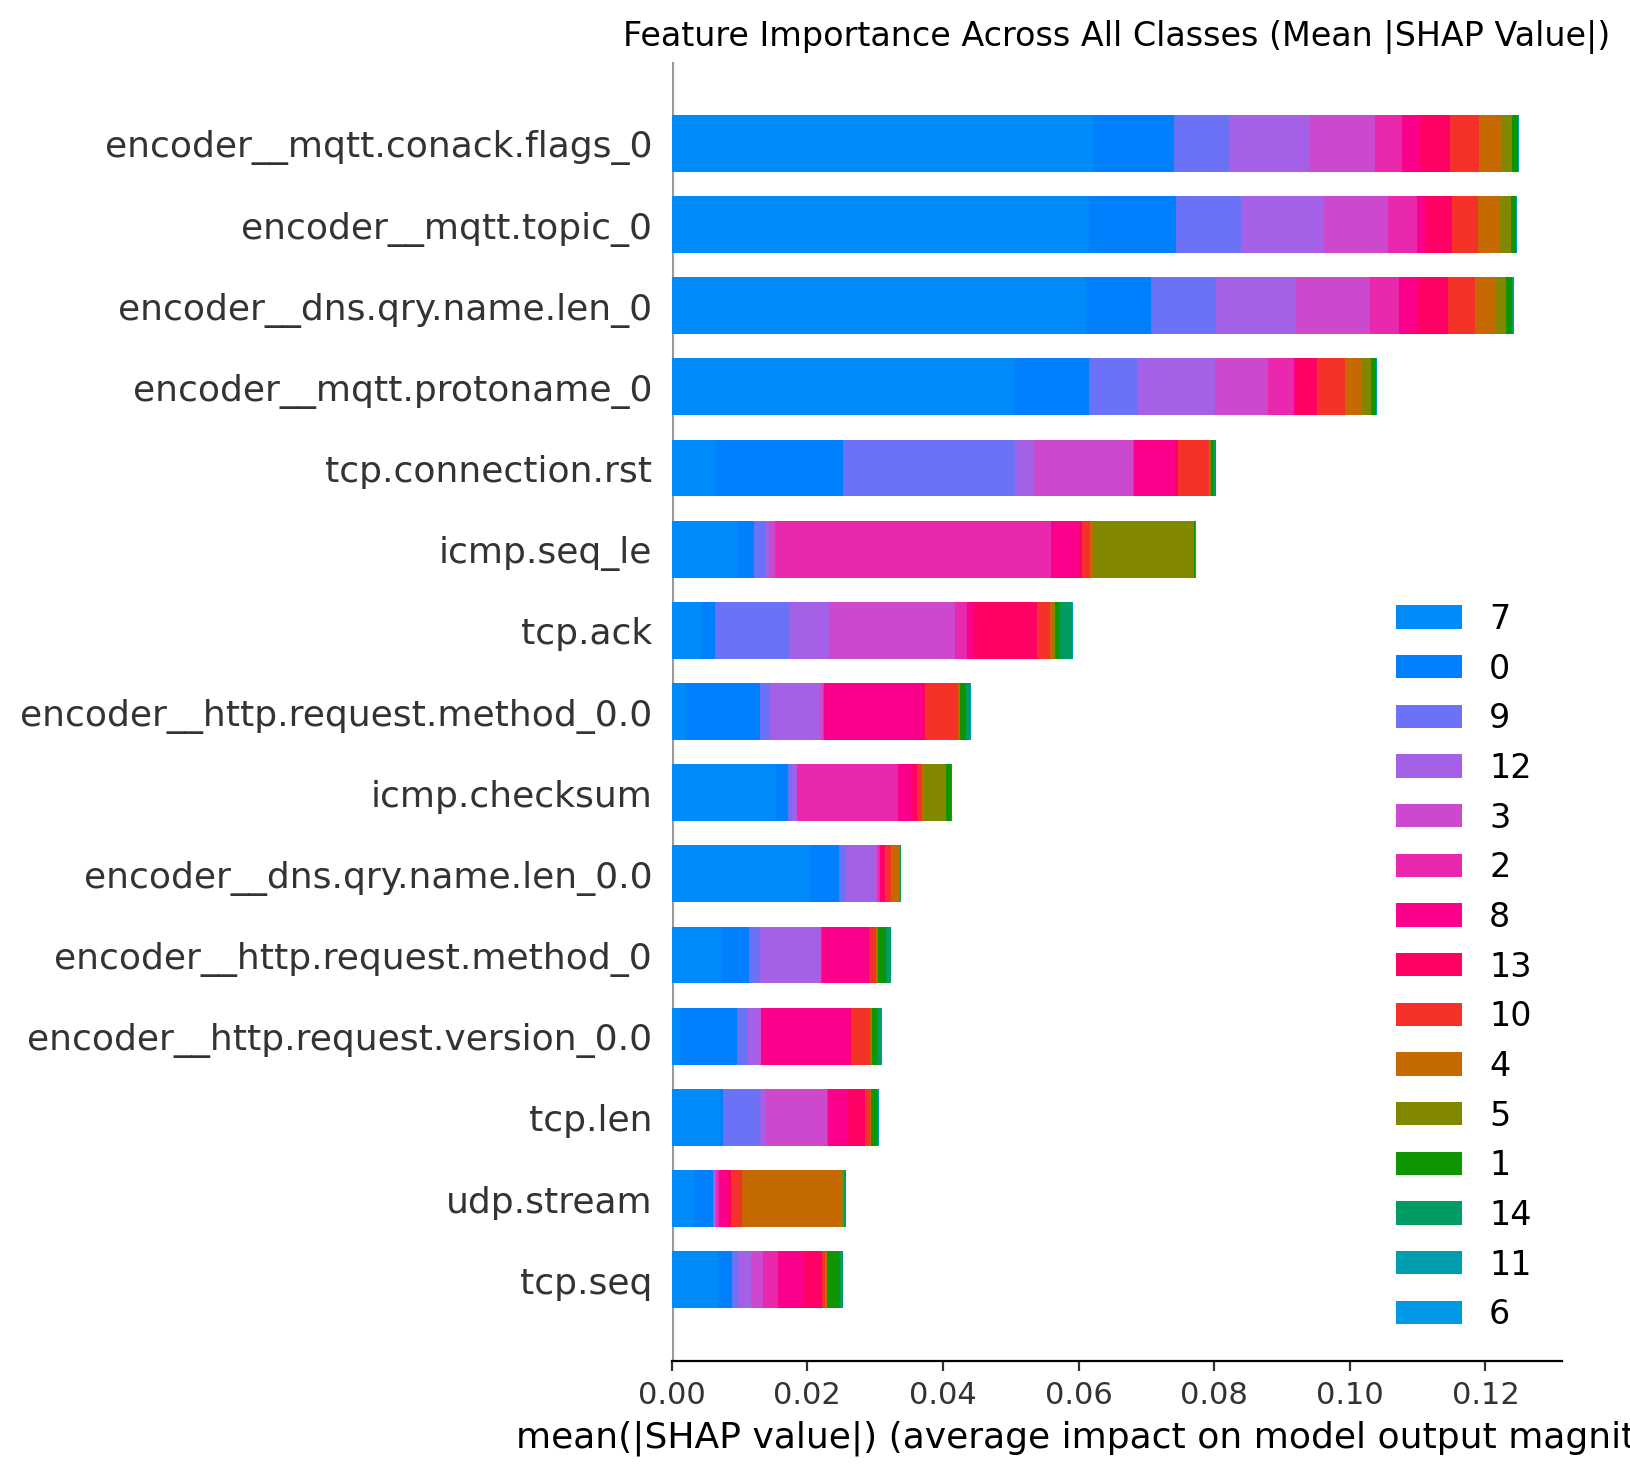


Summary:
Total features: 67
Top 5 features account for: 47.4% of total importance
Top 10 features account for: 69.1% of total importance
Bottom 5 features account for: 0.0% of total importance
Most important feature: encoder__mqtt.conack.flags_0 (10.61%)
Least important feature: encoder__mqtt.conack.flags_- (0.00%)

================================ Client 7 Model Summary ================================

Generating SHAP explanations for the final local models...


100%|██████████| 100/100 [00:28<00:00,  3.45it/s]


SHAP values shape: (100, 67, 15)
X_explainer shape: (100, 67)
Number of classes: 15

2. Calculating feature importance percentages...
Mean absolute SHAP shape after processing: (67,)
Number of features: 67
Number of feature names: 67

Top 10 Features by Importance:
udp.stream                    : 20.40%
encoder__dns.qry.name.len_0   : 9.22%
encoder__mqtt.topic_0         : 9.20%
encoder__mqtt.conack.flags_0  : 9.12%
encoder__mqtt.protoname_0     : 7.52%
encoder__http.request.method_0.0: 3.31%
tcp.ack                       : 3.06%
tcp.ack_raw                   : 2.80%
encoder__dns.qry.name.len_0.0 : 2.53%
tcp.len                       : 2.38%
encoder__http.referer_0       : 2.35%
encoder__http.request.version_0.0: 2.32%
icmp.seq_le                   : 2.21%
dns.qry.name                  : 2.14%
encoder__http.request.method_0: 2.05%

5 Least Important Features:
encoder__dns.qry.name.len_0.debian.pool.ntp.org: 0.00%
encoder__dns.qry.name.len_3.debian.pool.ntp.org: 0.00%
encoder__dns.qry.na

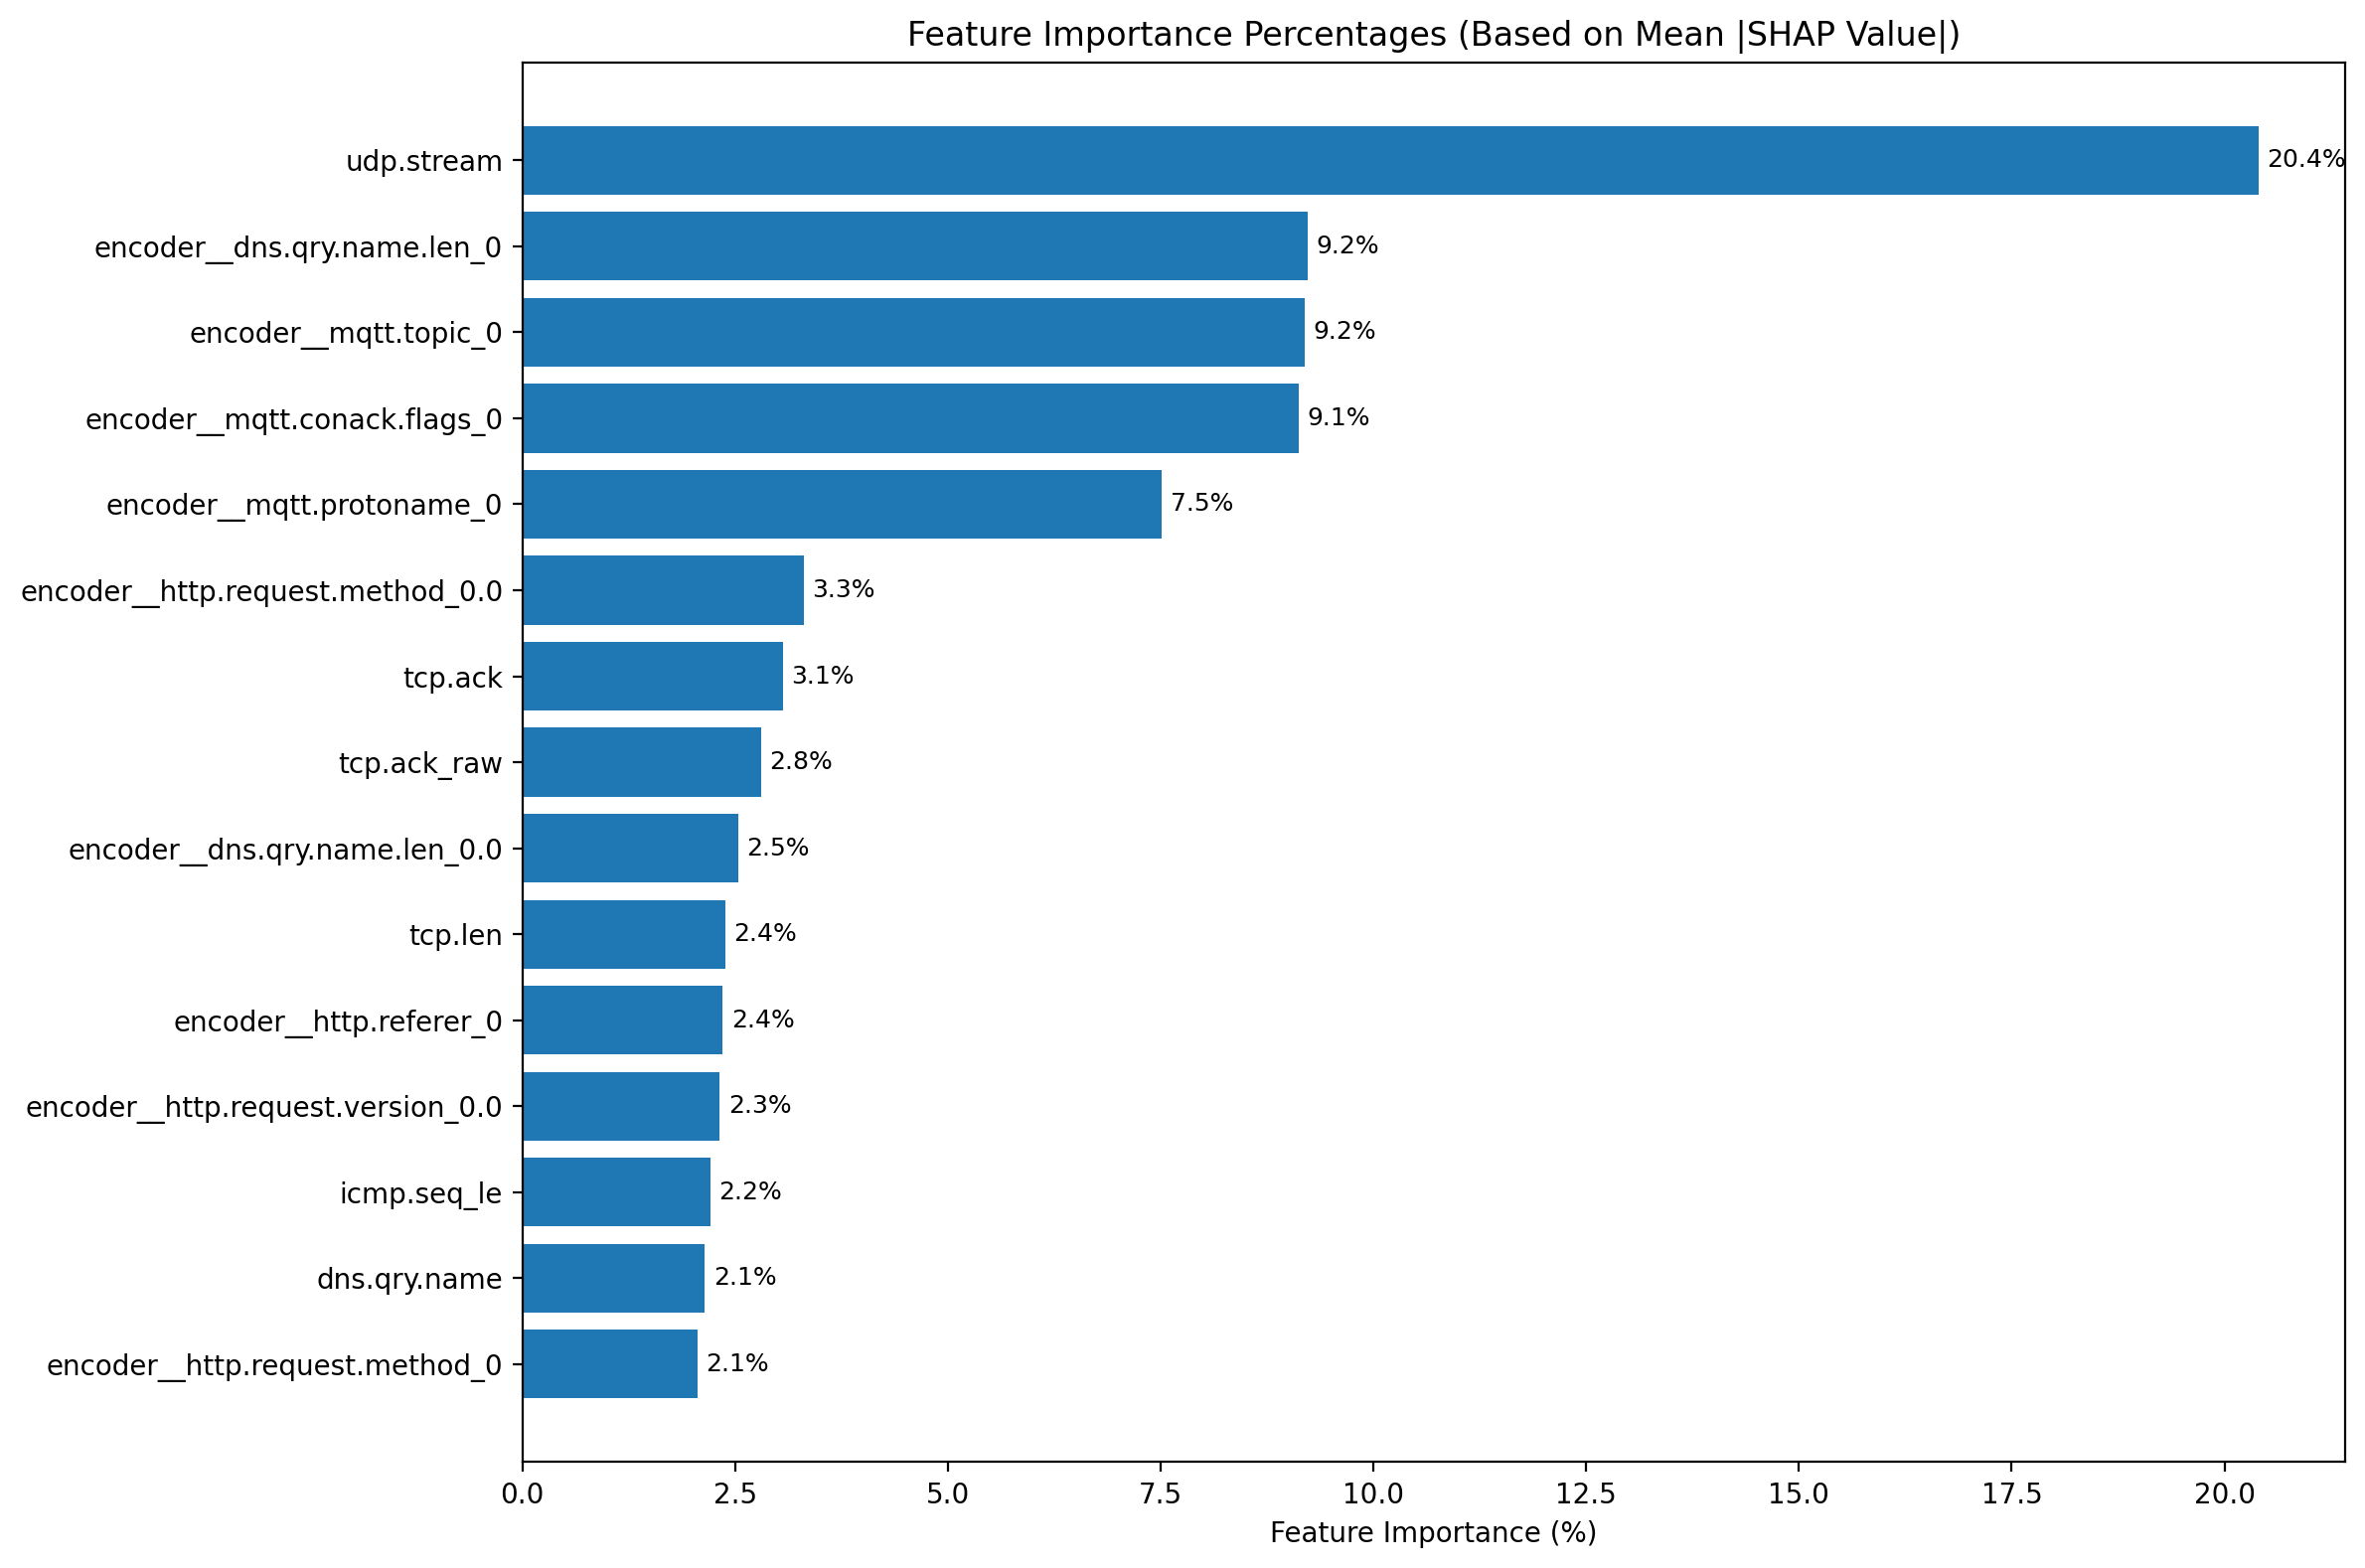

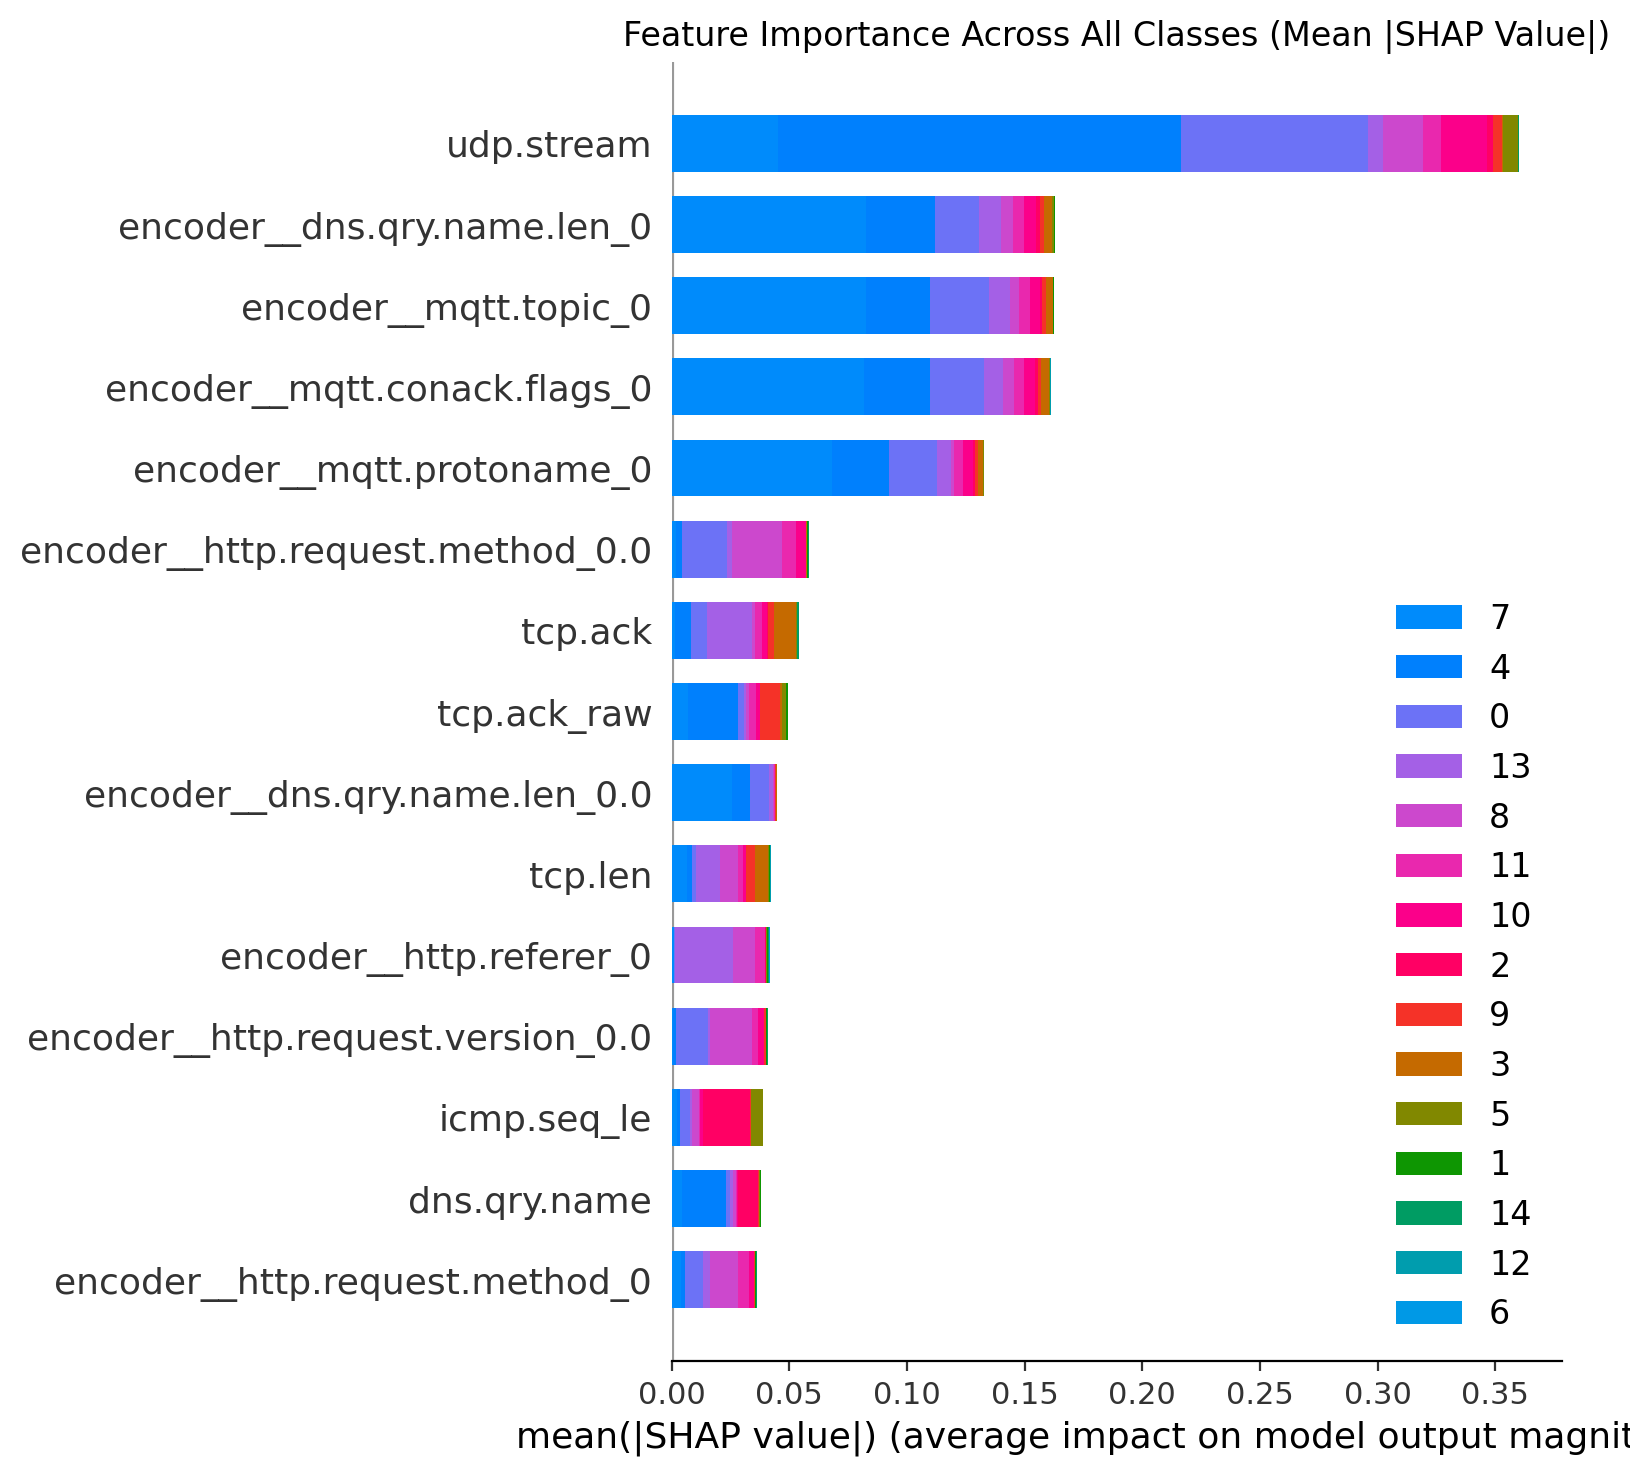


Summary:
Total features: 67
Top 5 features account for: 55.5% of total importance
Top 10 features account for: 69.5% of total importance
Bottom 5 features account for: 0.0% of total importance
Most important feature: udp.stream (20.40%)
Least important feature: encoder__mqtt.conack.flags_- (0.00%)

================================ Client 8 Model Summary ================================

Generating SHAP explanations for the final local models...


100%|██████████| 100/100 [00:28<00:00,  3.49it/s]


SHAP values shape: (100, 67, 15)
X_explainer shape: (100, 67)
Number of classes: 15

2. Calculating feature importance percentages...
Mean absolute SHAP shape after processing: (67,)
Number of features: 67
Number of feature names: 67

Top 10 Features by Importance:
icmp.seq_le                   : 9.02%
encoder__mqtt.conack.flags_0  : 8.83%
encoder__dns.qry.name.len_0   : 8.55%
encoder__mqtt.topic_0         : 8.49%
encoder__mqtt.protoname_0     : 6.90%
encoder__http.referer_0       : 5.90%
icmp.checksum                 : 5.66%
encoder__http.referer_0.0     : 4.80%
http.response                 : 4.71%
tcp.len                       : 4.59%
tcp.ack                       : 4.06%
encoder__http.request.method_0.0: 3.78%
encoder__http.request.version_0.0: 2.63%
http.content_length           : 2.49%
encoder__http.request.method_0: 2.32%

5 Least Important Features:
encoder__http.referer_TESTING_PURPOSES_ONLY: 0.00%
encoder__dns.qry.name.len_3.debian.pool.ntp.org: 0.00%
encoder__dns.qry.name.le

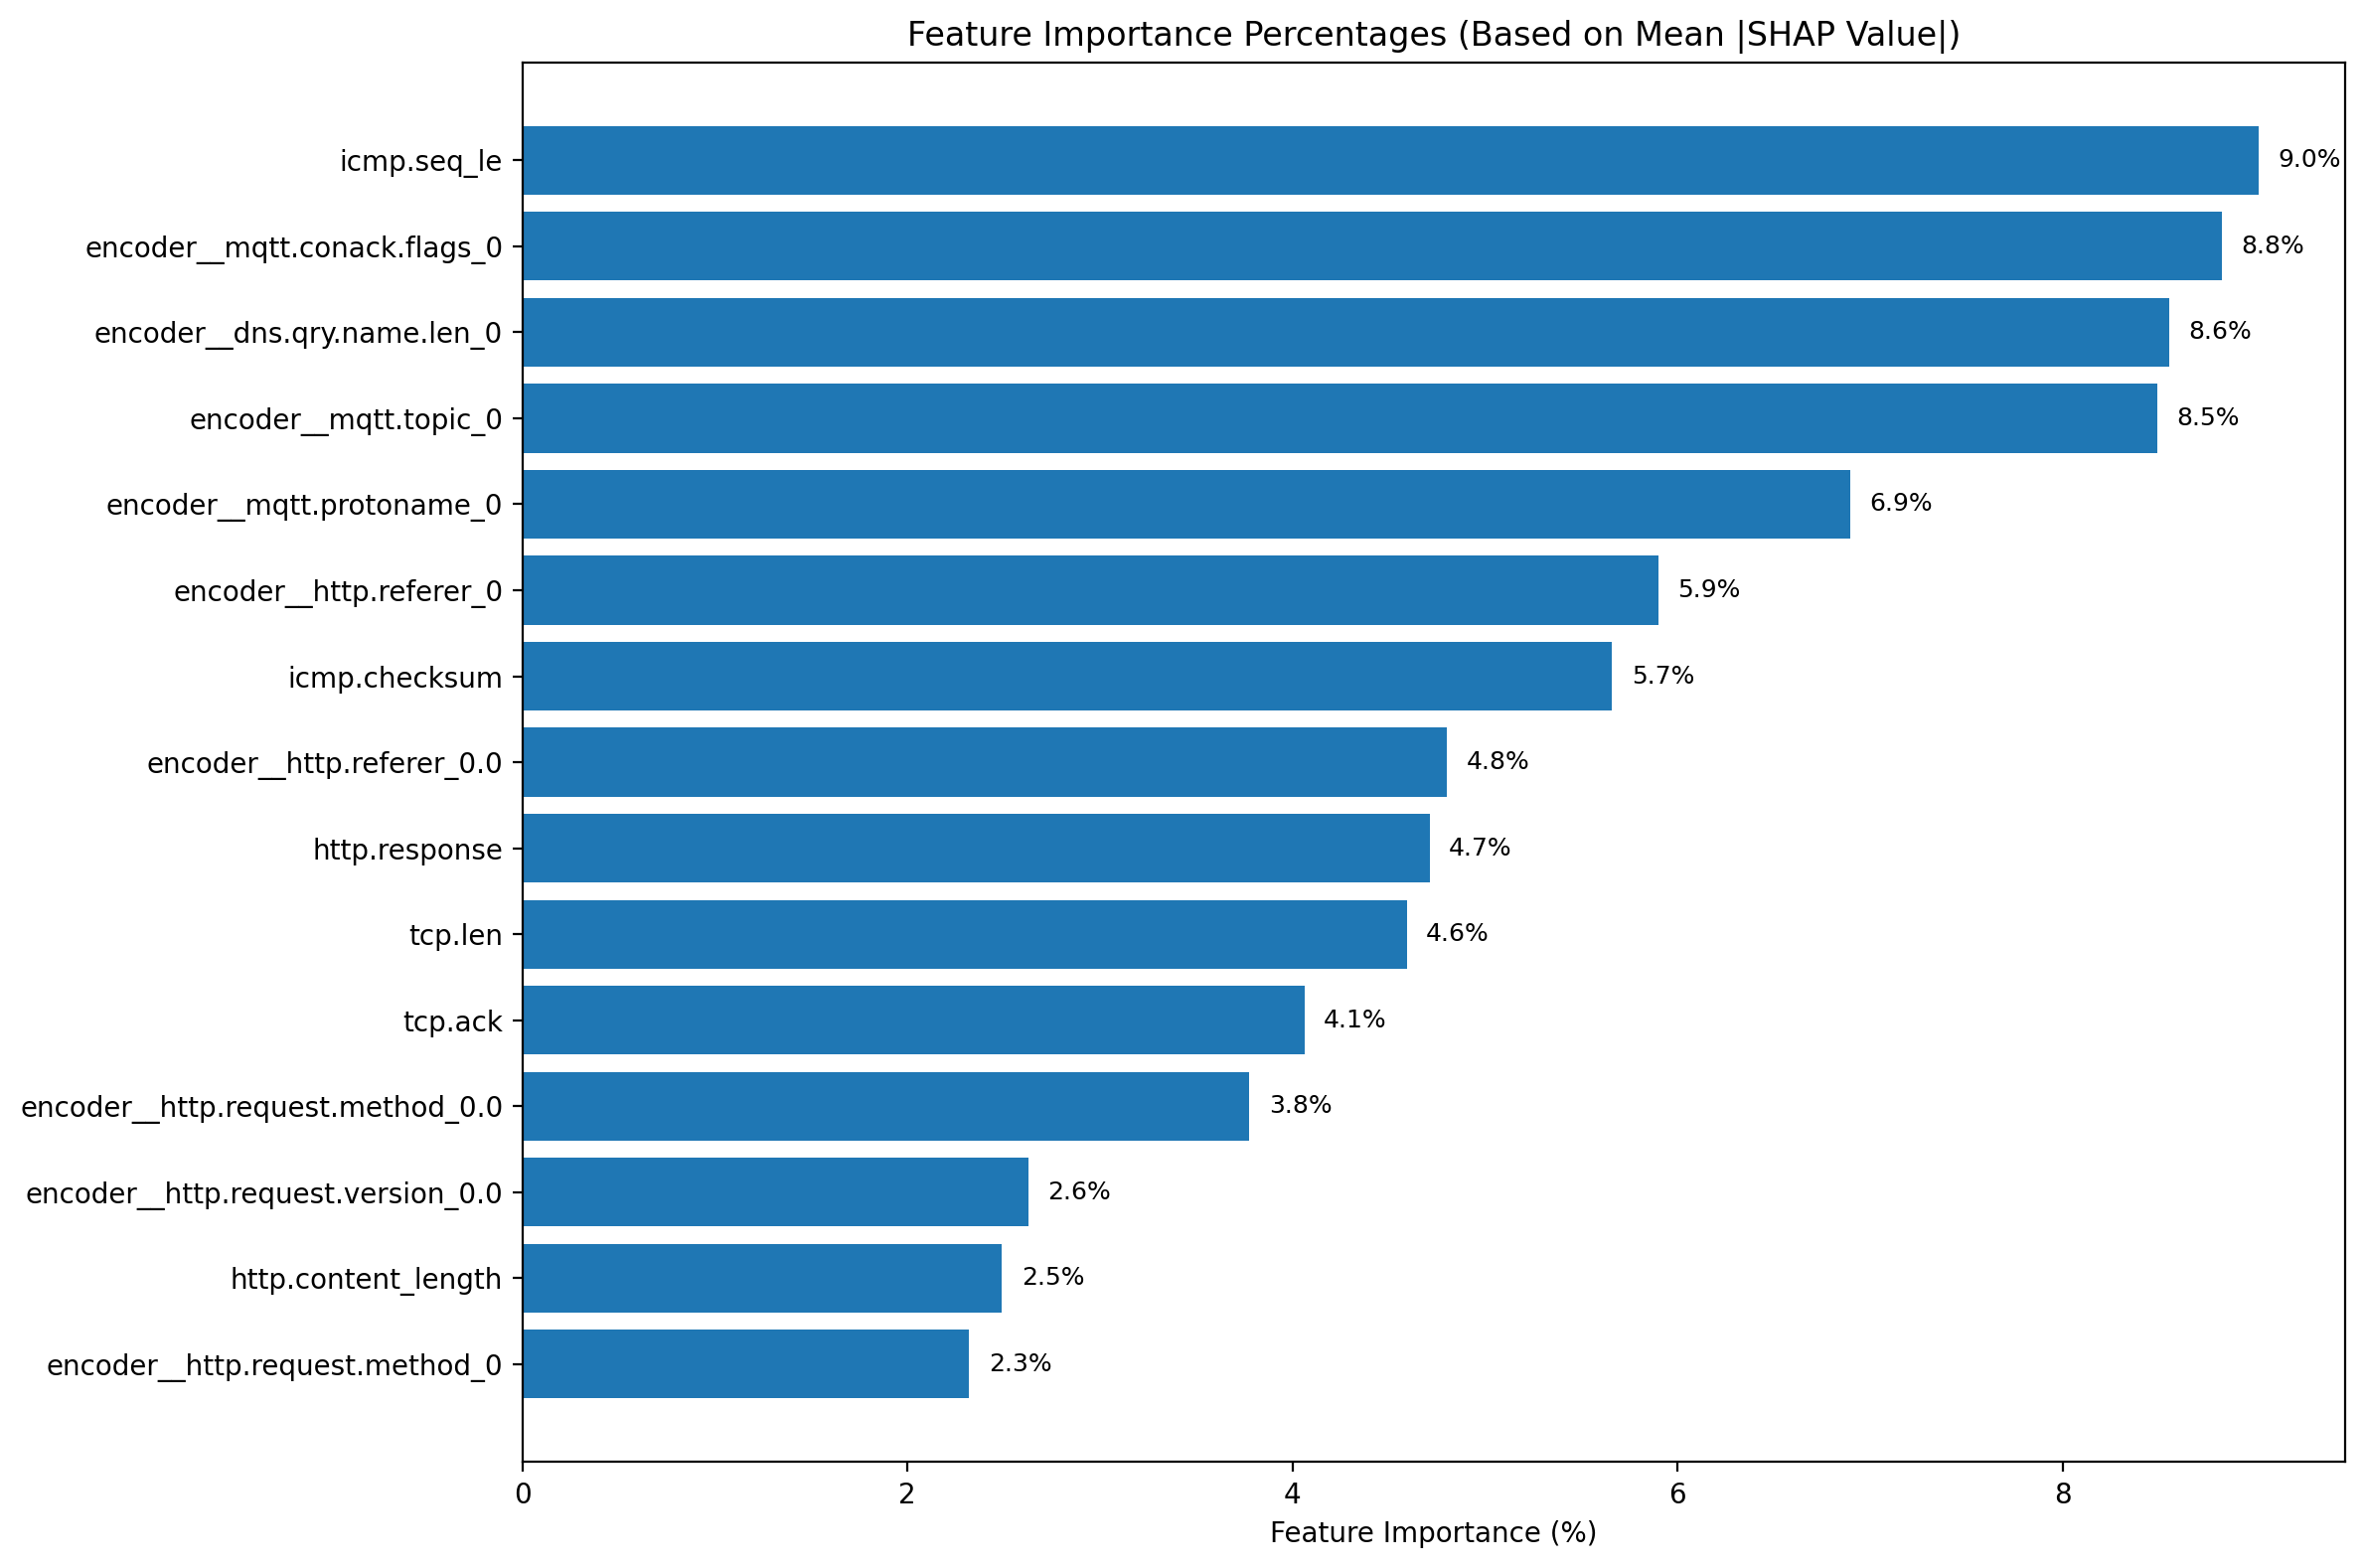

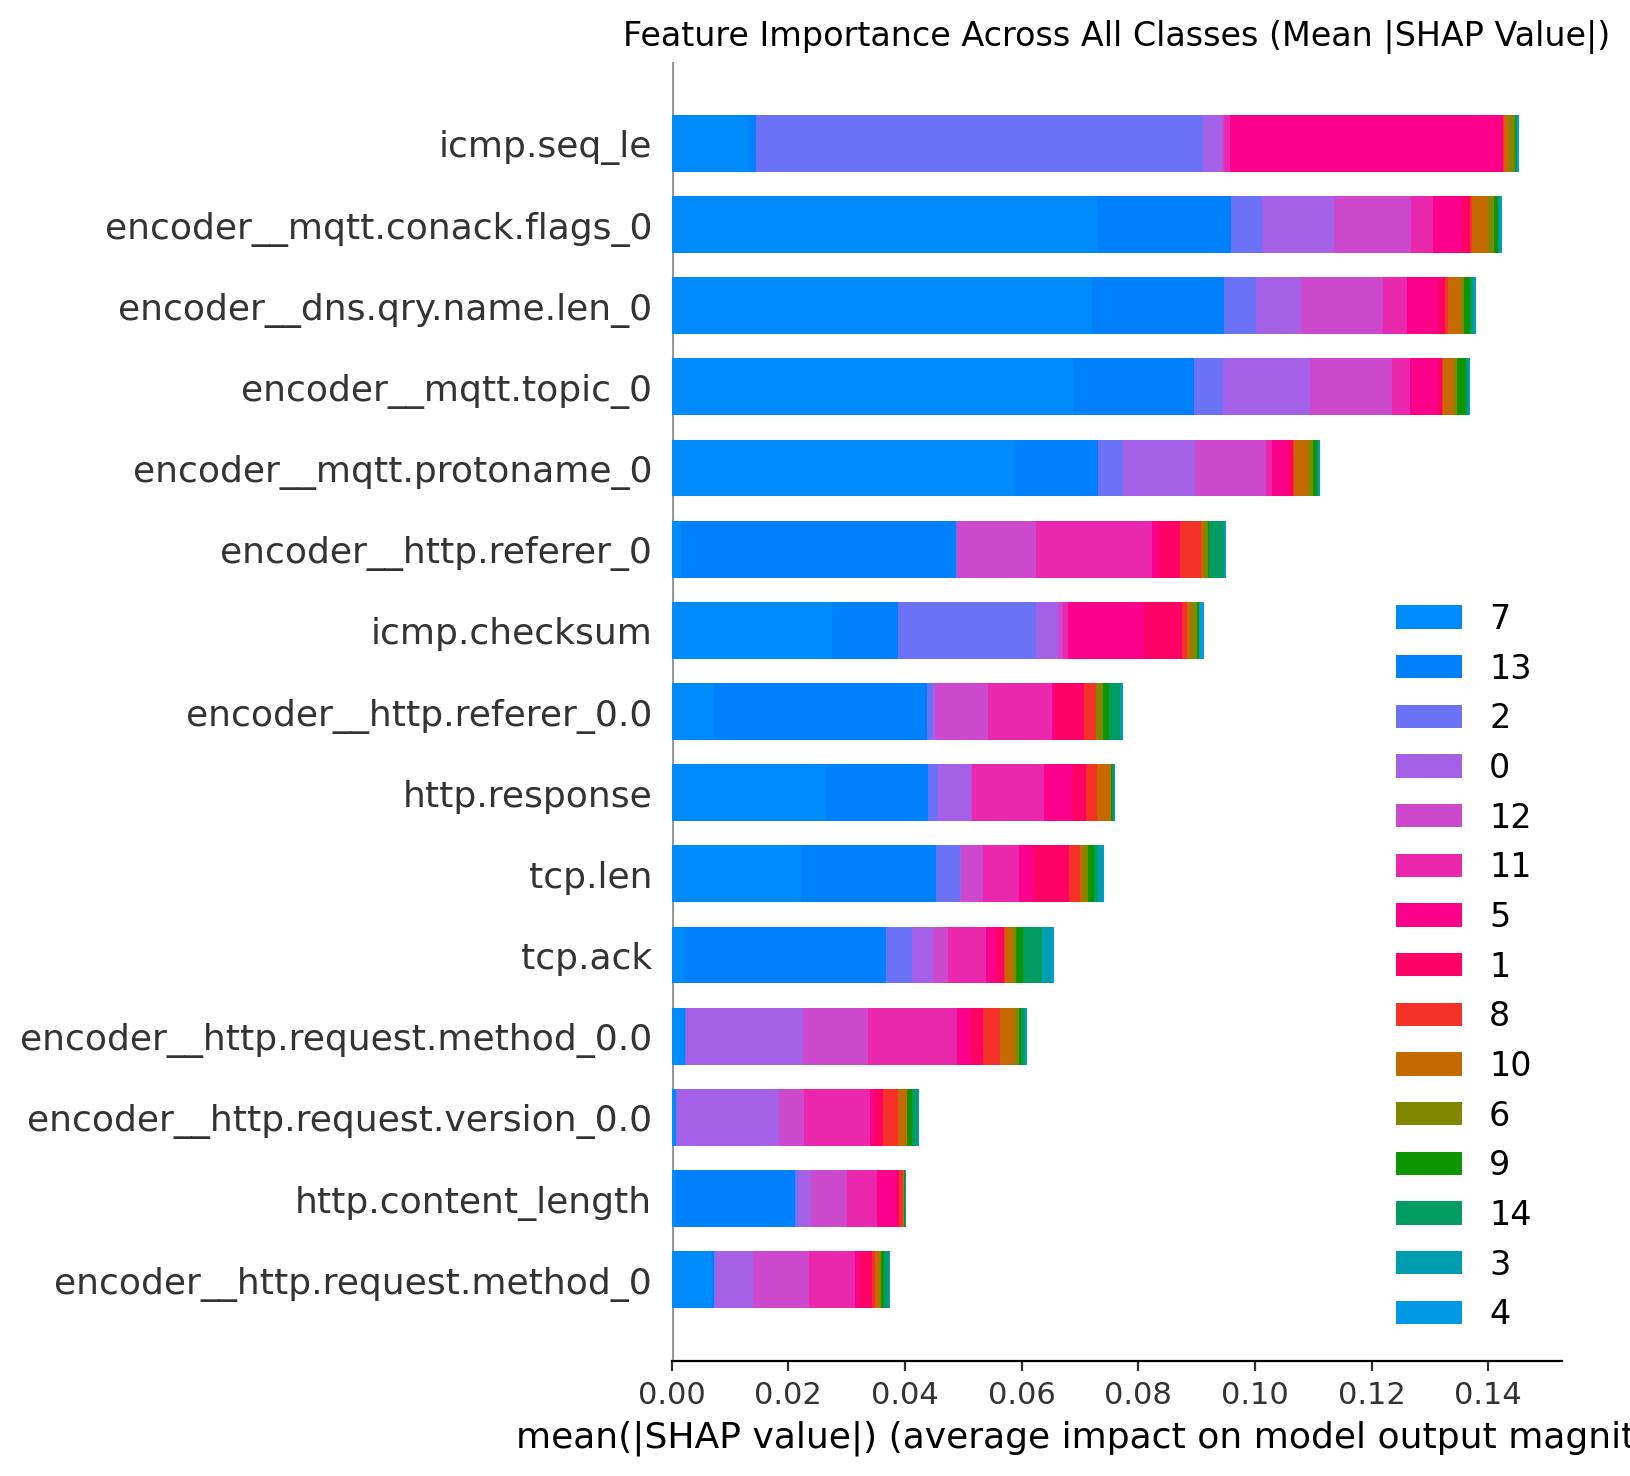


Summary:
Total features: 67
Top 5 features account for: 41.8% of total importance
Top 10 features account for: 67.4% of total importance
Bottom 5 features account for: 0.0% of total importance
Most important feature: icmp.seq_le (9.02%)
Least important feature: encoder__mqtt.conack.flags_- (0.00%)

================================ Client 9 Model Summary ================================

Generating SHAP explanations for the final local models...


100%|██████████| 100/100 [00:27<00:00,  3.66it/s]


SHAP values shape: (100, 67, 15)
X_explainer shape: (100, 67)
Number of classes: 15

2. Calculating feature importance percentages...
Mean absolute SHAP shape after processing: (67,)
Number of features: 67
Number of feature names: 67

Top 10 Features by Importance:
encoder__mqtt.conack.flags_0  : 12.14%
encoder__dns.qry.name.len_0   : 11.95%
encoder__mqtt.topic_0         : 11.54%
encoder__mqtt.protoname_0     : 10.08%
encoder__http.request.method_0.0: 6.38%
encoder__http.request.version_0.0: 4.65%
tcp.len                       : 4.09%
http.response                 : 4.02%
encoder__dns.qry.name.len_0.0 : 3.80%
encoder__http.request.method_0: 3.67%
encoder__mqtt.protoname_0.0   : 2.86%
tcp.ack                       : 2.38%
encoder__mqtt.conack.flags_0.0: 2.28%
tcp.seq                       : 1.95%
encoder__http.referer_0       : 1.94%

5 Least Important Features:
encoder__dns.qry.name.len_0.debian.pool.ntp.org: 0.00%
encoder__dns.qry.name.len_3.debian.pool.ntp.org: 0.00%
encoder__dns.qry

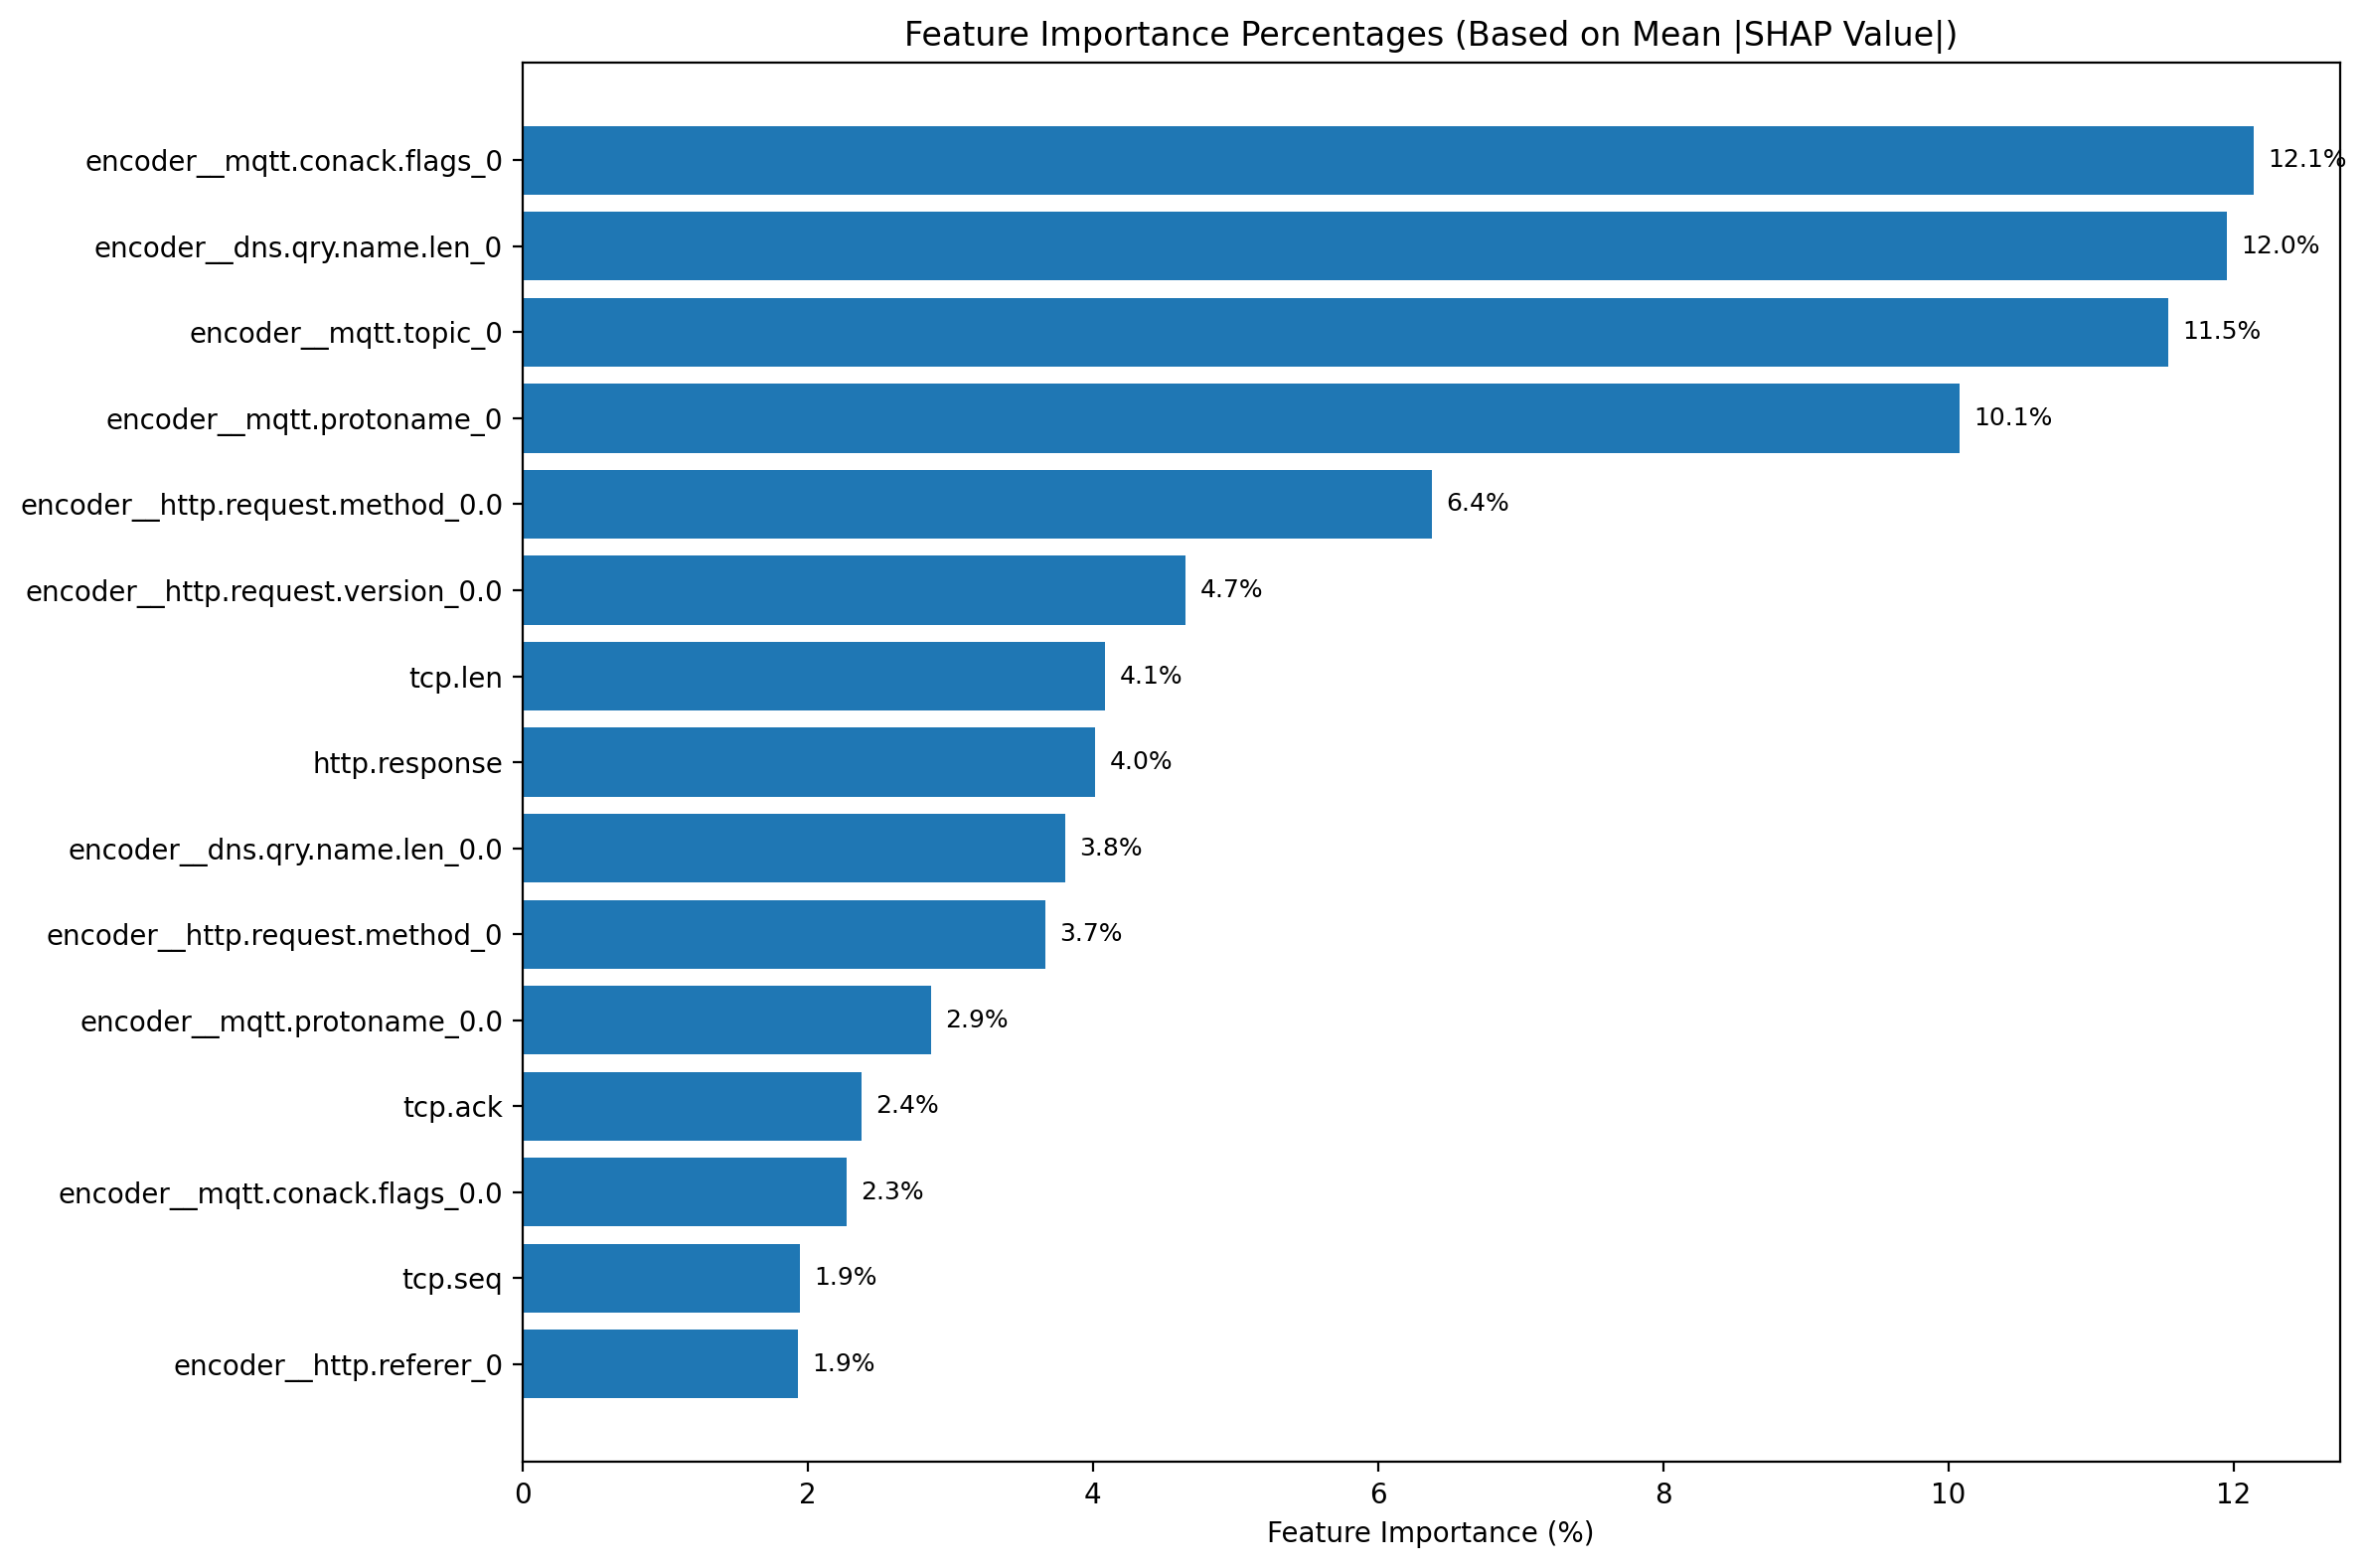

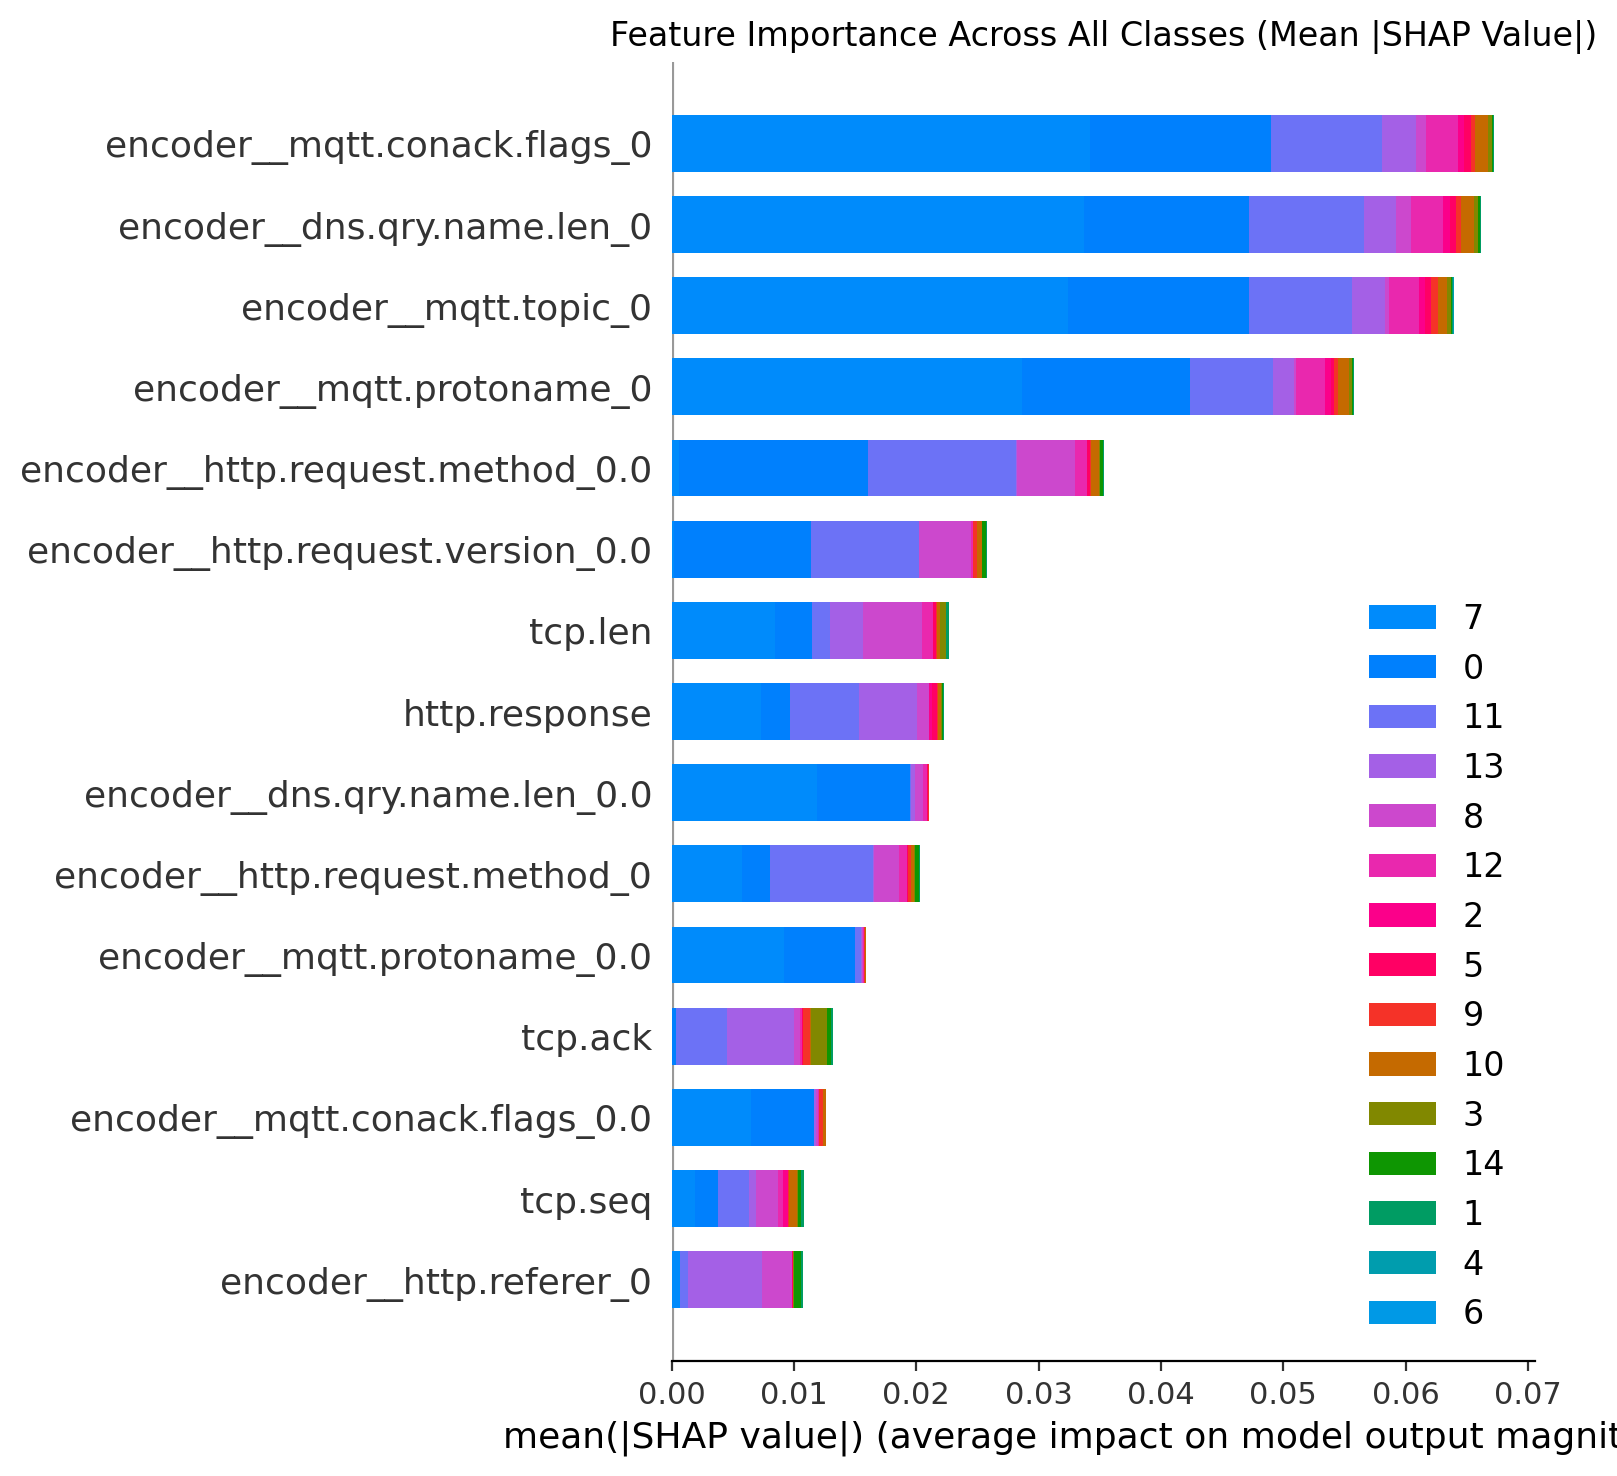


Summary:
Total features: 67
Top 5 features account for: 52.1% of total importance
Top 10 features account for: 72.3% of total importance
Bottom 5 features account for: 0.0% of total importance
Most important feature: encoder__mqtt.conack.flags_0 (12.14%)
Least important feature: encoder__mqtt.conack.flags_- (0.00%)


In [42]:
final = {}

for client_idx in range(10):
    print(f"\n================================ Client {client_idx} Model Summary ================================")

    X_train = client_train_data[client_idx][0]
    y_train = client_train_data[client_idx][1]
    X_test = client_test_data[client_idx][0]
    y_test = client_test_data[client_idx][1]

    model  = models[f'Client {client_idx}']
    print(f"\nGenerating SHAP explanations for the final local models...")

    X_explainer = X_test.values[:100]
    # X_explainer = X_test.values[:50]  # Subset of test data

    # Select a representative background set (e.g., 100 samples)
    background = shap.sample(X_train, 100) if len(X_train) > 100 else X_train

    # Initialize the SHAP KernelExplainer
    explainer = shap.KernelExplainer(model.predict_proba, background)

    # Compute SHAP values for the explanation set
    shap_values = explainer.shap_values(X_explainer)

    print(f"SHAP values shape: {[sv.shape for sv in shap_values] if isinstance(shap_values, list) else shap_values.shape}")
    print(f"X_explainer shape: {X_explainer.shape}")
    print(f"Number of classes: {len(model.classes_)}")

    # # 1. Multi-class summary plot (shows all classes together)
    # print("\n1. Generating multi-class summary plot...")
    # shap.summary_plot(shap_values, X_explainer, feature_names=X_test.columns, 
    #                   class_names=model.classes_)

    # 2. Calculate feature importance percentages
    print("\n2. Calculating feature importance percentages...")

    # Handle SHAP values based on their structure
    if isinstance(shap_values, list):
        # Multi-class case: shap_values is a list of arrays, one per class
        # Each array has shape (n_samples, n_features)
        mean_abs_shap = np.mean([np.abs(sv).mean(axis=0) for sv in shap_values], axis=0)
    elif len(shap_values.shape) == 3:
        # Multi-class case: shap_values has shape (n_samples, n_features, n_classes)
        # Average across samples (axis=0) and classes (axis=2)
        mean_abs_shap = np.abs(shap_values).mean(axis=(0, 2))
    else:
        # Binary classification case: shape (n_samples, n_features)
        mean_abs_shap = np.abs(shap_values).mean(axis=0)

    print(f"Mean absolute SHAP shape after processing: {mean_abs_shap.shape}")

    # Calculate percentages
    total_importance = np.sum(mean_abs_shap)
    feature_importance_pct = (mean_abs_shap / total_importance) * 100

    # Get feature names - use the actual column names from X_test
    feature_names = list(X_test.columns)
    n_features = len(mean_abs_shap)

    print(f"Number of features: {n_features}")
    print(f"Number of feature names: {len(feature_names)}")

    # Ensure feature names match the number of features
    if len(feature_names) != n_features:
        print(f"Error: Feature names length ({len(feature_names)}) doesn't match SHAP values length ({n_features})")
        # Use available feature names or create generic ones
        if len(feature_names) > n_features:
            feature_names = feature_names[:n_features]
        else:
            feature_names.extend([f'feature_{i}' for i in range(len(feature_names), n_features)])

    # Create DataFrame for easier handling
    importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': mean_abs_shap,
        'percentage': feature_importance_pct
    }).sort_values('importance', ascending=False)

    # Display top features with percentages
    print("\nTop 10 Features by Importance:")
    print("=" * 50)
    dict = {}
    for idx, row in importance_df.head(15).iterrows():
        dict[row['feature']]= round(row['percentage'], 2)
        print(f"{row['feature']:<30}: {row['percentage']:.2f}%")
    final[client_idx] = dict
    # Display least important features
    print("\n5 Least Important Features:")
    print("=" * 50)
    for idx, row in importance_df.tail(5).iterrows():
        print(f"{row['feature']:<30}: {row['percentage']:.2f}%")

    # 3. Bar plot with percentages
    print("\n3. Generating feature importance bar plot with percentages...")
    plt.figure(figsize=(12, 8))

    # Get top 15 features for plotting
    top_features = importance_df.head(15)

    # Create horizontal bar plot
    bars = plt.barh(range(len(top_features)), top_features['percentage'])
    plt.yticks(range(len(top_features)), top_features['feature'])
    plt.xlabel('Feature Importance (%)')
    plt.title('Feature Importance Percentages (Based on Mean |SHAP Value|)')

    # Add percentage labels on bars
    for i, (bar, pct) in enumerate(zip(bars, top_features['percentage'])):
        plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2, 
                f'{pct:.1f}%', va='center', fontsize=9)

    plt.gca().invert_yaxis()  # Highest importance at top
    plt.tight_layout()
    # plt.show()

    # 4. Alternative: Use SHAP's built-in bar plot but create custom percentage display
    print("\n4. Generating SHAP bar plot...")
    plt.figure(figsize=(12, 8))
    shap.summary_plot(shap_values, X_explainer, plot_type="bar",
                    feature_names=feature_names, class_names=model.classes_,
                    max_display=15, show=False)
    plt.title("Feature Importance Across All Classes (Mean |SHAP Value|)")

    # Add percentage text to the current plot
    ax = plt.gca()
    bars = ax.patches
    if len(bars) > 0:
        # Get the importance values from the bars
        bar_values = [bar.get_width() for bar in bars]
        total_bar_value = sum(bar_values)
        
    #     # Add percentage labels
    #     for bar in bars:
    #         width = bar.get_width()
    #         percentage = (width / total_bar_value) * 100
    #         ax.text(width + max(bar_values) * 0.01, bar.get_y() + bar.get_height()/2,
    #                 f'{percentage:.1f}%', va='center', fontsize=8)

    plt.tight_layout()
    plt.show()

    # 5. Print summary statistics
    print(f"\nSummary:")
    print(f"Total features: {len(importance_df)}")
    print(f"Top 5 features account for: {importance_df.head(5)['percentage'].sum():.1f}% of total importance")
    print(f"Top 10 features account for: {importance_df.head(10)['percentage'].sum():.1f}% of total importance")
    print(f"Bottom 5 features account for: {importance_df.tail(5)['percentage'].sum():.1f}% of total importance")
    print(f"Most important feature: {importance_df.iloc[0]['feature']} ({importance_df.iloc[0]['percentage']:.2f}%)")
    print(f"Least important feature: {importance_df.iloc[-1]['feature']} ({importance_df.iloc[-1]['percentage']:.2f}%)")

In [43]:
final

# save to json
import json
with open('fl_clients.json', 'w') as f:
    json.dump(final, f, indent=4)

In [ ]:
samples = []
np.random.seed(42)

for client_idx in range(5):
    num = np.random.randint(len(client_test_data[client_idx][0]))
    samples.append(num)

print(f"\nSample indices for each client: {samples}")

for client_idx in range(5):
    print(f"\n================================ Client {client_idx} Model Summary ================================")
    X_train = client_train_data[client_idx][0]
    y_train = client_train_data[client_idx][1]
    X_test = client_test_data[client_idx][0]
    y_test = client_test_data[client_idx][1]

    model = models[f"Client {client_idx}"]

    print(f"\nGenerating LIME explanations for a sample prediction...")

    try:
        lime_explainer = LimeTabularExplainer(
            training_data=X_train.values,
            feature_names=X_train.columns.tolist(),
            class_names=[str(cls) for cls in np.unique(y_test)],
            mode="classification"
        )

        # Sample one instance from this client's test set
        sample_idx = samples[client_idx] 
        sample_instance = X_test.iloc[sample_idx].values
        predicted_class = model.predict([sample_instance])[0]

        explanation = lime_explainer.explain_instance(
            sample_instance,
            model.predict_proba,
            num_features=8,
            top_labels=1
        )
        if (client_idx == 1):  # Show explanation only for the first client
            explanation.show_in_notebook(show_table=True)

        print(f"\nActual label: {y_test.iloc[sample_idx]}")
        print(f"Predicted label: {predicted_class}")
        pred_proba = model.predict_proba([sample_instance])[0]
        print(f"Prediction probability for class {predicted_class}: {pred_proba[predicted_class]:.4f}")

        exp_list = explanation.as_list(label=predicted_class)
        print(f"\nTop {min(10, len(exp_list))} feature contributions:")
        print("-" * 60)
        for i, (feature, importance) in enumerate(exp_list[:10], 1):
            direction = "↑" if importance > 0 else "↓"
            print(f"{i:2d}. {feature}: {importance:+.4f} {direction}")

        print(f"\nFeature Importance Visualization:")
        print("-" * 60)
        max_abs_importance = max(abs(imp) for _, imp in exp_list[:10])
        for feature, importance in exp_list[:10]:
            bar_length = int(abs(importance) / max_abs_importance * 20)
            bar = "█" * bar_length
            print(f"{feature:25s} |{bar:>20s} ({importance:+.3f})")

    except Exception as e:
        print(f"Error generating LIME explanation: {e}")
        print("- Ensure X_train/X_test/y_test are defined")
        print("- Model must support predict_proba")
        print("- Install LIME with: pip install lime")

    # === BONUS: Multiple Sample Explanations ===
    print(f"\n{'='*80}")
    print("BONUS: Quick explanations for multiple samples")
    print(f"{'='*80}")

    for idx in range(5):
        if idx != client_idx:
            try:
                num = samples[idx]
                sample = client_test_data[idx][0].iloc[num].values
                actual_class = client_test_data[idx][1].iloc[num]
                pred_class = model.predict([sample])[0]

                exp = lime_explainer.explain_instance(
                    sample,
                    model.predict_proba,
                    num_features=5,
                    top_labels=1
                )

                top_label = exp.top_labels[0]
                exp_list = exp.as_list(label=top_label)

                print(f"\nSample {num} from Client {idx}: Actual={actual_class}, Predicted={pred_class}")
                print("Top 5 features:")
                for feature, importance in exp_list[:5]:
                    print(f"  • {feature}: {importance:+.3f}")
            except Exception as e:
                print(f"Error explaining sample from Client {idx}: {e}")



Sample indices for each client: [15795, 860, 76820, 6265, 37194]

================================ Client 0 Model Summary ================================

Generating LIME explanations for a sample prediction...

Actual label: 7
Predicted label: 7
Prediction probability for class 7: 1.0000

Top 8 feature contributions:
------------------------------------------------------------
 1. http.response <= -0.13: +0.4140 ↑
 2. icmp.checksum <= -0.19: +0.2818 ↑
 3. icmp.seq_le <= -0.21: +0.1184 ↑
 4. dns.qry.name <= -0.08: +0.1129 ↑
 5. udp.stream <= -0.26: +0.1088 ↑
 6. encoder__dns.qry.name.len_- <= 0.00: -0.0575 ↓
 7. tcp.len > 0.08: -0.0552 ↓
 8. encoder__http.request.version_HTTP/1.1 <= 0.00: +0.0438 ↑

Feature Importance Visualization:
------------------------------------------------------------
http.response <= -0.13    |████████████████████ (+0.414)
icmp.checksum <= -0.19    |       █████████████ (+0.282)
icmp.seq_le <= -0.21      |               █████ (+0.118)
dns.qry.name <= -0.08  


Actual label: 7
Predicted label: 7
Prediction probability for class 7: 1.0000

Top 8 feature contributions:
------------------------------------------------------------
 1. http.response <= -0.13: +0.3897 ↑
 2. encoder__dns.qry.name.len_- <= 0.00: +0.3638 ↑
 3. icmp.checksum <= -0.19: +0.2199 ↑
 4. encoder__http.request.method_POST <= 0.00: -0.1569 ↓
 5. udp.stream <= -0.26: +0.1544 ↑
 6. 0.00 < encoder__dns.qry.name.len_0 <= 1.00: +0.1440 ↑
 7. icmp.seq_le <= -0.21: +0.1288 ↑
 8. dns.qry.qu <= -0.03: -0.1184 ↓

Feature Importance Visualization:
------------------------------------------------------------
http.response <= -0.13    |████████████████████ (+0.390)
encoder__dns.qry.name.len_- <= 0.00 |  ██████████████████ (+0.364)
icmp.checksum <= -0.19    |         ███████████ (+0.220)
encoder__http.request.method_POST <= 0.00 |            ████████ (-0.157)
udp.stream <= -0.26       |             ███████ (+0.154)
0.00 < encoder__dns.qry.name.len_0 <= 1.00 |             ███████ (+0.144)
i